# LIU RF Voltage Check - Increased gridsize for 3 cases (2 intensities)

## 0: PyORBIT = BLonD voltage = 41.8 kV
## 1: PyORBIT = 39.9 kV, BLonD = 41.8 kV
## 2: PyORBIT = 41.8 kV, BLonD = 43.0 kV

In [1]:
import glob
import imageio
import pickle
import pandas as pd
import numpy as np
import PyNAFF as pnf
import scipy.io as sio 
import matplotlib.cm as cm
from math import log10, floor
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from scipy.optimize import curve_fit

In [2]:
plt.rcParams['figure.figsize'] = [8.0, 8.0]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 14

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 'xx-small'

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5

In [3]:
def round_sig(x, sig=3):
        return round(x, sig-int(floor(log10(abs(x))))-1)

def replace_point_with_p(input_str):
        return input_str.replace(".", "p")
    
def is_non_zero_file(fpath):  
        print '\n\t\t\tis_non_zero_file:: Checking file ', fpath
        print '\n\t\t\tis_non_zero_file:: File exists = ', os.path.isfile(fpath)
        print '\n\t\t\tis_non_zero_file:: Size > 3 bytes = ', os.path.getsize(fpath)
        return os.path.isfile(fpath) and os.path.getsize(fpath) > 3

In [4]:
def add_input_file(dd, filename, label):
	f = filename
	p = dict()
	sio.loadmat(f, mdict=p)
	dd[label] = p	
	print '\tAdded output data from ', filename, '\t dictionary key: ', label
	return dd

In [5]:
all_files = []
BL_files = []
PO_files = []

dd1 = dict() # NoSC 1.6E12
dd2 = dict()
dd3 = dict() # NoSC 2E12
dd4 = dict()

for file in glob.glob('Saved_Outputs/*.mat'):
    fname = str(file.split('/')[1])
    #print fname
    all_files.append(str(file.split('/')[1]))
    
    if '2E12' in fname.split('_')[1]:
        if 'NoSC' in fname.split('_')[-1]:
            label = str(fname.split('_')[3] + '_' + fname.split('_')[5])
            dd3 = add_input_file(dd3, file, label)
        elif 'SC' in fname.split('_')[-1]:
            label = str(fname.split('_')[3] + '_' + fname.split('_')[5])            
            dd4 = add_input_file(dd4, file, label)
        
    elif '1p6E12' in fname.split('_')[1]:
        if 'NoSC' in fname.split('_')[-1]: 
            label = str(fname.split('_')[3] + '_' + fname.split('_')[5])
            dd1 = add_input_file(dd1, file, label)
        elif 'SC' in fname.split('_')[-1]:
            label = str(fname.split('_')[3] + '_' + fname.split('_')[5])
            dd2 = add_input_file(dd2, file, label)

sorted(dd1.keys())

	Added output data from  Saved_Outputs/I_1p6E12_PO_41p8_BL_41p8_SC.mat 	 dictionary key:  41p8_41p8
	Added output data from  Saved_Outputs/I_2E12_PO_41p8_BL_41p8_NoSC.mat 	 dictionary key:  41p8_41p8
	Added output data from  Saved_Outputs/I_2E12_PO_39p9_BL_41p8_SC.mat 	 dictionary key:  39p9_41p8
	Added output data from  Saved_Outputs/I_1p6E12_PO_41p8_BL_41p8_NoSC.mat 	 dictionary key:  41p8_41p8
	Added output data from  Saved_Outputs/I_1p6E12_PO_41p8_BL_43p0_NoSC.mat 	 dictionary key:  41p8_43p0
	Added output data from  Saved_Outputs/I_1p6E12_PO_39p9_BL_41p8_SC.mat 	 dictionary key:  39p9_41p8
	Added output data from  Saved_Outputs/I_2E12_PO_41p8_BL_41p8_SC.mat 	 dictionary key:  41p8_41p8
	Added output data from  Saved_Outputs/I_2E12_PO_41p8_BL_43p0_NoSC.mat 	 dictionary key:  41p8_43p0
	Added output data from  Saved_Outputs/I_1p6E12_PO_39p9_BL_41p8_NoSC.mat 	 dictionary key:  39p9_41p8
	Added output data from  Saved_Outputs/I_2E12_PO_39p9_BL_41p8_NoSC.mat 	 dictionary key:  39p9_41p

['39p9_41p8', '41p8_41p8', '41p8_43p0']

In [6]:
old_method = False
if old_method:
    dd1 = dict() # No SC Case 1
    dd2 = dict() # SC Case 1
    dd3 = dict() # No SC Case 2
    dd4 = dict() # SC Case 2

    ## 00_ NoSC change voltage in PyORBIT
    ## 01_ NoSC change voltage in BLonD
    ## 10_ SC change voltage in PyORBIT
    ## 11_ SC change voltage in BLonD

    dd1 = add_input_file(dd1, '00_00/output/output.mat', '40.4')
    dd1 = add_input_file(dd1, '00_01/output/output.mat', '40.5')
    dd1 = add_input_file(dd1, '00_02/output/output.mat', '40.6')
    dd1 = add_input_file(dd1, '00_03/output/output.mat', '40.7')
    dd1 = add_input_file(dd1, '00_04/output/output.mat', '40.8')
    dd1 = add_input_file(dd1, '00_05/output/output.mat', '40.9')
    dd1 = add_input_file(dd1, '00_06/output/output.mat', '41.0')
    dd1 = add_input_file(dd1, '00_07/output/output.mat', '41.1')
    dd1 = add_input_file(dd1, '00_08/output/output.mat', '41.2')
    dd1 = add_input_file(dd1, '00_09/output/output.mat', '41.3')
    dd1 = add_input_file(dd1, '00_10/output/output.mat', '41.4')
    dd1 = add_input_file(dd1, '00_11/output/output.mat', '41.5')
    dd1 = add_input_file(dd1, '00_12/output/output.mat', '41.6')
    dd1 = add_input_file(dd1, '00_13/output/output.mat', '41.7')
    dd1 = add_input_file(dd1, '00_14/output/output.mat', '41.8')
    dd1 = add_input_file(dd1, '00_15/output/output.mat', '41.9')
    dd1 = add_input_file(dd1, '00_16/output/output.mat', '42.0')
    dd1 = add_input_file(dd1, '00_17/output/output.mat', '42.1')
    dd1 = add_input_file(dd1, '00_18/output/output.mat', '42.2')
    dd1 = add_input_file(dd1, '00_19/output/output.mat', '42.3')
    dd1 = add_input_file(dd1, '00_20/output/output.mat', '42.4')
    dd1 = add_input_file(dd1, '00_21/output/output.mat', '42.5')
    dd1 = add_input_file(dd1, '00_22/output/output.mat', '42.6')
    dd1 = add_input_file(dd1, '00_23/output/output.mat', '42.7')
    dd1 = add_input_file(dd1, '00_24/output/output.mat', '42.8')
    dd1 = add_input_file(dd1, '00_25/output/output.mat', '42.9')
    dd1 = add_input_file(dd1, '00_26/output/output.mat', '43.0')
    dd1 = add_input_file(dd1, '00_27/output/output.mat', '43.1')
    dd1 = add_input_file(dd1, '00_28/output/output.mat', '43.2')
    dd1 = add_input_file(dd1, '00_29/output/output.mat', '43.3')
    #dd1 = add_input_file(dd1, '00_30/output/output.mat', '43.3')

    dd3 = add_input_file(dd3, '01_00/output/output.mat', '40.4')
    dd3 = add_input_file(dd3, '01_01/output/output.mat', '40.5')
    dd3 = add_input_file(dd3, '01_02/output/output.mat', '40.6')
    dd3 = add_input_file(dd3, '01_03/output/output.mat', '40.7')
    dd3 = add_input_file(dd3, '01_04/output/output.mat', '40.8')
    dd3 = add_input_file(dd3, '01_05/output/output.mat', '40.9')
    dd3 = add_input_file(dd3, '01_06/output/output.mat', '41.0')
    dd3 = add_input_file(dd3, '01_07/output/output.mat', '41.1')
    dd3 = add_input_file(dd3, '01_08/output/output.mat', '41.2')
    dd3 = add_input_file(dd3, '01_09/output/output.mat', '41.3')
    dd3 = add_input_file(dd3, '01_10/output/output.mat', '41.4')
    dd3 = add_input_file(dd3, '01_11/output/output.mat', '41.5')
    dd3 = add_input_file(dd3, '01_12/output/output.mat', '41.6')
    dd3 = add_input_file(dd3, '01_13/output/output.mat', '41.7')
    dd3 = add_input_file(dd3, '01_14/output/output.mat', '41.8')
    dd3 = add_input_file(dd3, '01_15/output/output.mat', '41.9')
    dd3 = add_input_file(dd3, '01_16/output/output.mat', '42.0')
    dd3 = add_input_file(dd3, '01_17/output/output.mat', '42.1')
    dd3 = add_input_file(dd3, '01_18/output/output.mat', '42.2')
    dd3 = add_input_file(dd3, '01_19/output/output.mat', '42.3')
    dd3 = add_input_file(dd3, '01_20/output/output.mat', '42.4')
    dd3 = add_input_file(dd3, '01_21/output/output.mat', '42.5')
    dd3 = add_input_file(dd3, '01_22/output/output.mat', '42.6')
    dd3 = add_input_file(dd3, '01_23/output/output.mat', '42.7')
    dd3 = add_input_file(dd3, '01_24/output/output.mat', '42.8')
    dd3 = add_input_file(dd3, '01_25/output/output.mat', '42.9')
    dd3 = add_input_file(dd3, '01_26/output/output.mat', '43.0')
    dd3 = add_input_file(dd3, '01_27/output/output.mat', '43.1')
    dd3 = add_input_file(dd3, '01_28/output/output.mat', '43.2')
    dd3 = add_input_file(dd3, '01_29/output/output.mat', '43.3')
    #dd3 = add_input_file(dd3, '01_30/output/output.mat', '43.3')

    dd2 = add_input_file(dd2, '../04_Ramp_Up_SC/2023/output/output.mat', '41.8')
    dd4 = add_input_file(dd4, '../04_Ramp_Up_SC/2023/output/output.mat', '41.8')

In [7]:
dd1['41p8_41p8'].keys()

['eps_z',
 'D_x',
 'D_y',
 'kurtosis_yp_6sig',
 'kurtosis_yp',
 'mu_yp',
 'kurtosis_z_6sig',
 'eff_beta_y',
 'eff_beta_x',
 'eff_alpha_y',
 'kurtosis_y_6sig',
 'epsn_y',
 'epsn_x',
 'beta_y',
 'beta_x',
 'dpp_rms',
 'sig_yp',
 'min_dE',
 'turn_time',
 'n_mp',
 'min_xp',
 'kurtosis_y',
 'kurtosis_xp_6sig',
 'alpha_x',
 'alpha_y',
 'bunchlength',
 '__header__',
 'sig_xp',
 'kurtosis_dE_6sig',
 'max_xp',
 'intensity',
 'min_yp',
 'sig_dE',
 'min_x',
 'min_y',
 'mu_y',
 'mu_x',
 'cumulative_time',
 'mean_yp',
 'kurtosis_xp',
 'eff_epsn_y',
 'eff_epsn_x',
 'mean_x',
 'mean_y',
 'mean_z',
 'kurtosis_x_6sig',
 '__version__',
 'max_z',
 'mu_dE',
 'max_x',
 'max_y',
 'mean_dE',
 'sig_z',
 'sig_y',
 'sig_x',
 'max_yp',
 'kurtosis_z',
 'eff_alpha_x',
 'kurtosis_x',
 'mu_xp',
 'turn_duration',
 'mu_z',
 'mean_xp',
 'min_z',
 'kurtosis_dE',
 '__globals__',
 'turn',
 'max_dE',
 'gamma']

In [8]:
sc = 'SbS'
legend_label = r'V$_{RF} (PyORBIT, BLonD)$'    
main_label = 'RF_Test'
main_label2 = main_label + '_zoom'
scaled_label = main_label + '_scaled'
turn_tot = 2200
zoom_turns = 30
turns = [0, 1, 10, 50, 100, 874, 2185, 2199]
#betagamma = 2.492104532 * 0.9159915293879255
save_folder = 'Plots'
case_label_1 = r'I = $1.6 \cdot 10^{12}$'
case_label_2 = r'I = $2.0 \cdot 10^{12}$'
title_1 = 'No Space Charge'
title_2 = 'Space Charge'

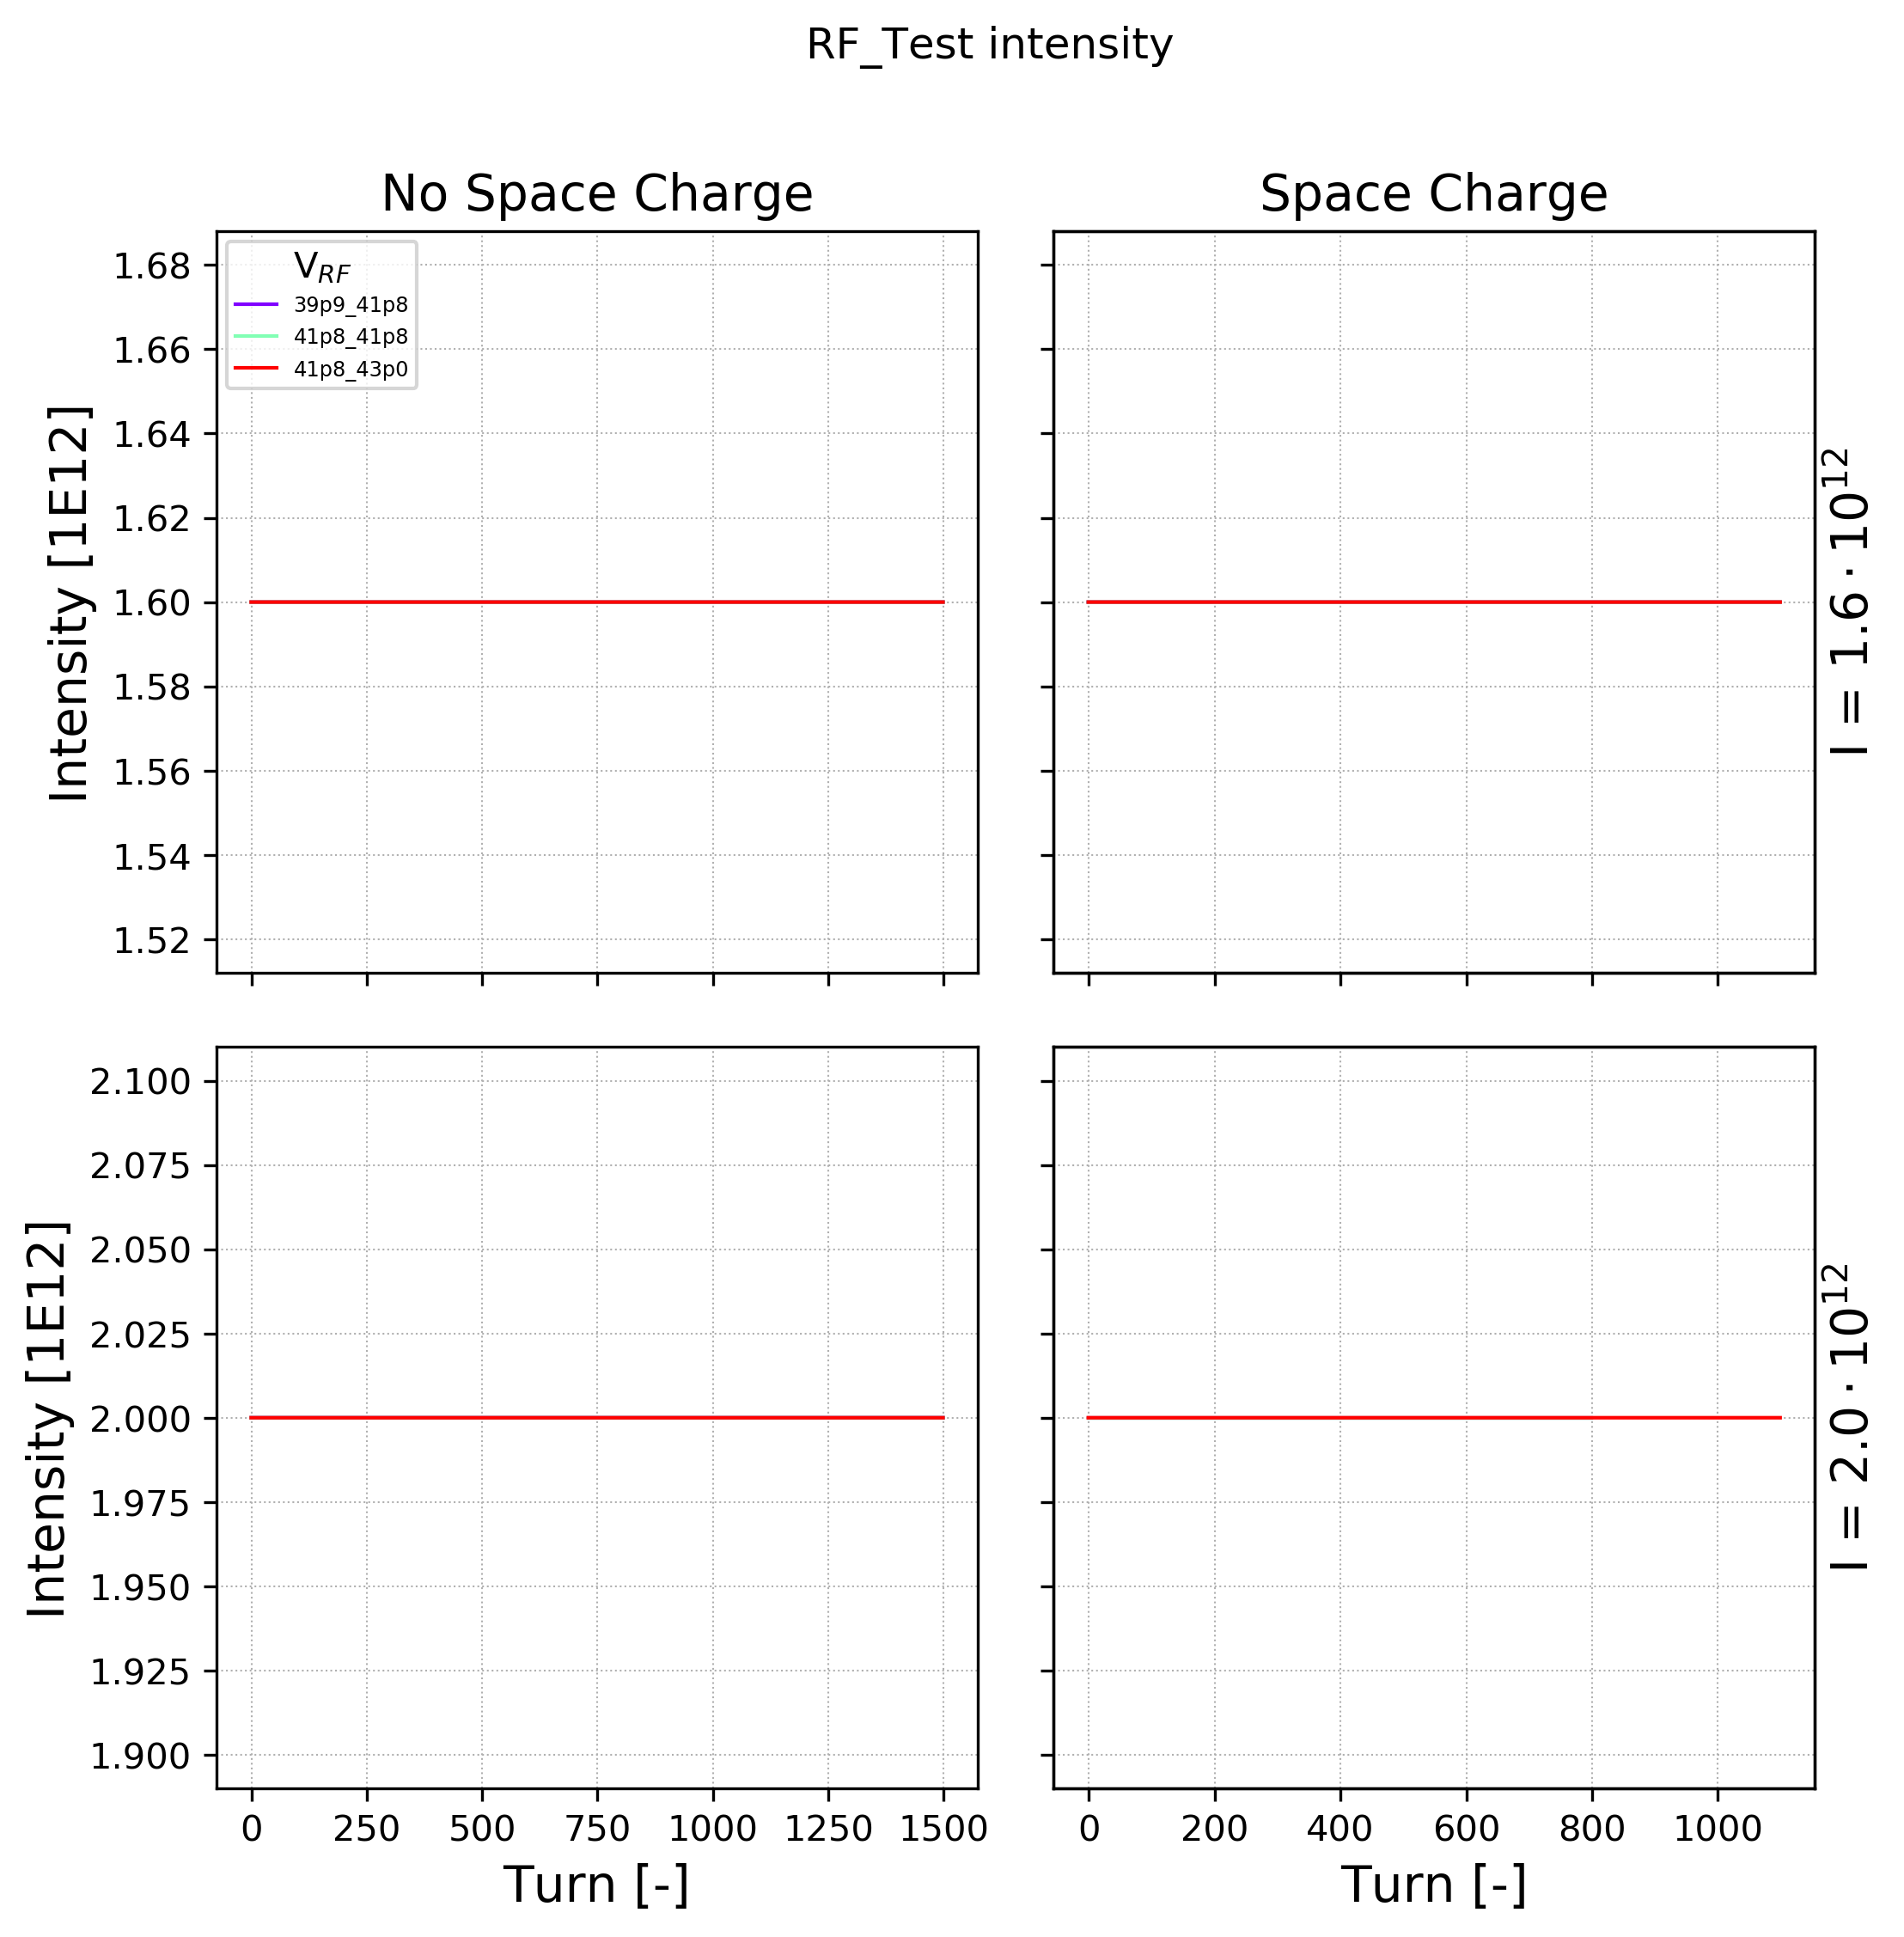

In [28]:
parameter = 'intensity'
multi1 = 1E-12

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel('Intensity [1E12]');
ax3.set_ylabel('Intensity [1E12]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label);
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
#ax2.legend(loc=2, title=legend_label);
ax2.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');


#ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);    
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

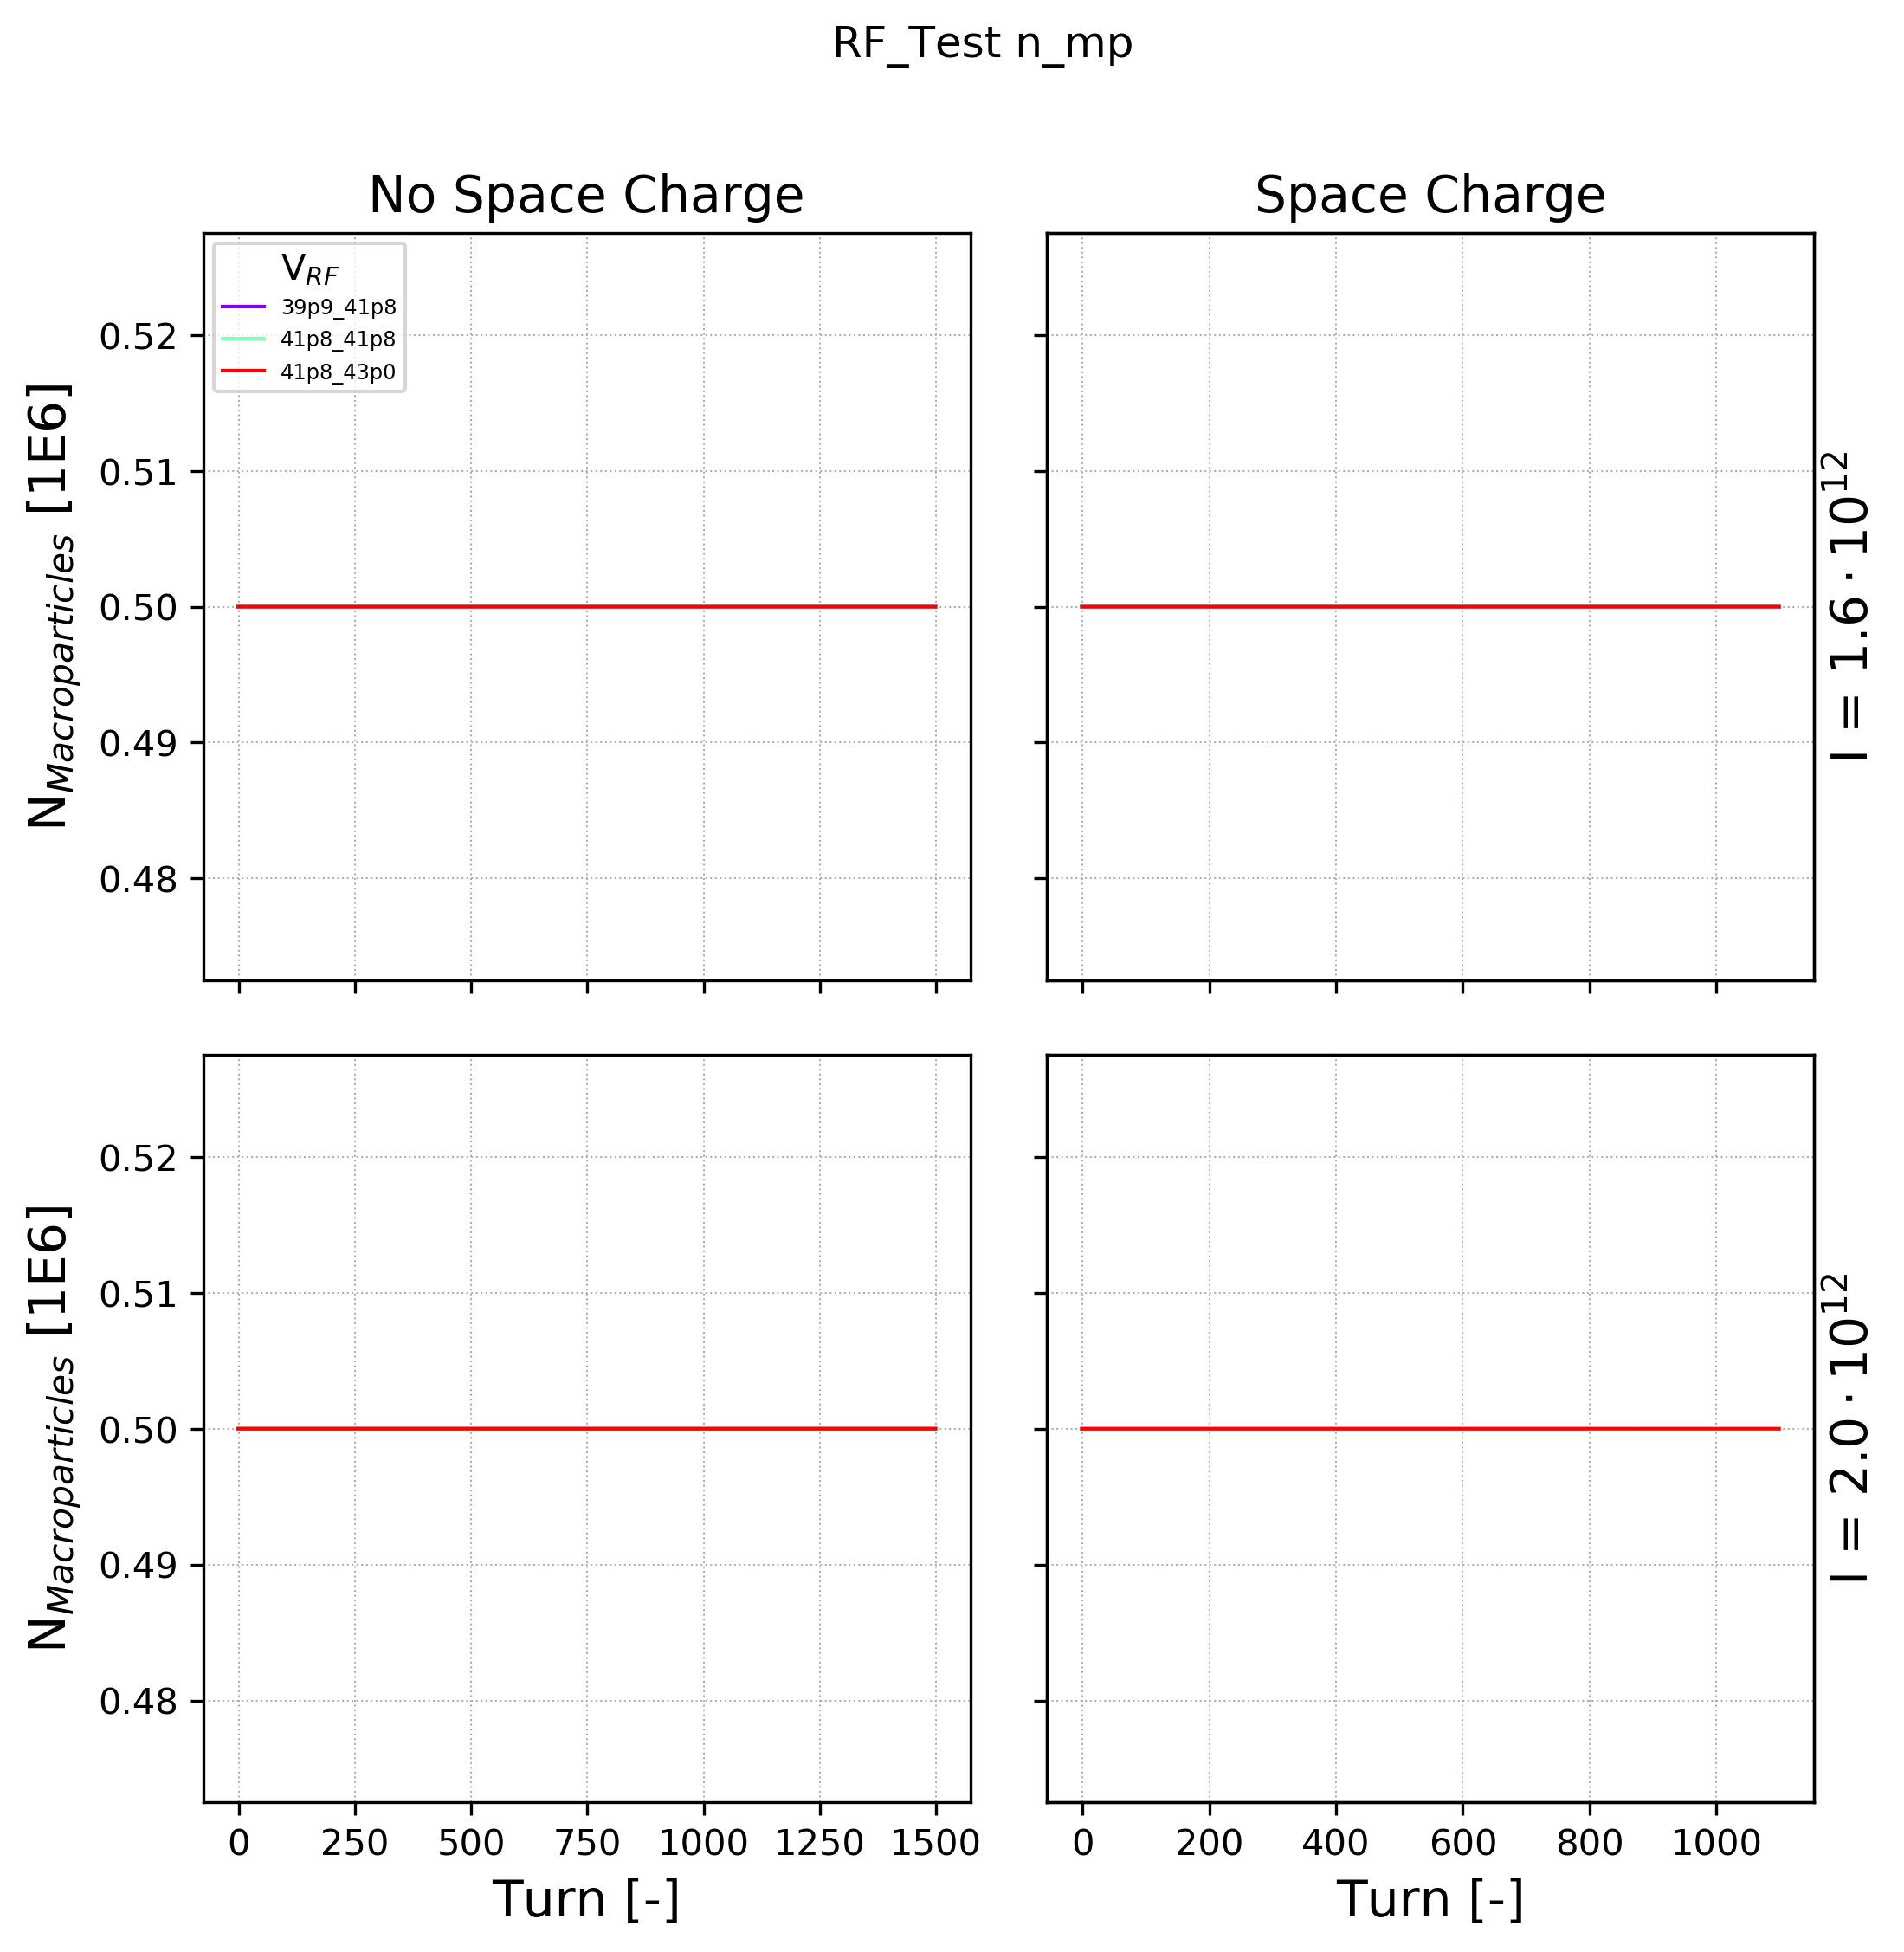

In [10]:
parameter = 'n_mp'
multi1 = 1E-6

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'N$_{Macroparticles}$ [1E6]');
ax3.set_ylabel(r'N$_{Macroparticles}$ [1E6]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label);
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
#ax2.legend(loc=2, title=legend_label);
ax2.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

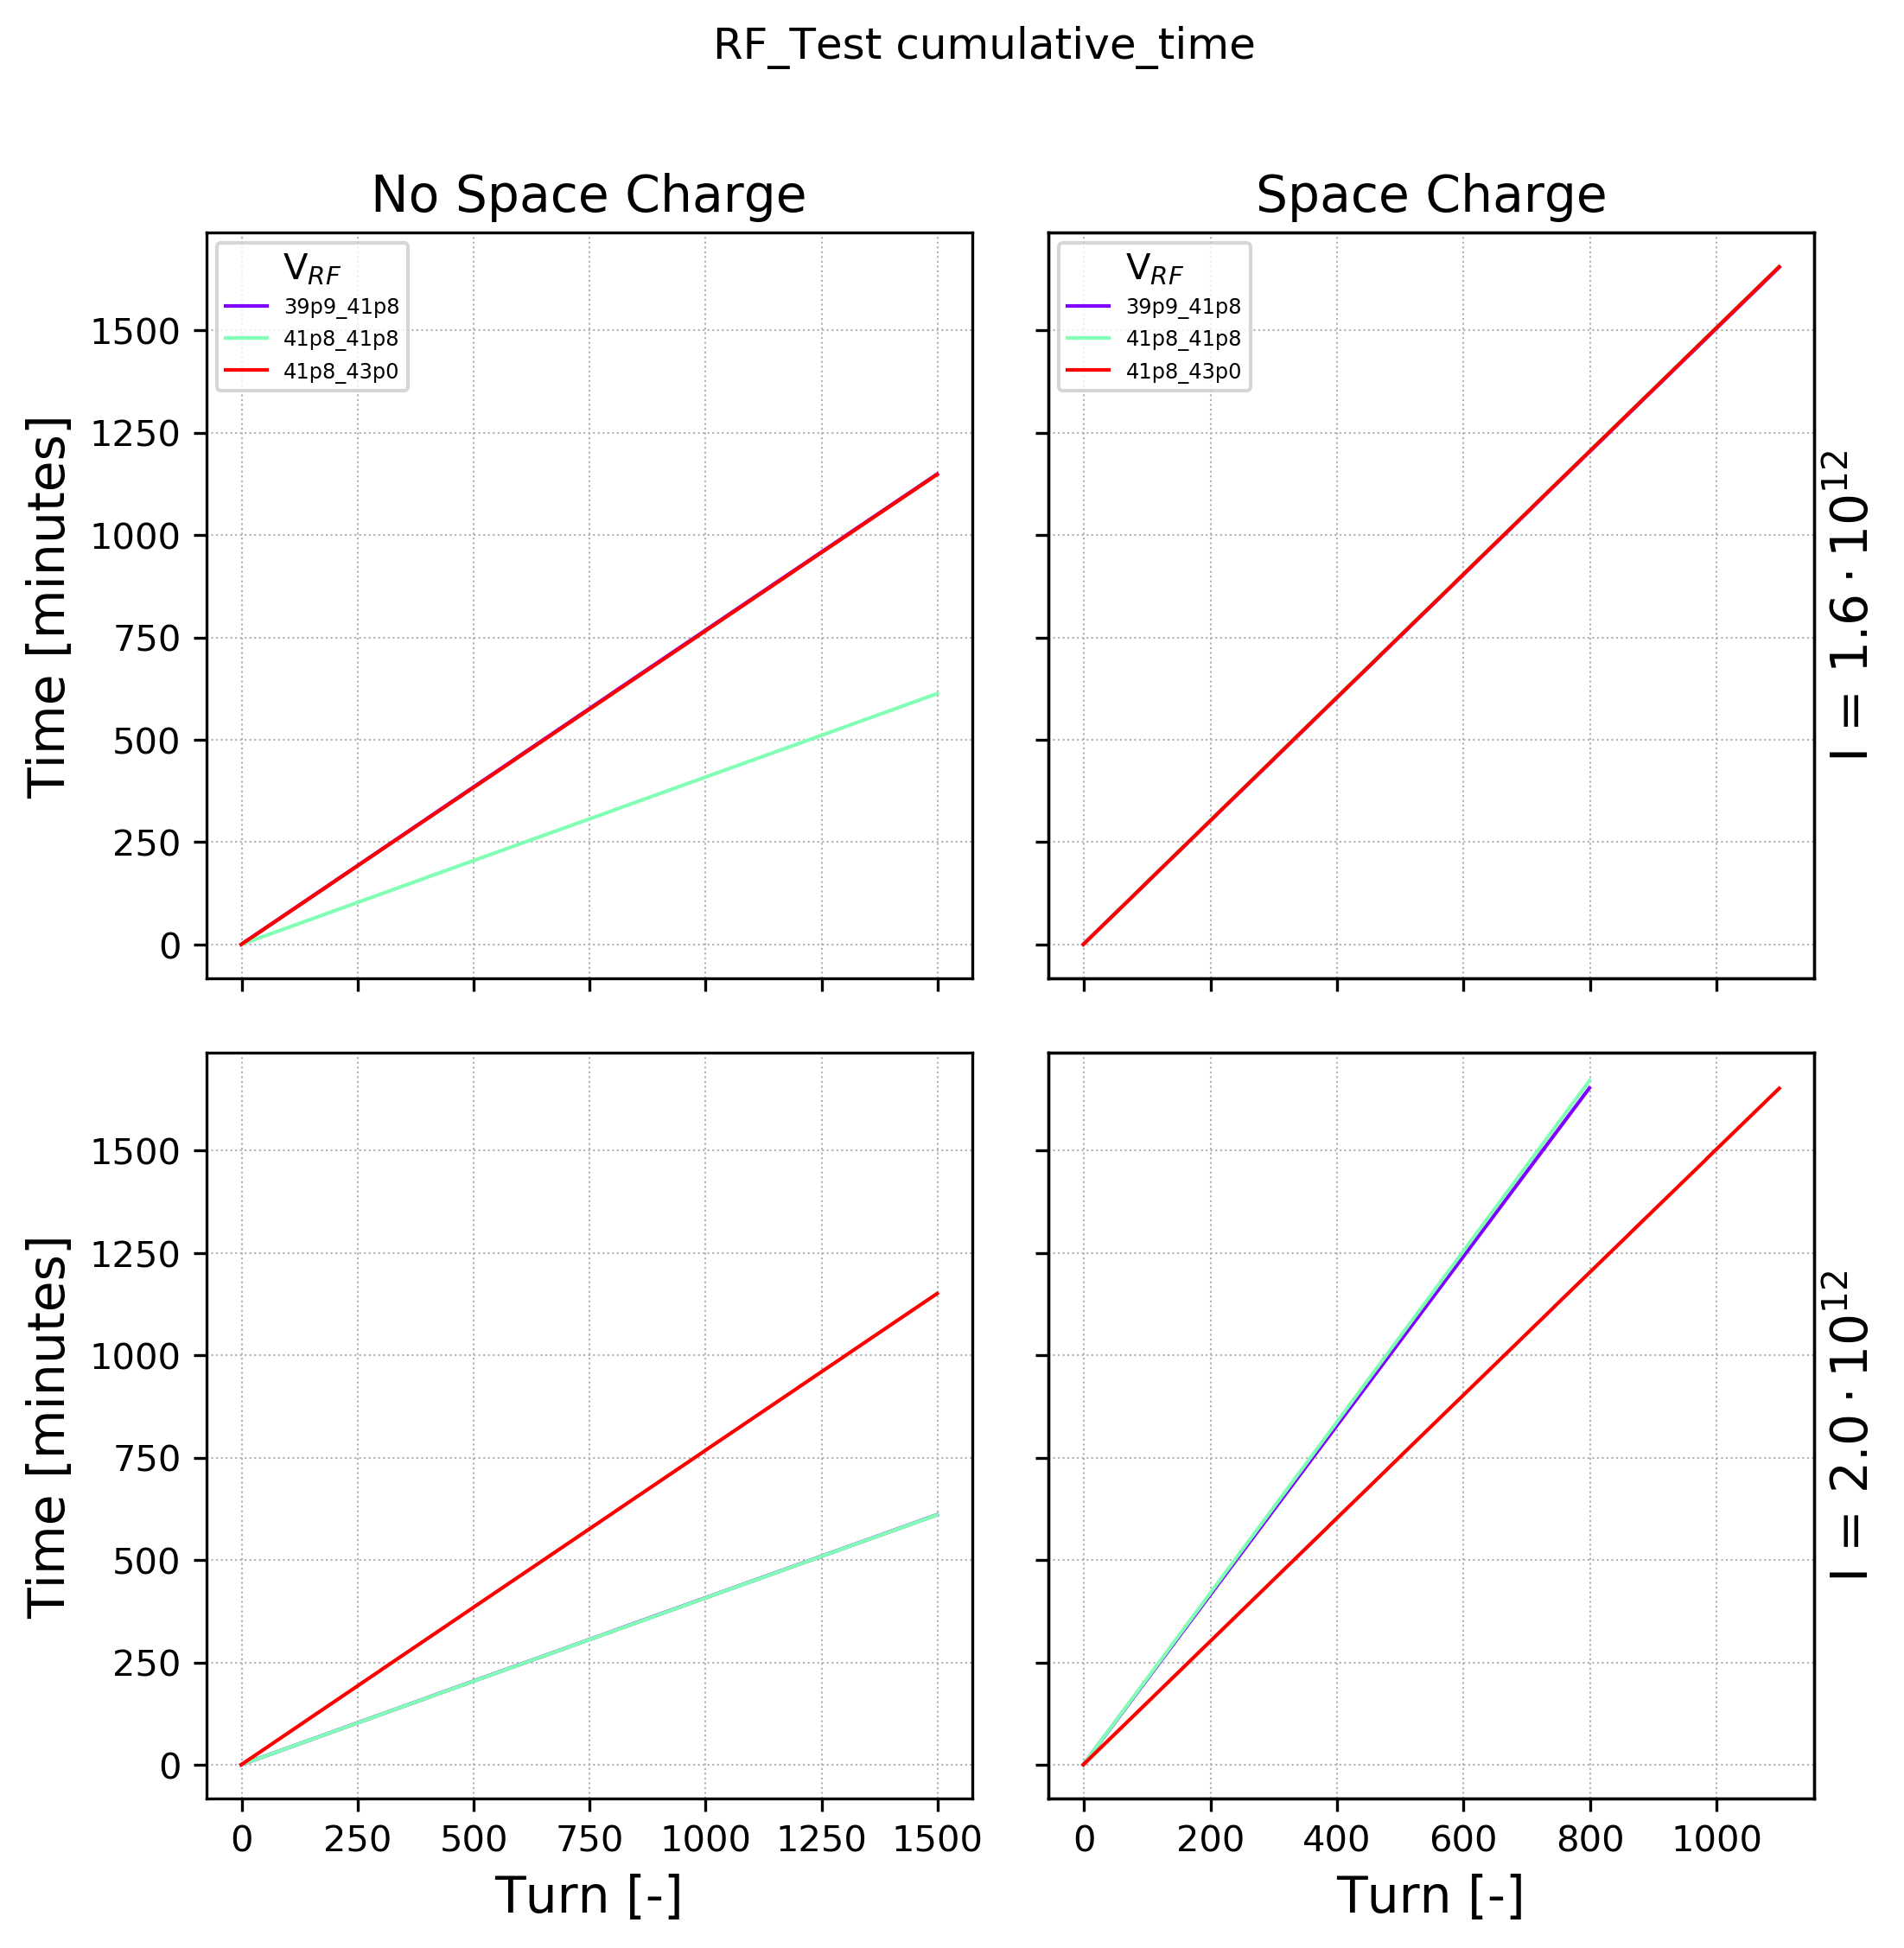

In [11]:
parameter = 'cumulative_time'
multi1 = 1./60.

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel('Time [minutes]');
ax3.set_ylabel('Time [minutes]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label);
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label);
ax2.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

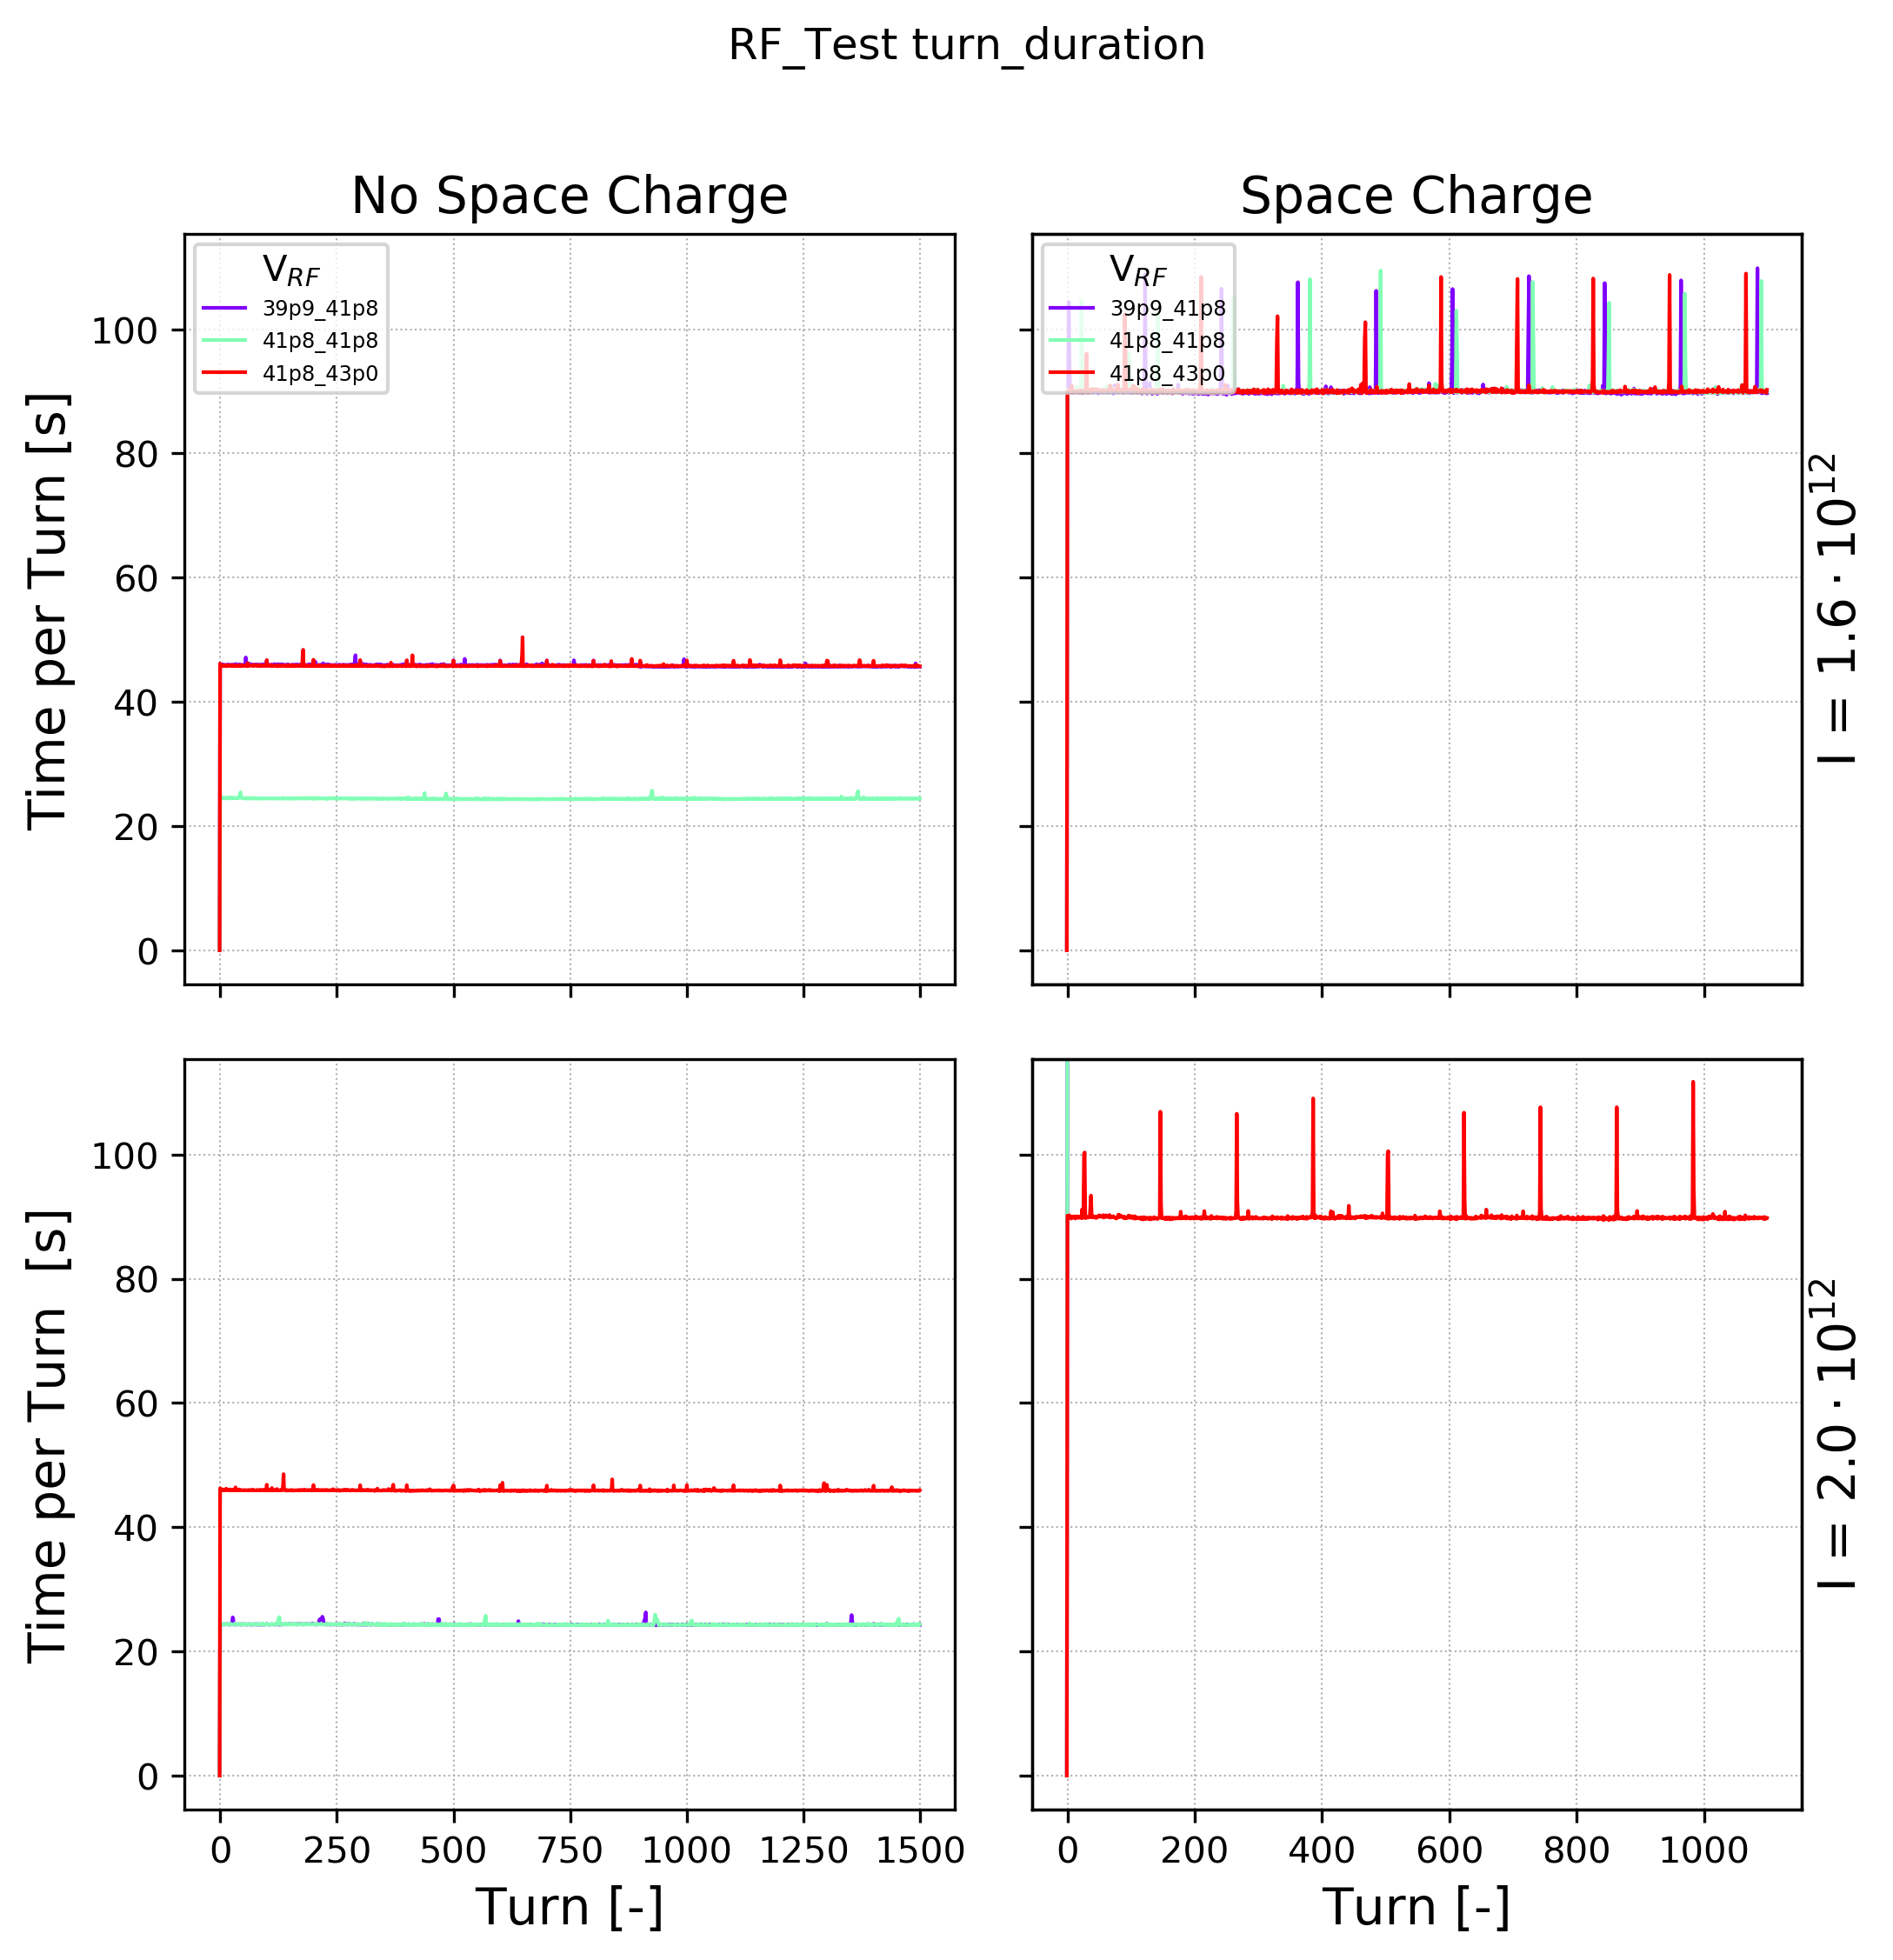

In [12]:
parameter = 'turn_duration'
multi1 = 1

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel('Time per Turn [s]');
ax3.set_ylabel('Time per Turn  [s]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label);
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label);
ax2.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

Space Charge   I = $1.6 \cdot 10^{12}$   39p9_41p8 Average  sig_x  =  6.5  range =  0.134  =  2.05 %
Space Charge   I = $1.6 \cdot 10^{12}$   41p8_41p8 Average  sig_x  =  6.59  range =  0.253  =  3.84 %
Space Charge   I = $1.6 \cdot 10^{12}$   41p8_43p0 Average  sig_x  =  6.6  range =  0.202  =  3.06 %
No Space Charge   I = $1.6 \cdot 10^{12}$   39p9_41p8 Average  sig_x  =  6.41  range =  0.121  =  1.88 %
No Space Charge   I = $1.6 \cdot 10^{12}$   41p8_41p8 Average  sig_x  =  6.48  range =  0.195  =  3.0 %
No Space Charge   I = $1.6 \cdot 10^{12}$   41p8_43p0 Average  sig_x  =  6.5  range =  0.149  =  2.3 %
Space Charge   I = $2.0 \cdot 10^{12}$   39p9_41p8 Average  sig_x  =  6.51  range =  0.143  =  2.2 %
Space Charge   I = $2.0 \cdot 10^{12}$   41p8_41p8 Average  sig_x  =  6.58  range =  0.251  =  3.81 %
Space Charge   I = $2.0 \cdot 10^{12}$   41p8_43p0 Average  sig_x  =  6.6  range =  0.204  =  3.1 %
No Space Charge   I = $2.0 \cdot 10^{12}$   39p9_41p8 Average  sig_x  =  6.52  ra

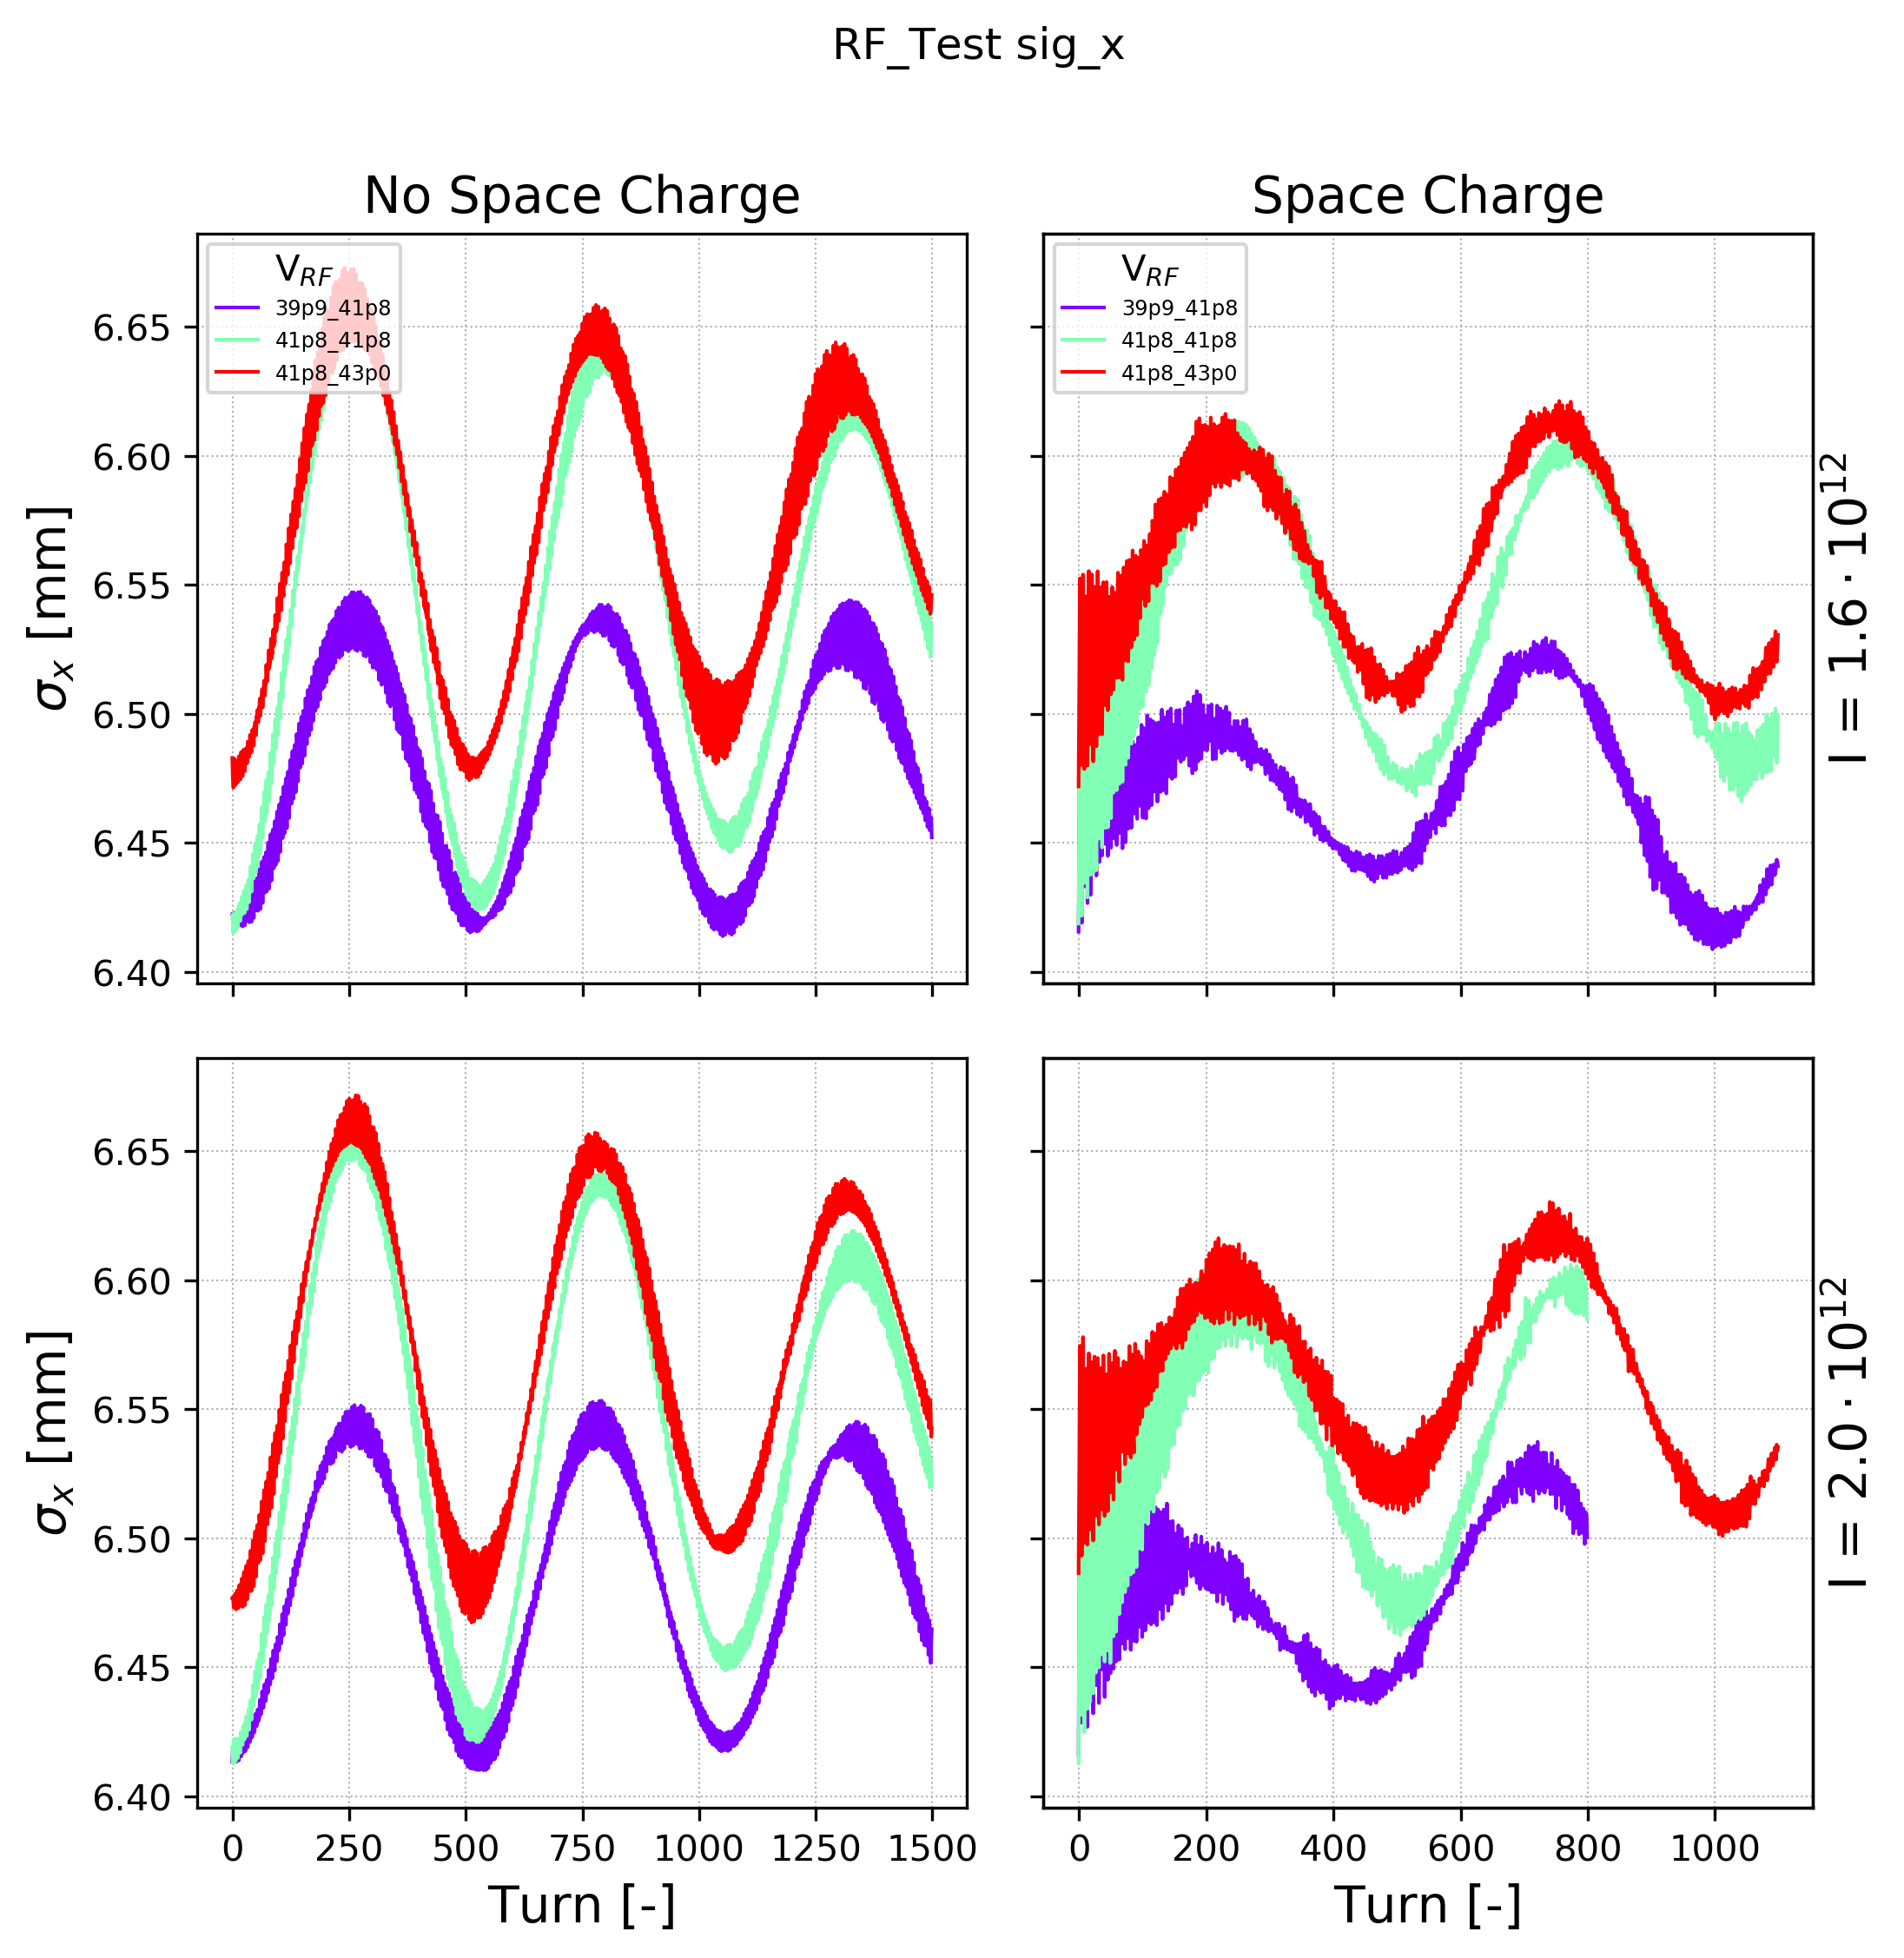

In [13]:
parameter = 'sig_x'
multi1 = 1E3

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\sigma_x$ [mm]');
ax3.set_ylabel(r'$\sigma_x$ [mm]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd1[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd1[key][parameter][0]*multi1) - np.min(dd1[key][parameter][0]*multi1))
        print title_2, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label);
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd2[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd2[key][parameter][0]*multi1) - np.min(dd2[key][parameter][0]*multi1))
        print title_1, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label);
ax2.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd3[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd3[key][parameter][0]*multi1) - np.min(dd3[key][parameter][0]*multi1))
        print title_2, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd4[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd4[key][parameter][0]*multi1) - np.min(dd4[key][parameter][0]*multi1))
        print title_1, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

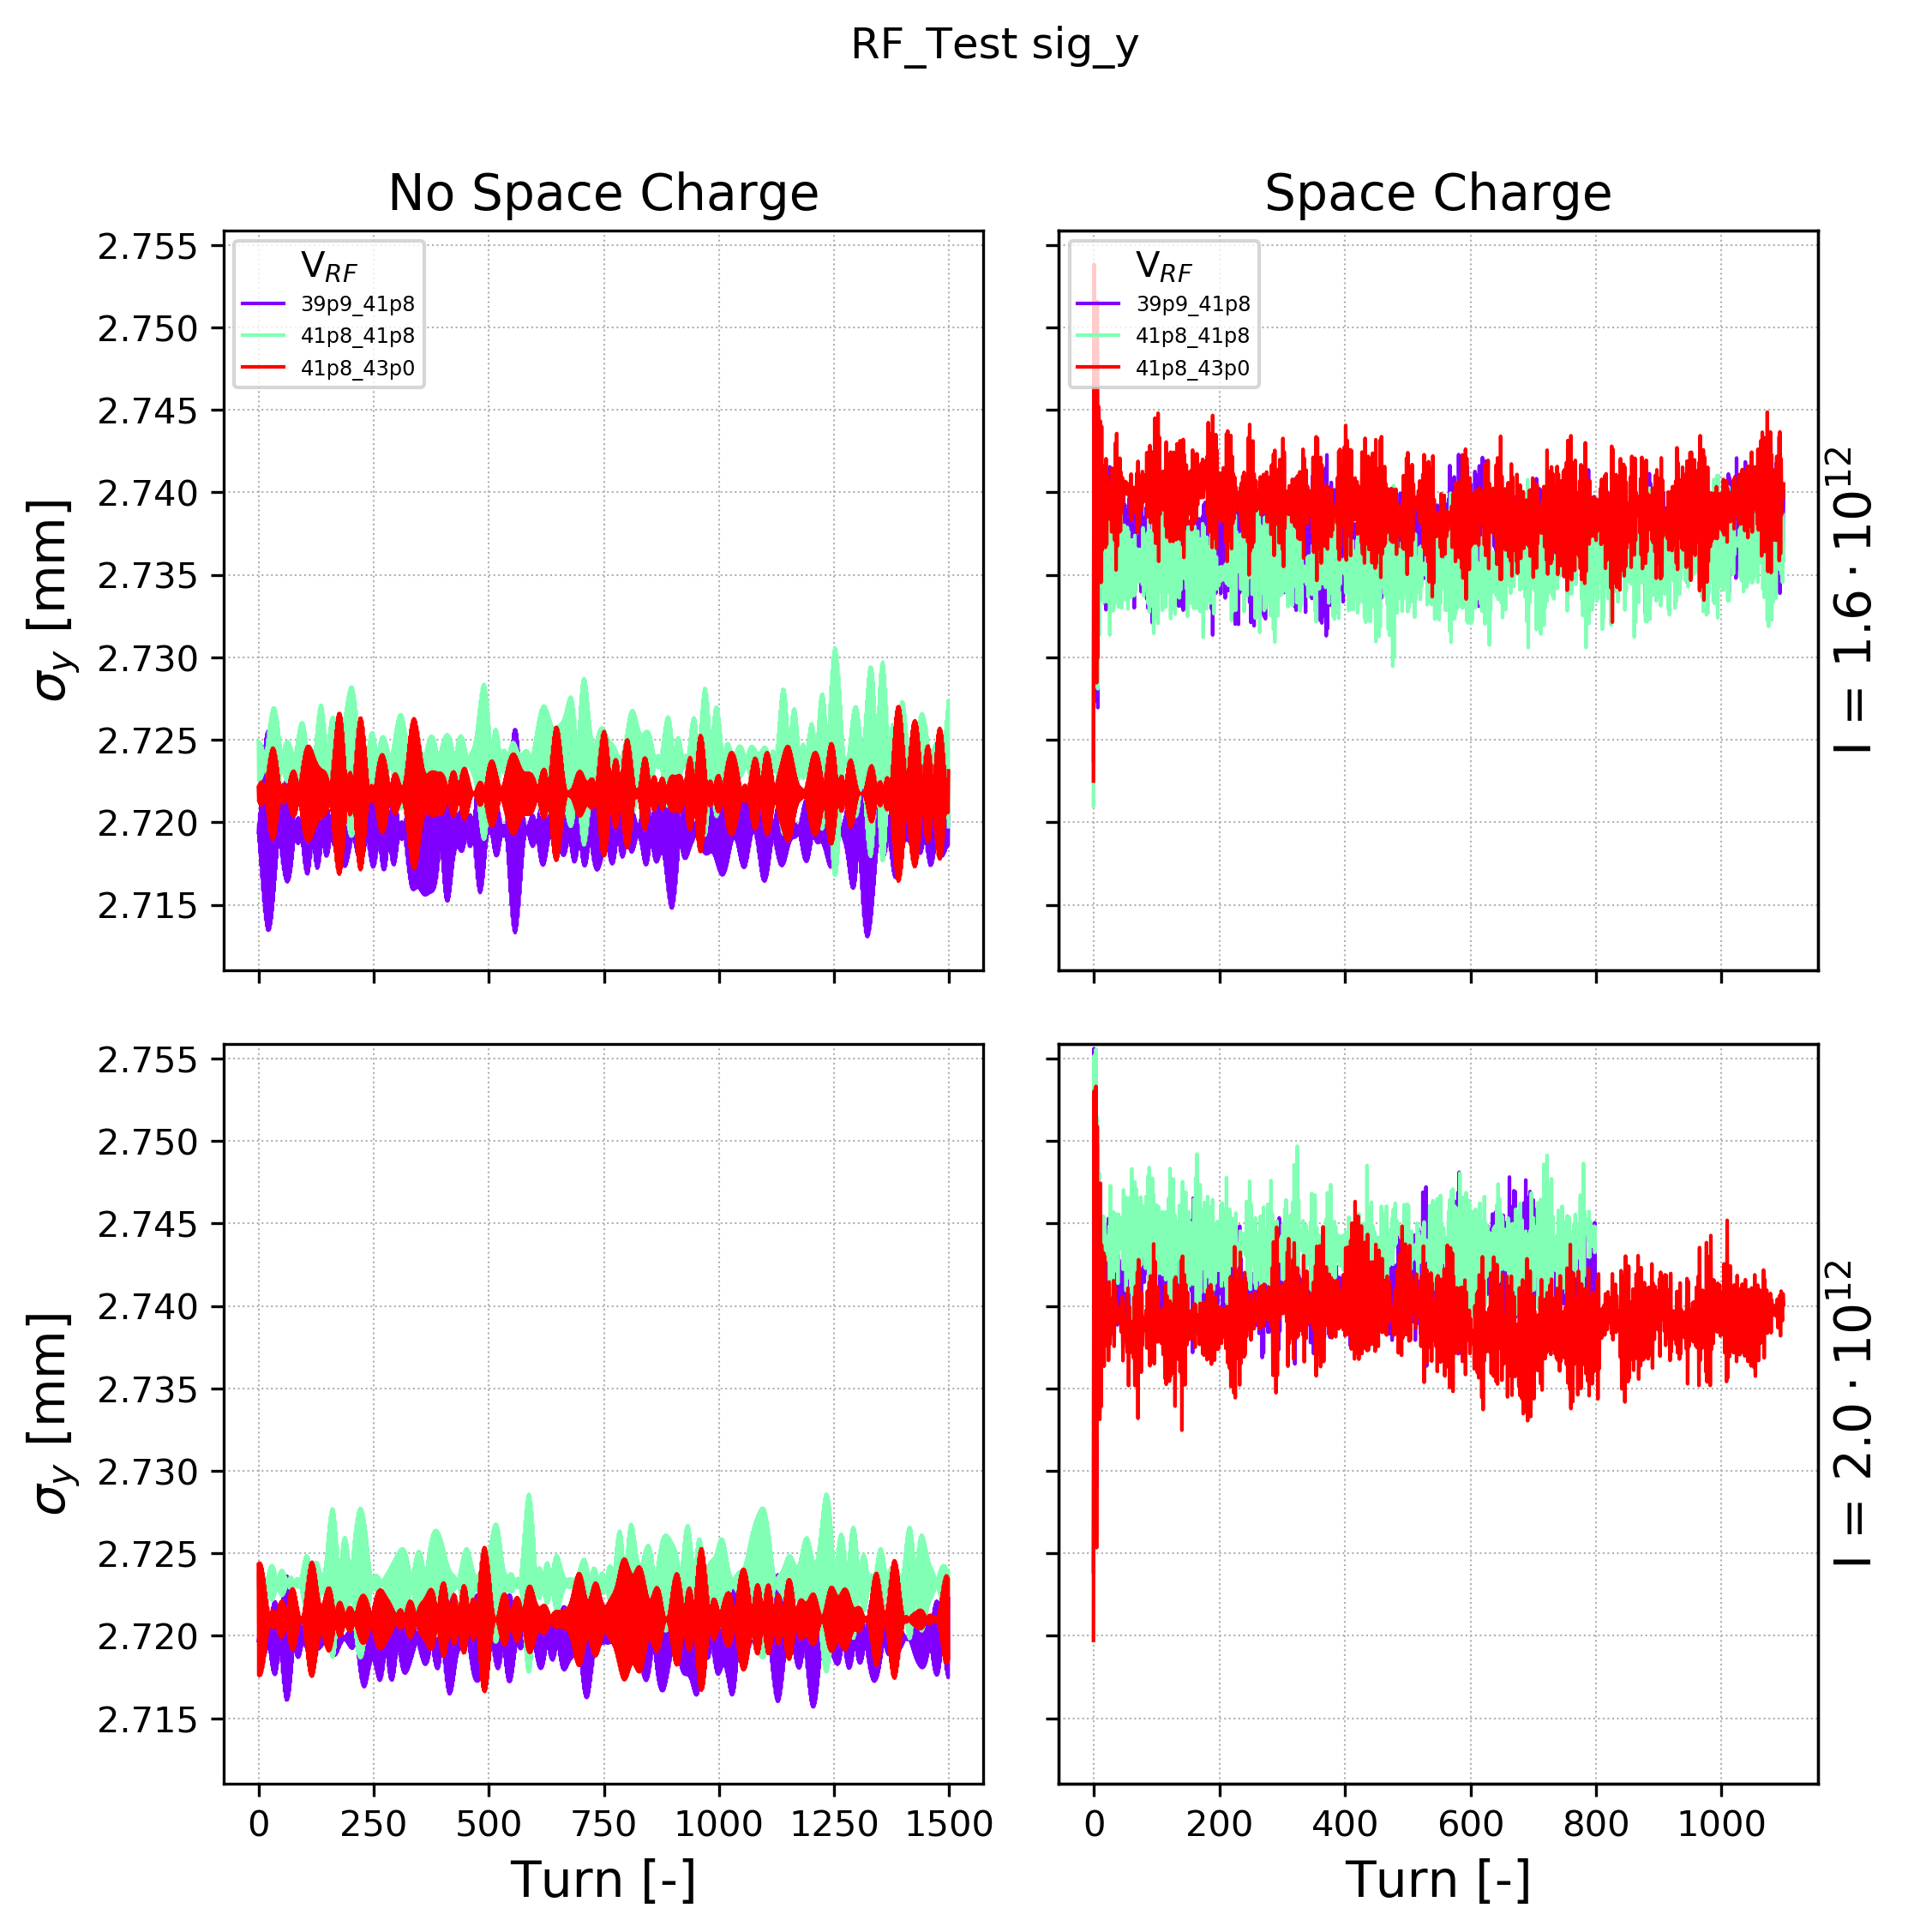

In [14]:
parameter = 'sig_y'
multi1 = 1E3

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\sigma_y$ [mm]');
ax3.set_ylabel(r'$\sigma_y$ [mm]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label);
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label);
ax2.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

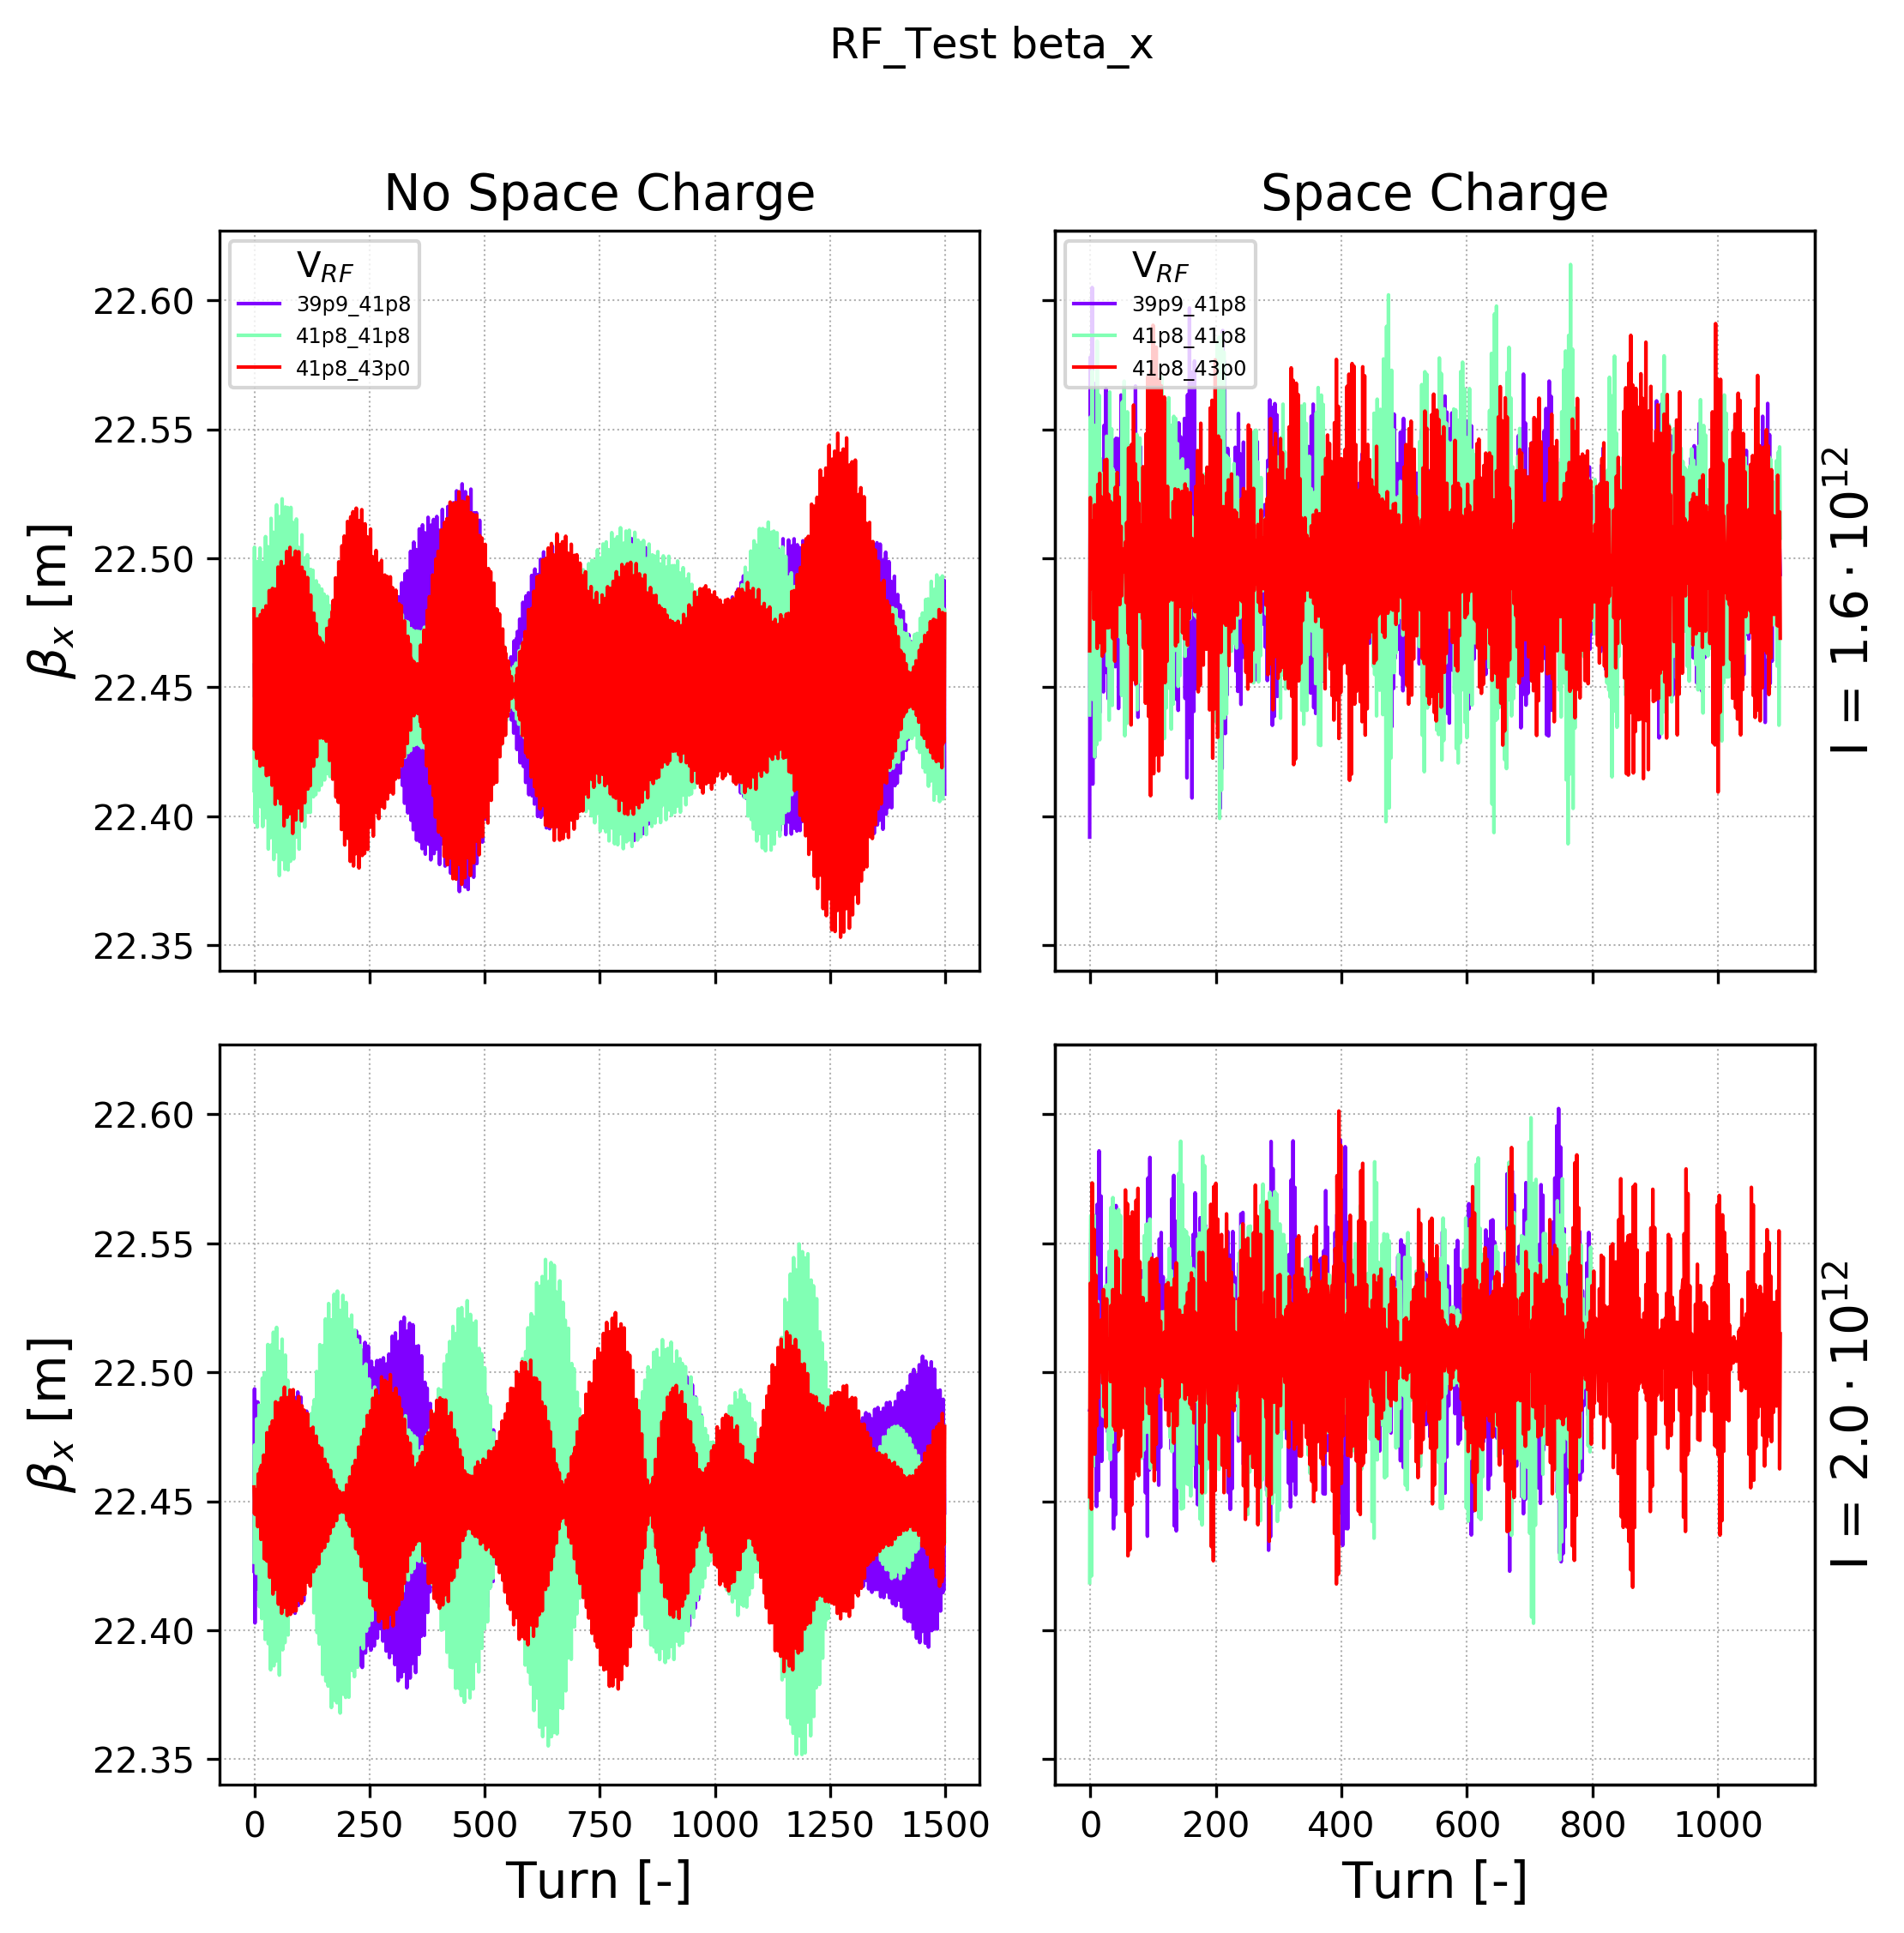

In [15]:
parameter = 'beta_x'
multi1 = 1

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\beta_x$ [m]');
ax3.set_ylabel(r'$\beta_x$ [m]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label);
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label);
ax2.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

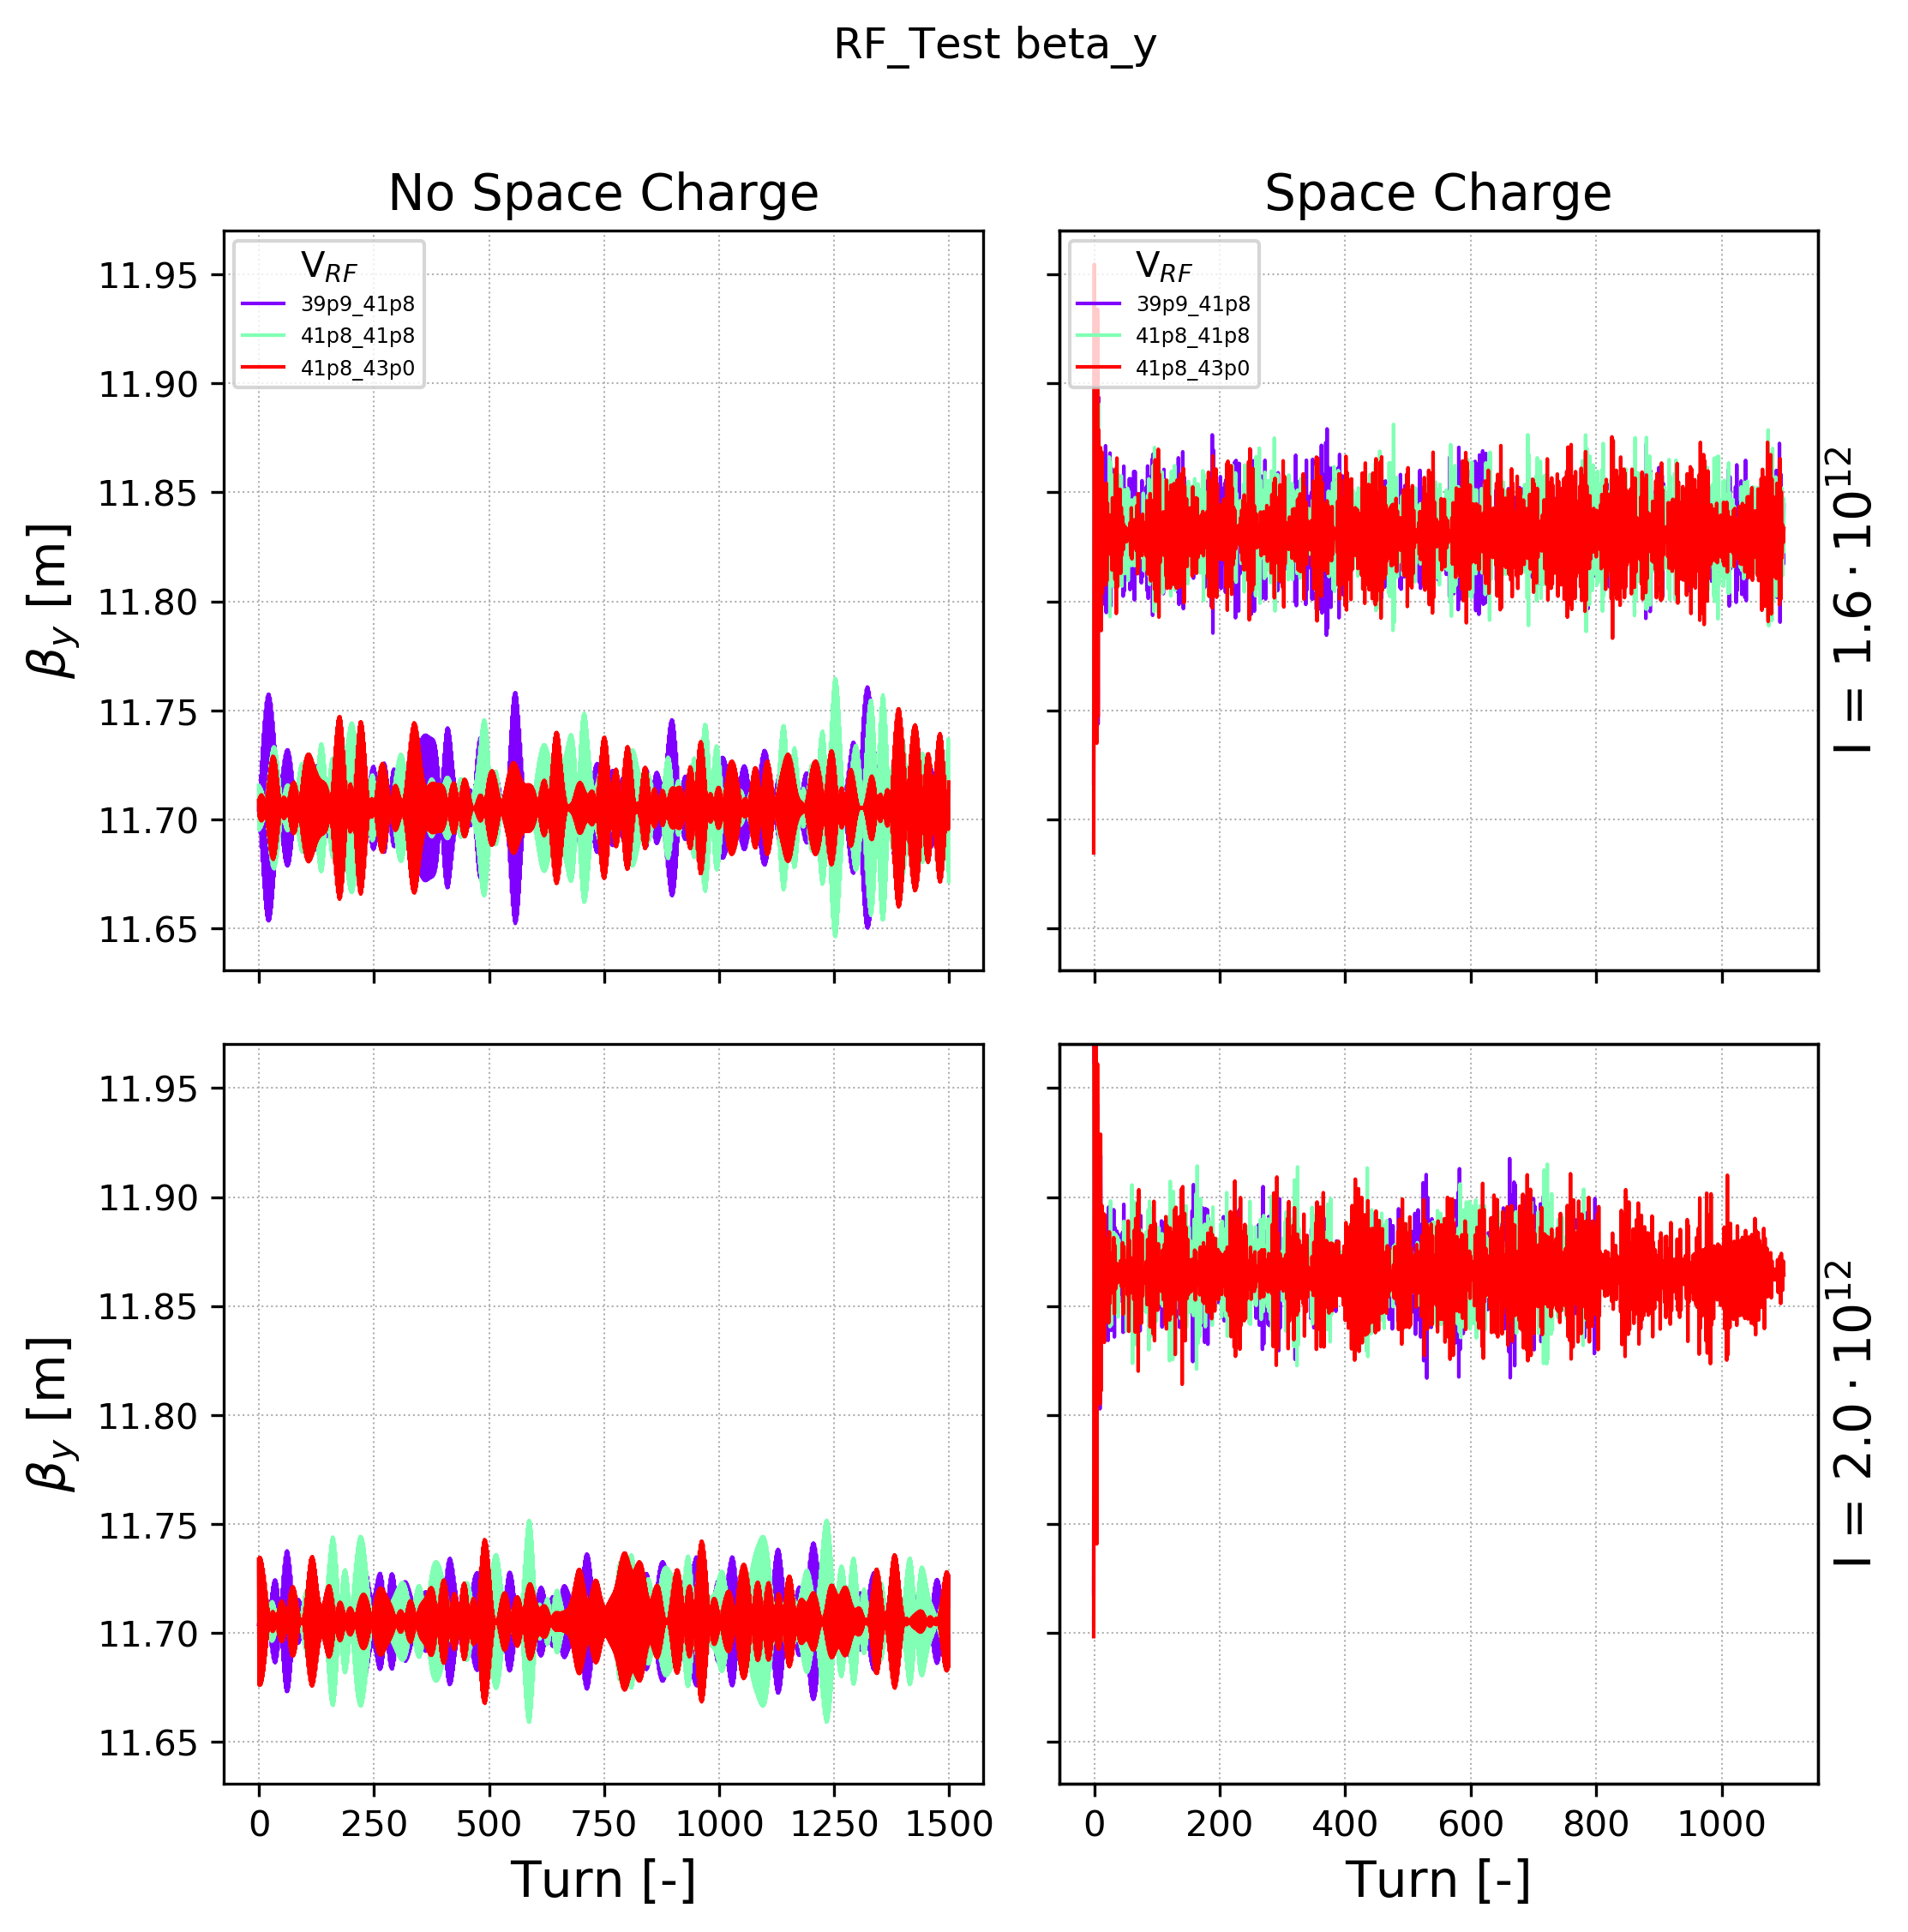

In [16]:
parameter = 'beta_y'
multi1 = 1

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\beta_y$ [m]');
ax3.set_ylabel(r'$\beta_y$ [m]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label);
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label);
ax2.set_title(title_2)
c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

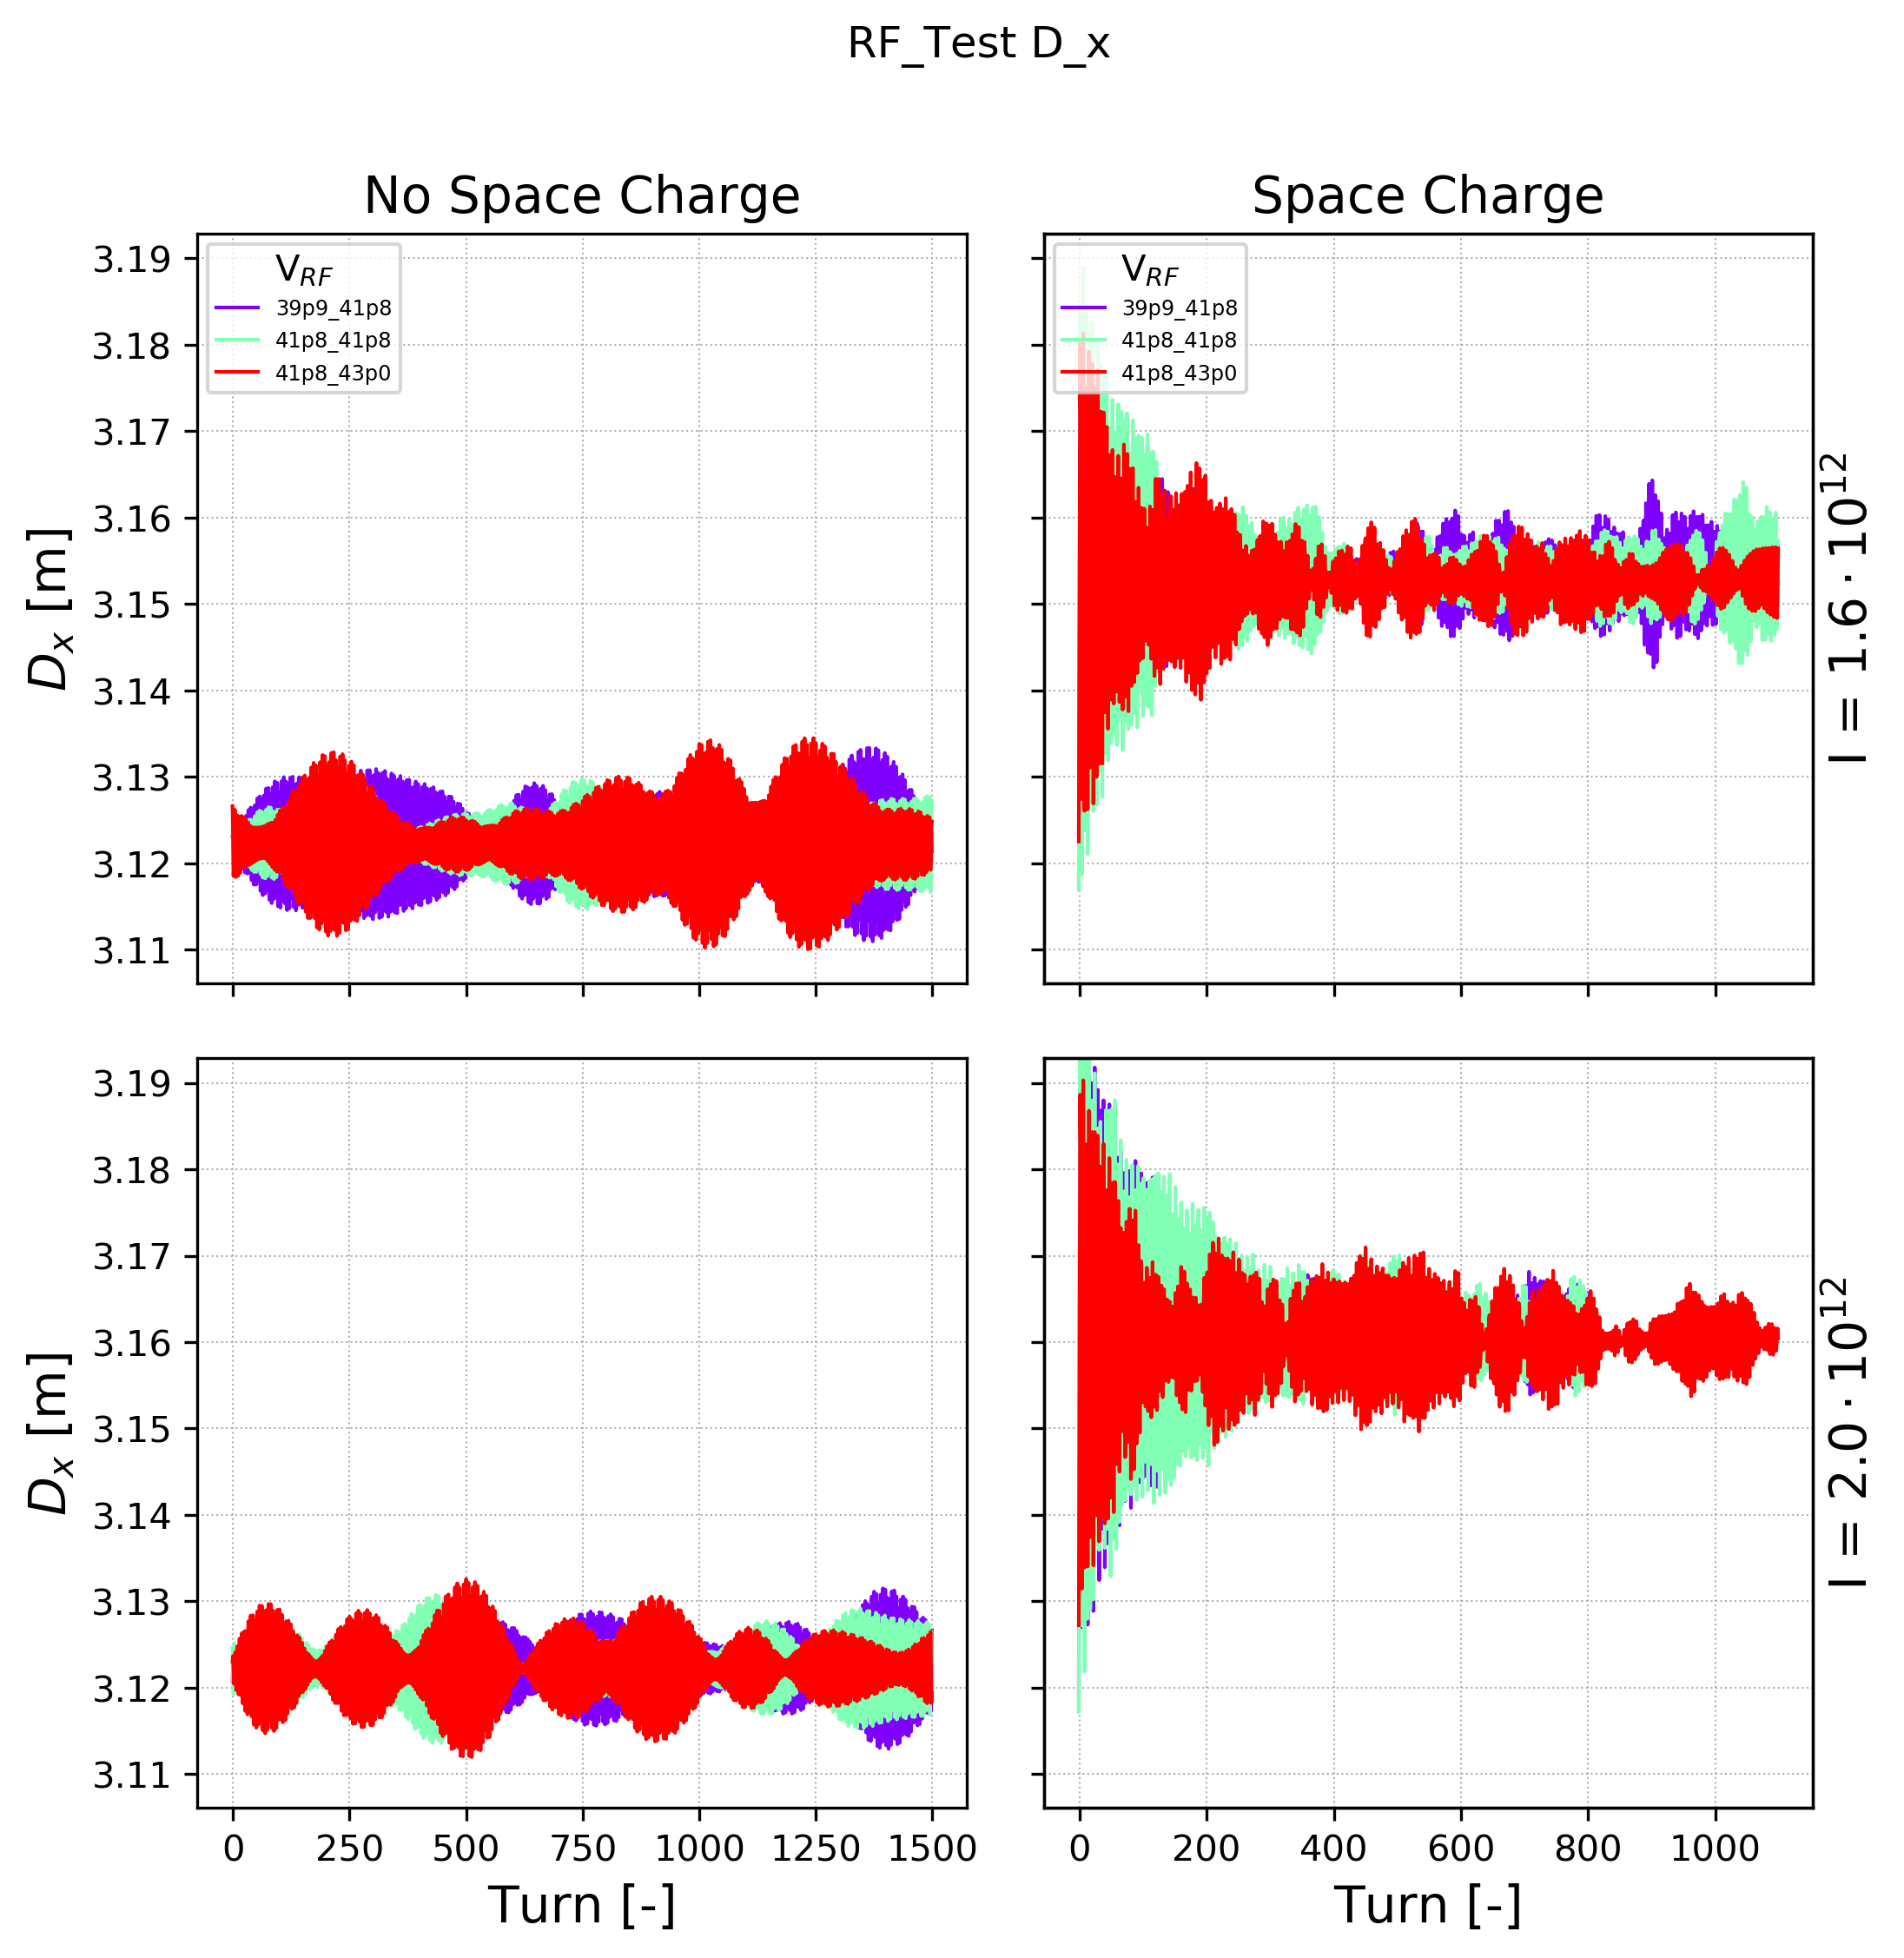

In [17]:
parameter = 'D_x'
multi1 = 1

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$D_x$ [m]');
ax3.set_ylabel(r'$D_x$ [m]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label);
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label);
ax2.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

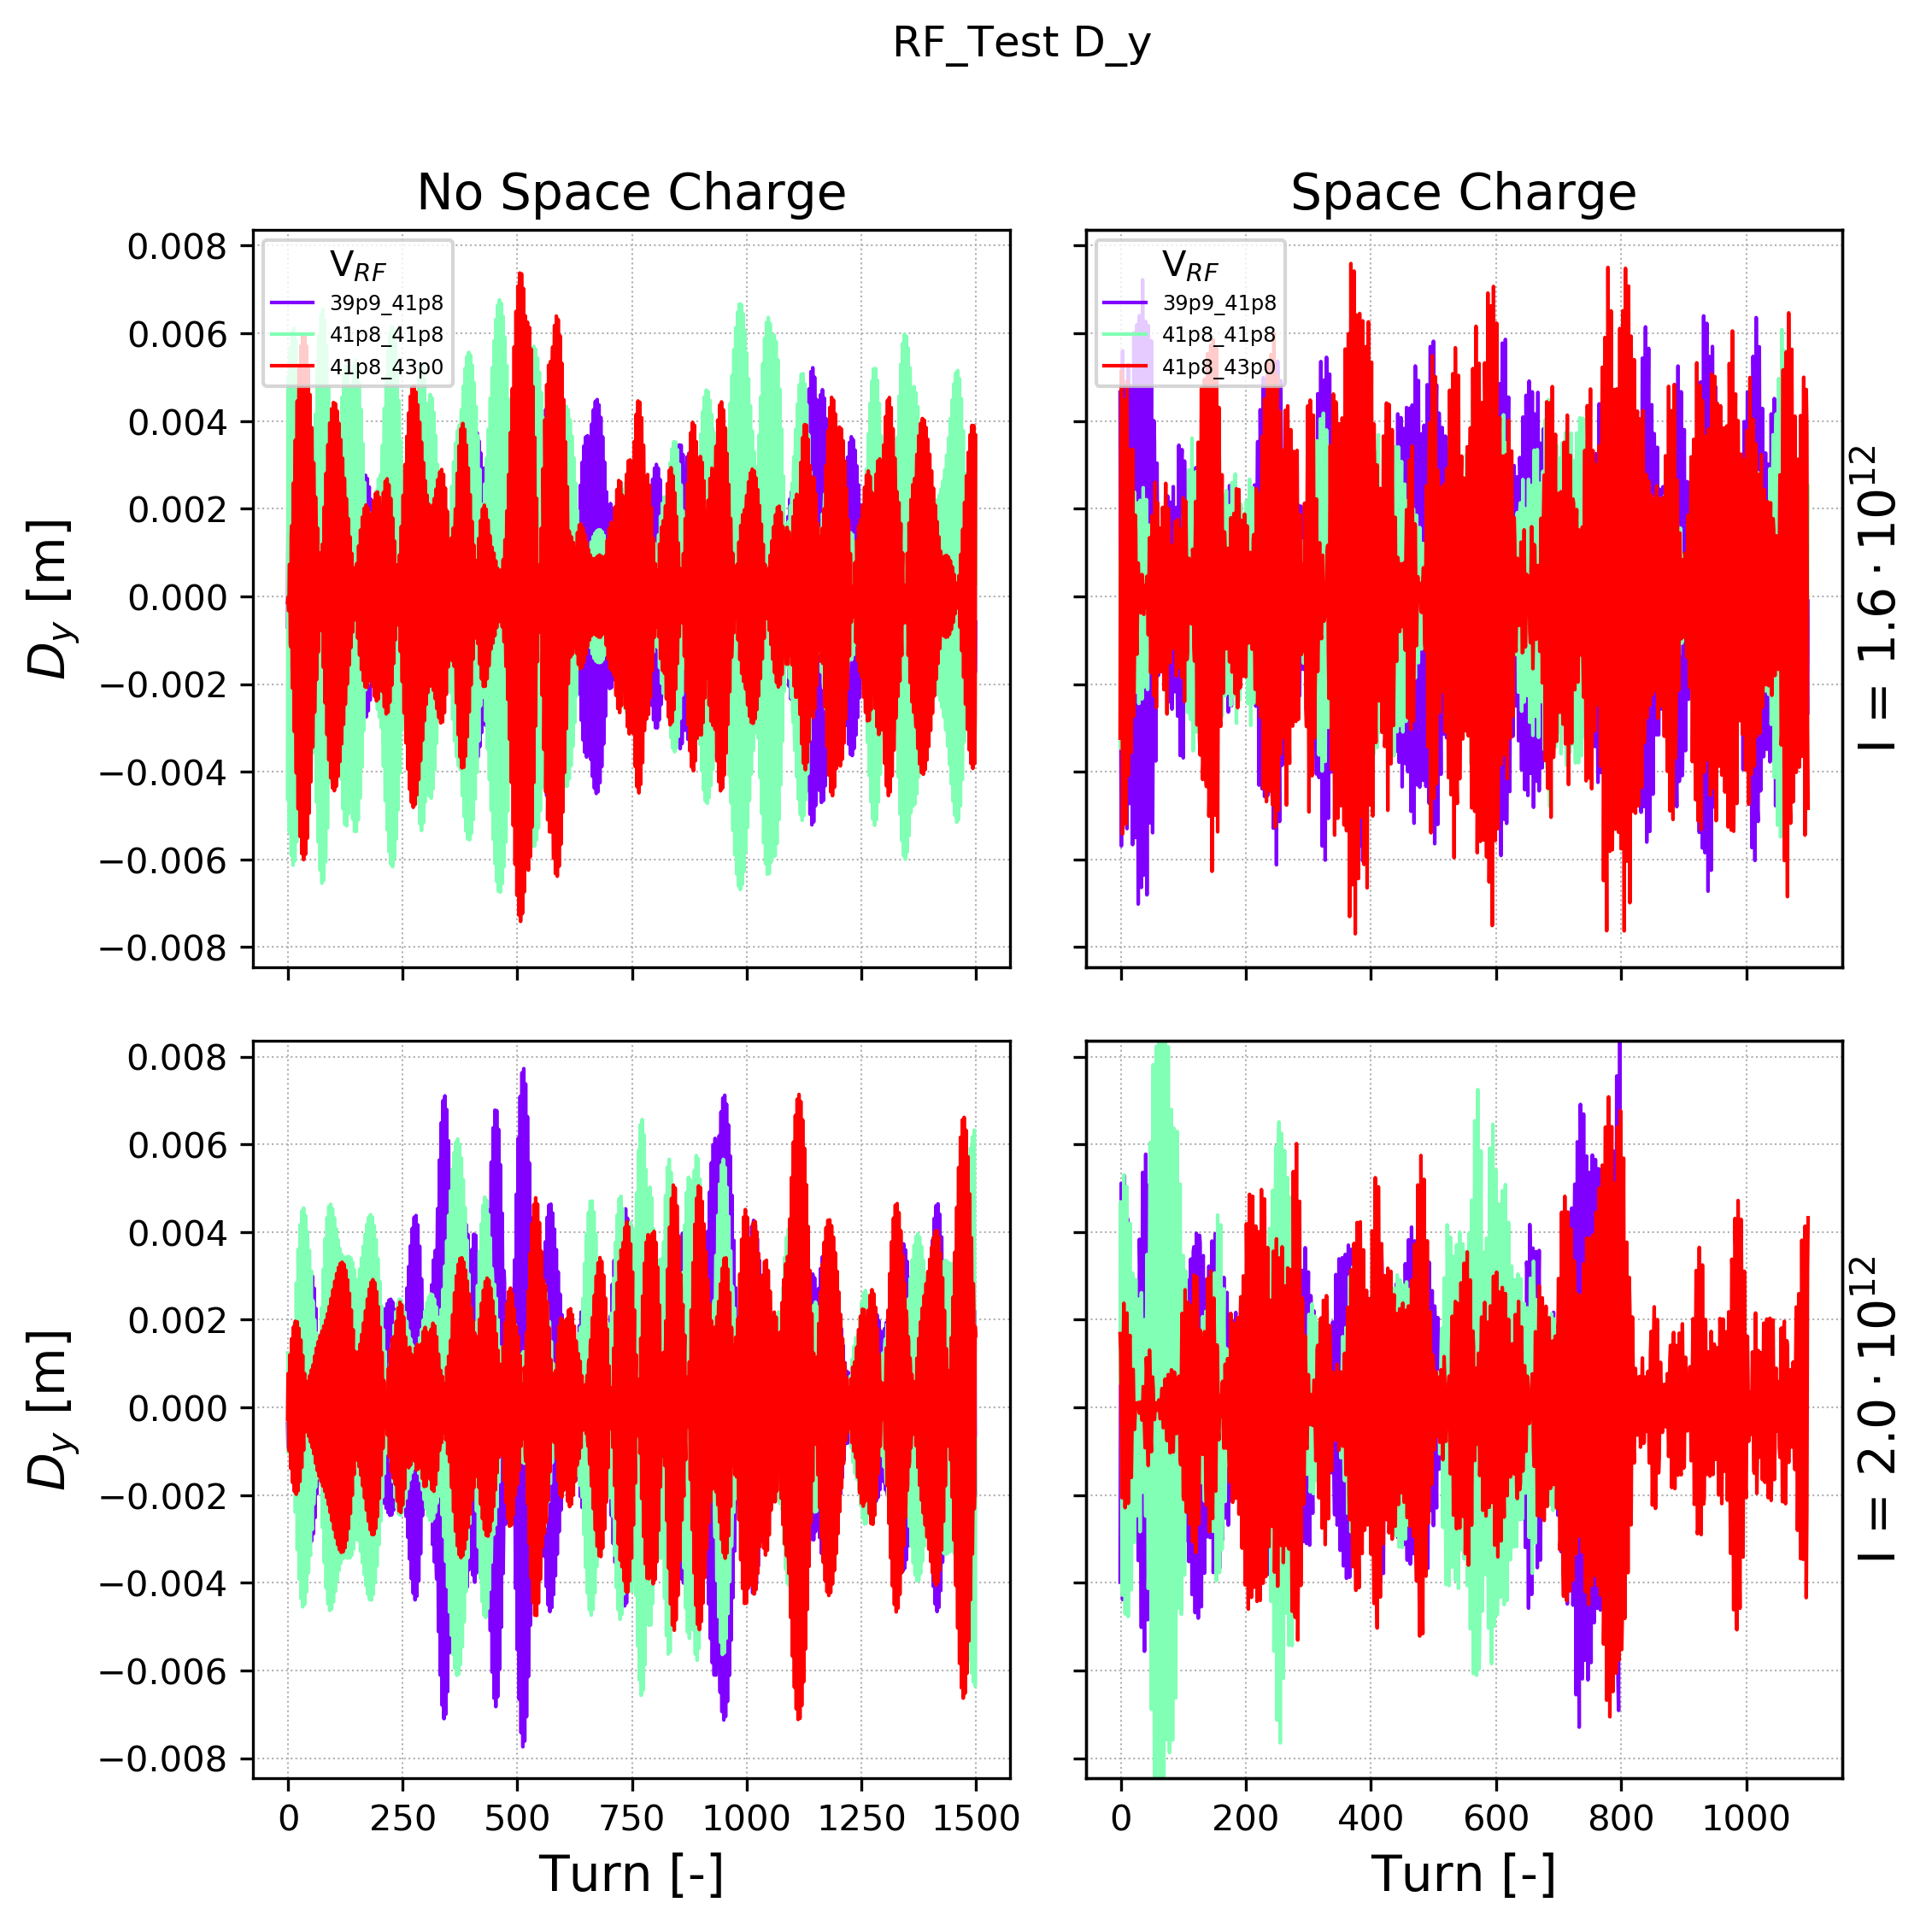

In [18]:
parameter = 'D_y'
multi1 = 1

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$D_y$ [m]');
ax3.set_ylabel(r'$D_y$ [m]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label);
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label);
ax2.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

Space Charge   I = $1.6 \cdot 10^{12}$   39p9_41p8 Average  dpp_rms  =  1.7  range =  0.0467  =  2.74 %
Space Charge   I = $1.6 \cdot 10^{12}$   41p8_41p8 Average  dpp_rms  =  1.73  range =  0.0929  =  5.36 %
Space Charge   I = $1.6 \cdot 10^{12}$   41p8_43p0 Average  dpp_rms  =  1.73  range =  0.071  =  4.1 %
No Space Charge   I = $1.6 \cdot 10^{12}$   39p9_41p8 Average  dpp_rms  =  1.65  range =  0.0414  =  2.51 %
No Space Charge   I = $1.6 \cdot 10^{12}$   41p8_41p8 Average  dpp_rms  =  1.67  range =  0.0517  =  3.09 %
No Space Charge   I = $1.6 \cdot 10^{12}$   41p8_43p0 Average  dpp_rms  =  1.68  range =  0.0422  =  2.51 %
Space Charge   I = $2.0 \cdot 10^{12}$   39p9_41p8 Average  dpp_rms  =  1.7  range =  0.0506  =  2.97 %
Space Charge   I = $2.0 \cdot 10^{12}$   41p8_41p8 Average  dpp_rms  =  1.73  range =  0.0931  =  5.38 %
Space Charge   I = $2.0 \cdot 10^{12}$   41p8_43p0 Average  dpp_rms  =  1.74  range =  0.0724  =  4.17 %
No Space Charge   I = $2.0 \cdot 10^{12}$   39p9_4

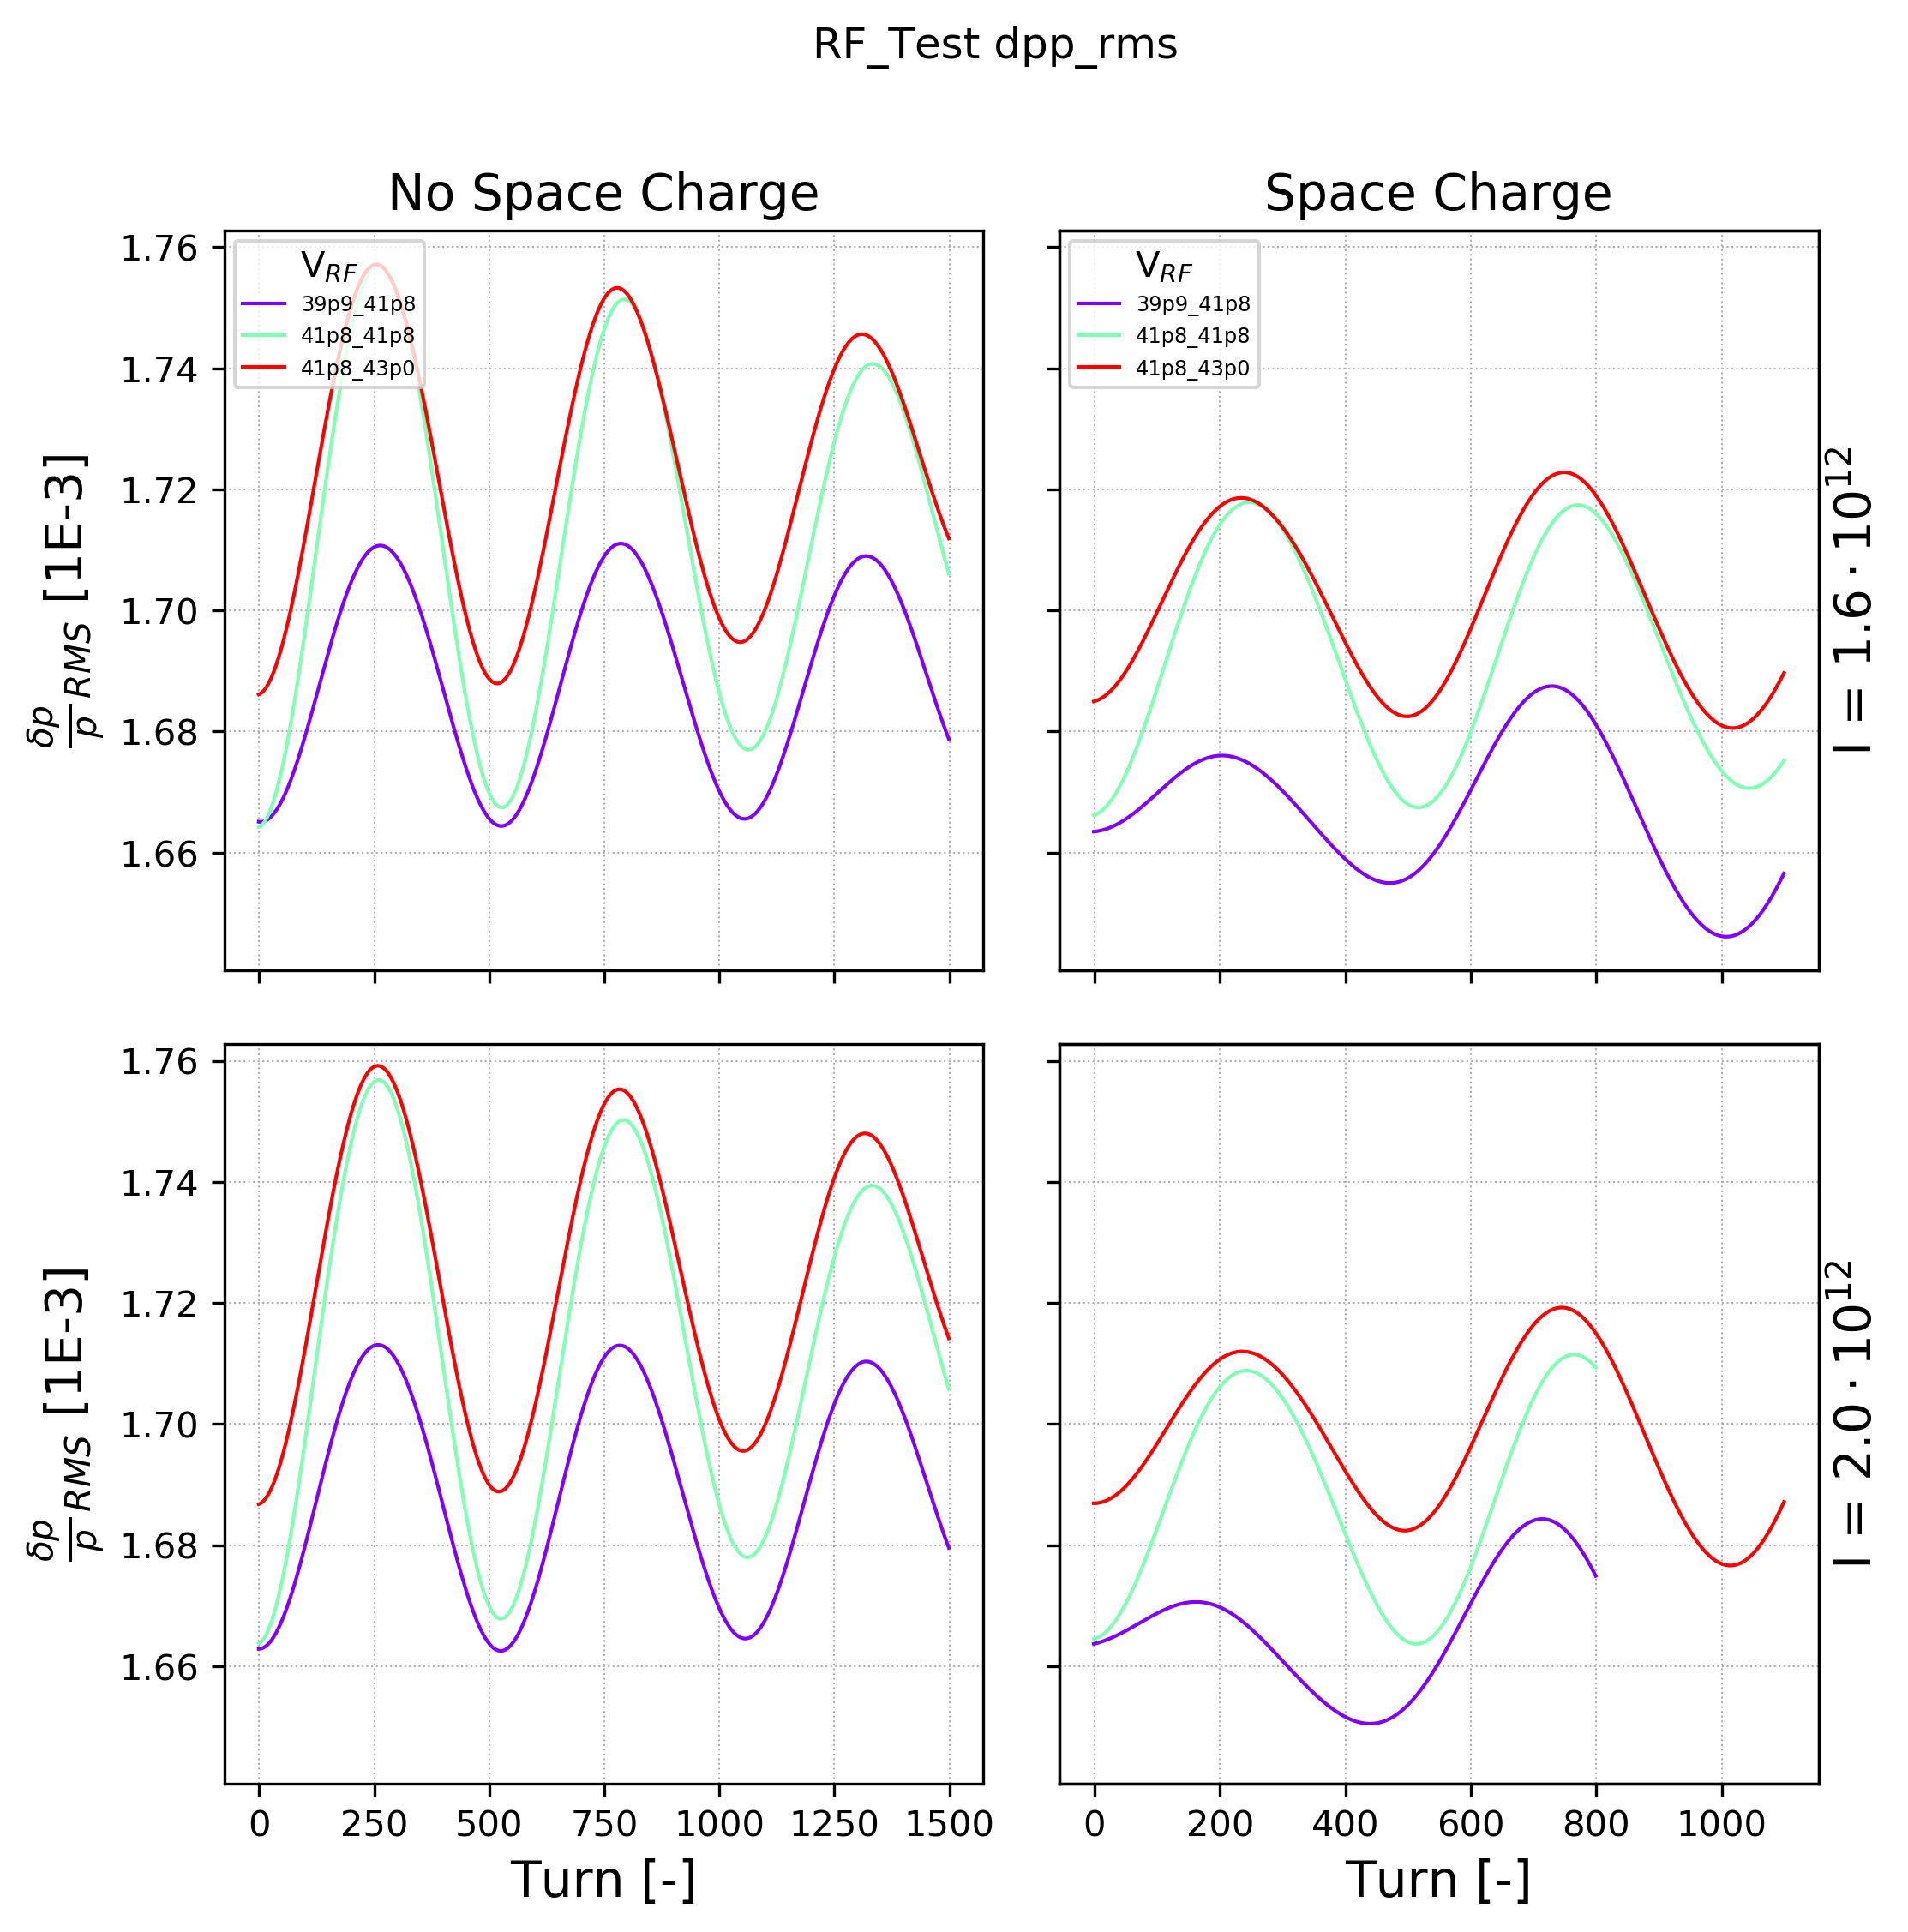

In [19]:
parameter = 'dpp_rms'
multi1 = 1E3

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\frac{\delta p}{p}_{RMS}$ [1E-3]');
ax3.set_ylabel(r'$\frac{\delta p}{p}_{RMS}$ [1E-3]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd1[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd1[key][parameter][0]*multi1) - np.min(dd1[key][parameter][0]*multi1))
        print title_2, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label);
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd2[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd2[key][parameter][0]*multi1) - np.min(dd2[key][parameter][0]*multi1))
        print title_1, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label);
ax2.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd3[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd3[key][parameter][0]*multi1) - np.min(dd3[key][parameter][0]*multi1))
        print title_2, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd4[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd4[key][parameter][0]*multi1) - np.min(dd4[key][parameter][0]*multi1))
        print title_1, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

Space Charge   I = $1.6 \cdot 10^{12}$   39p9_41p8 Average  bunchlength  =  184.0  range =  4.65  =  2.52 %
Space Charge   I = $1.6 \cdot 10^{12}$   41p8_41p8 Average  bunchlength  =  181.0  range =  9.55  =  5.28 %
Space Charge   I = $1.6 \cdot 10^{12}$   41p8_43p0 Average  bunchlength  =  183.0  range =  7.13  =  3.89 %
No Space Charge   I = $1.6 \cdot 10^{12}$   39p9_41p8 Average  bunchlength  =  190.0  range =  4.49  =  2.36 %
No Space Charge   I = $1.6 \cdot 10^{12}$   41p8_41p8 Average  bunchlength  =  187.0  range =  5.15  =  2.75 %
No Space Charge   I = $1.6 \cdot 10^{12}$   41p8_43p0 Average  bunchlength  =  189.0  range =  4.32  =  2.29 %
Space Charge   I = $2.0 \cdot 10^{12}$   39p9_41p8 Average  bunchlength  =  184.0  range =  5.05  =  2.74 %
Space Charge   I = $2.0 \cdot 10^{12}$   41p8_41p8 Average  bunchlength  =  181.0  range =  9.55  =  5.28 %
Space Charge   I = $2.0 \cdot 10^{12}$   41p8_43p0 Average  bunchlength  =  183.0  range =  7.31  =  3.99 %
No Space Charge   I

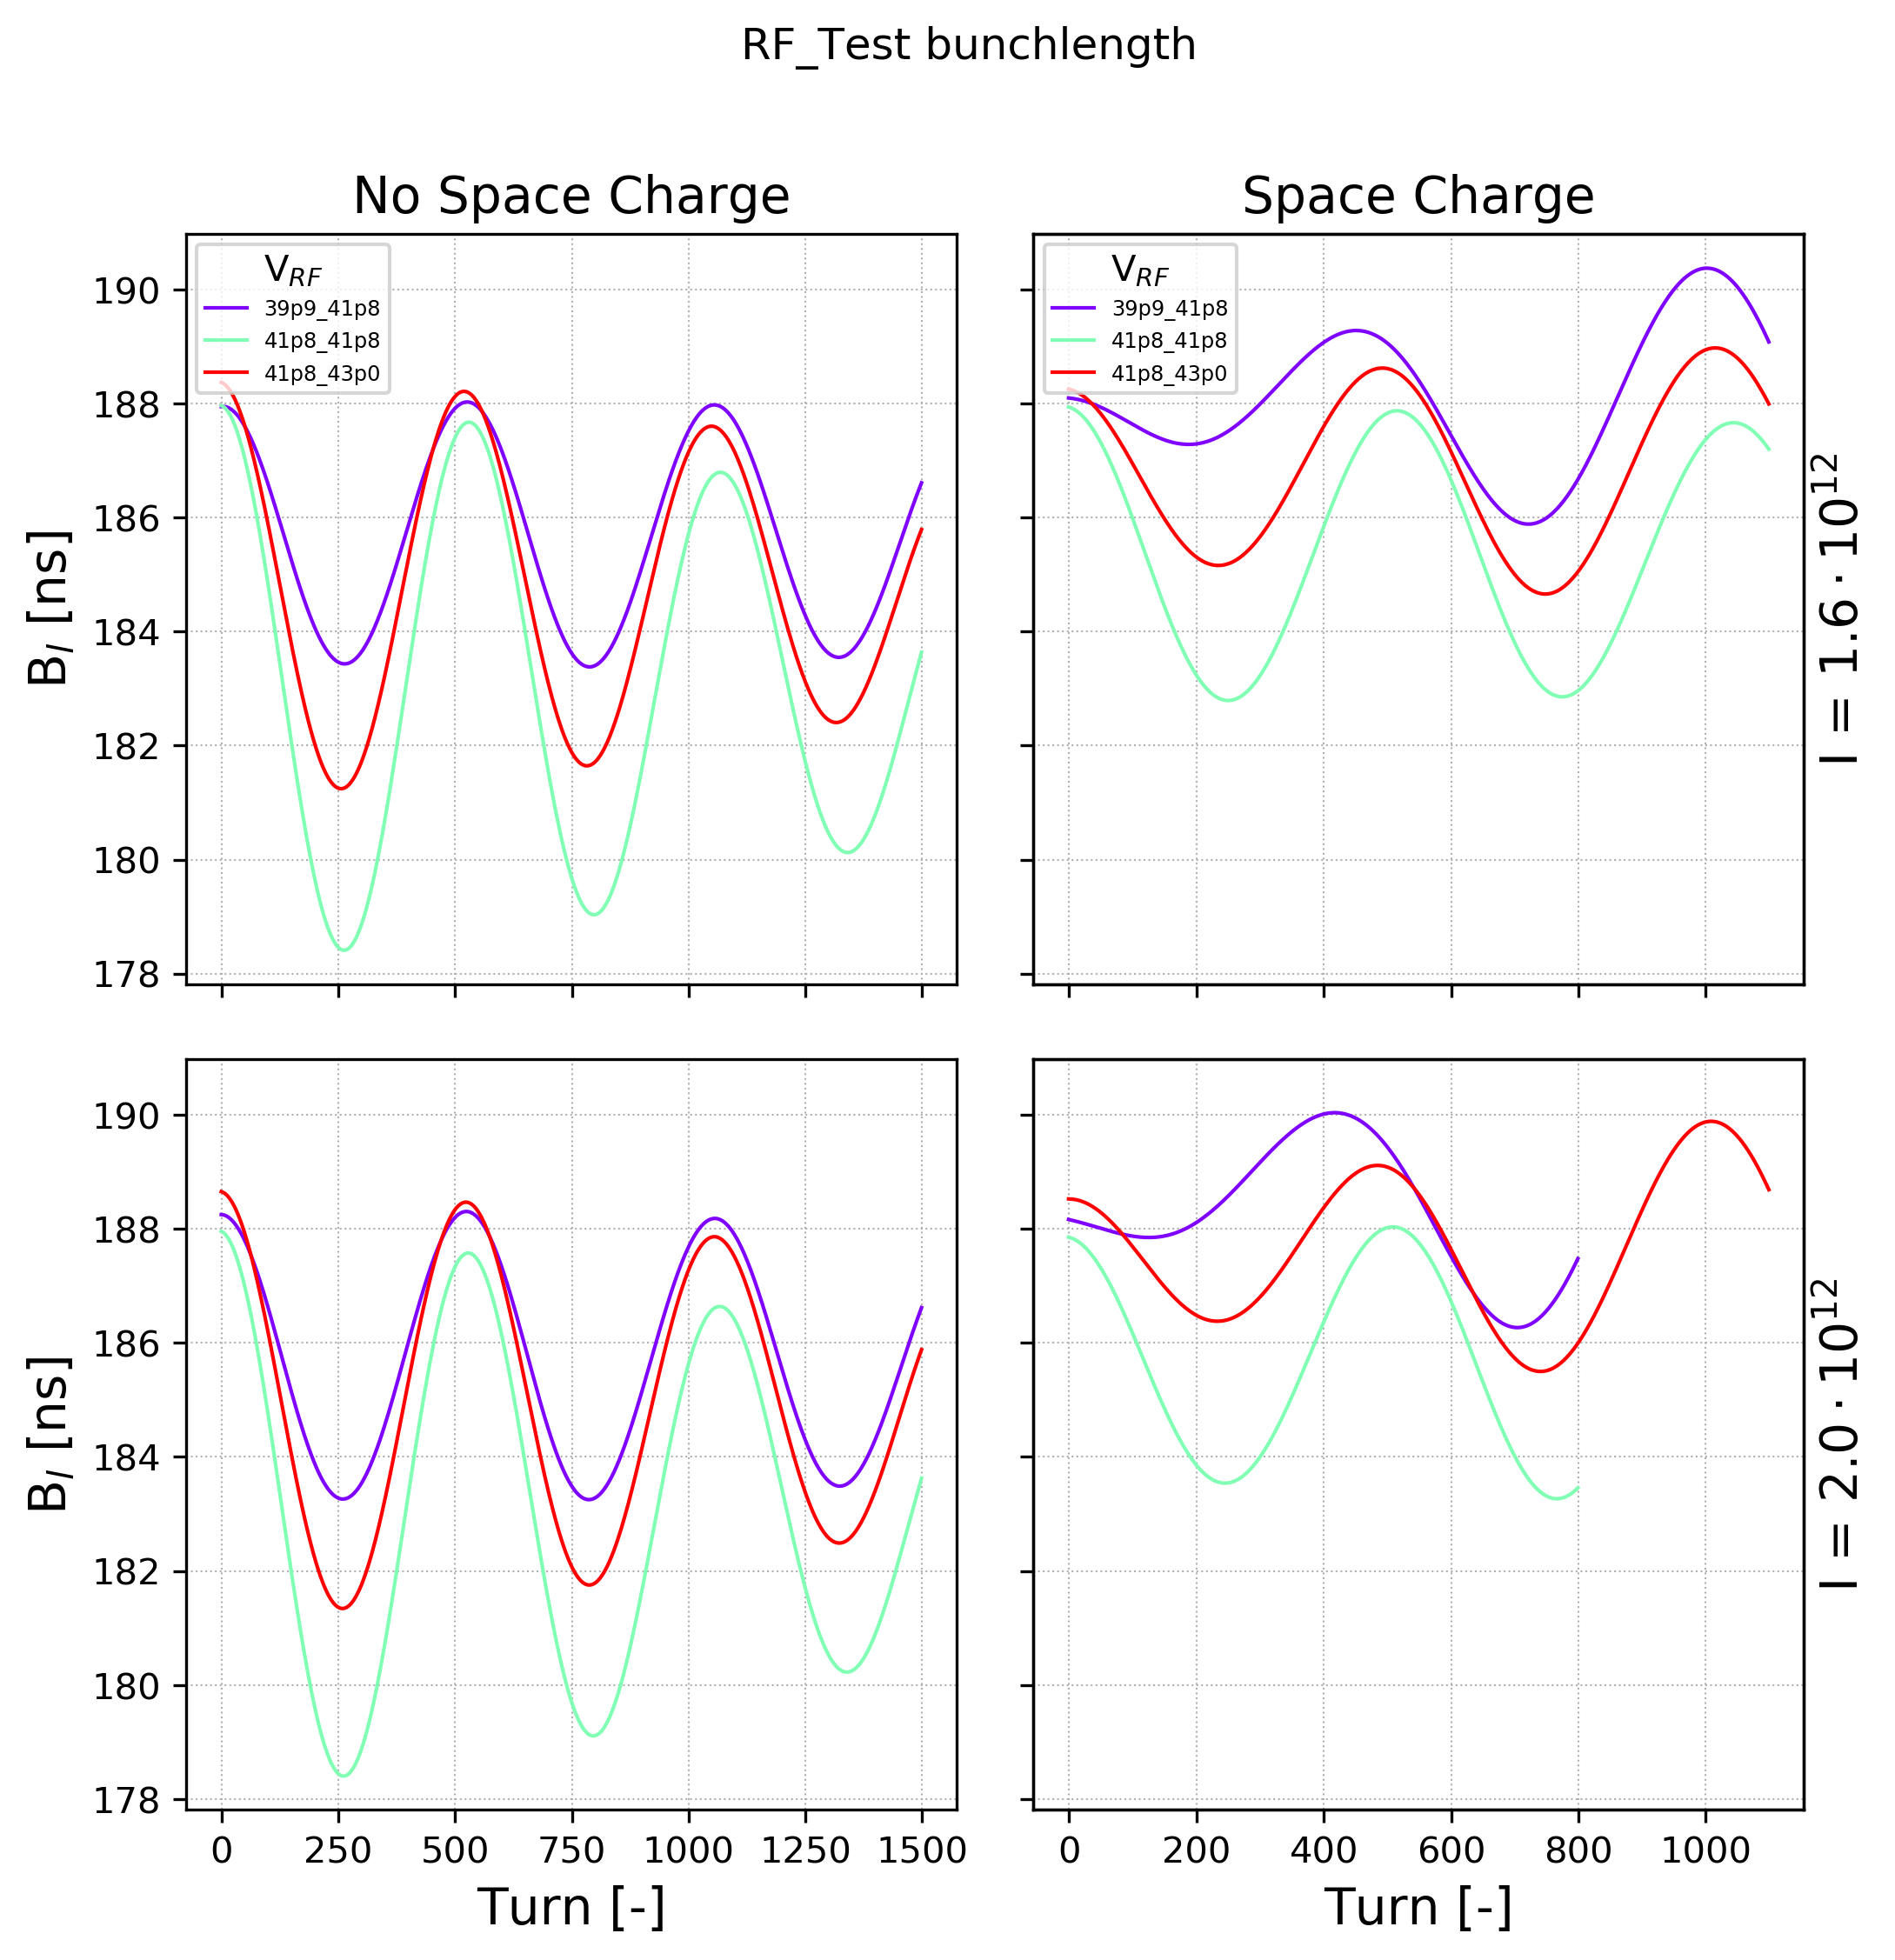

In [20]:
parameter = 'bunchlength'
multi1 = 1E9

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'B$_l$ [ns]');
ax3.set_ylabel(r'B$_l$ [ns]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd1[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd1[key][parameter][0]*multi1) - np.min(dd1[key][parameter][0]*multi1))
        print title_2, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label);
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd2[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd2[key][parameter][0]*multi1) - np.min(dd2[key][parameter][0]*multi1))
        print title_1, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label);
ax2.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd3[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd3[key][parameter][0]*multi1) - np.min(dd3[key][parameter][0]*multi1))
        print title_2, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd4[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd4[key][parameter][0]*multi1) - np.min(dd4[key][parameter][0]*multi1))
        print title_1, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

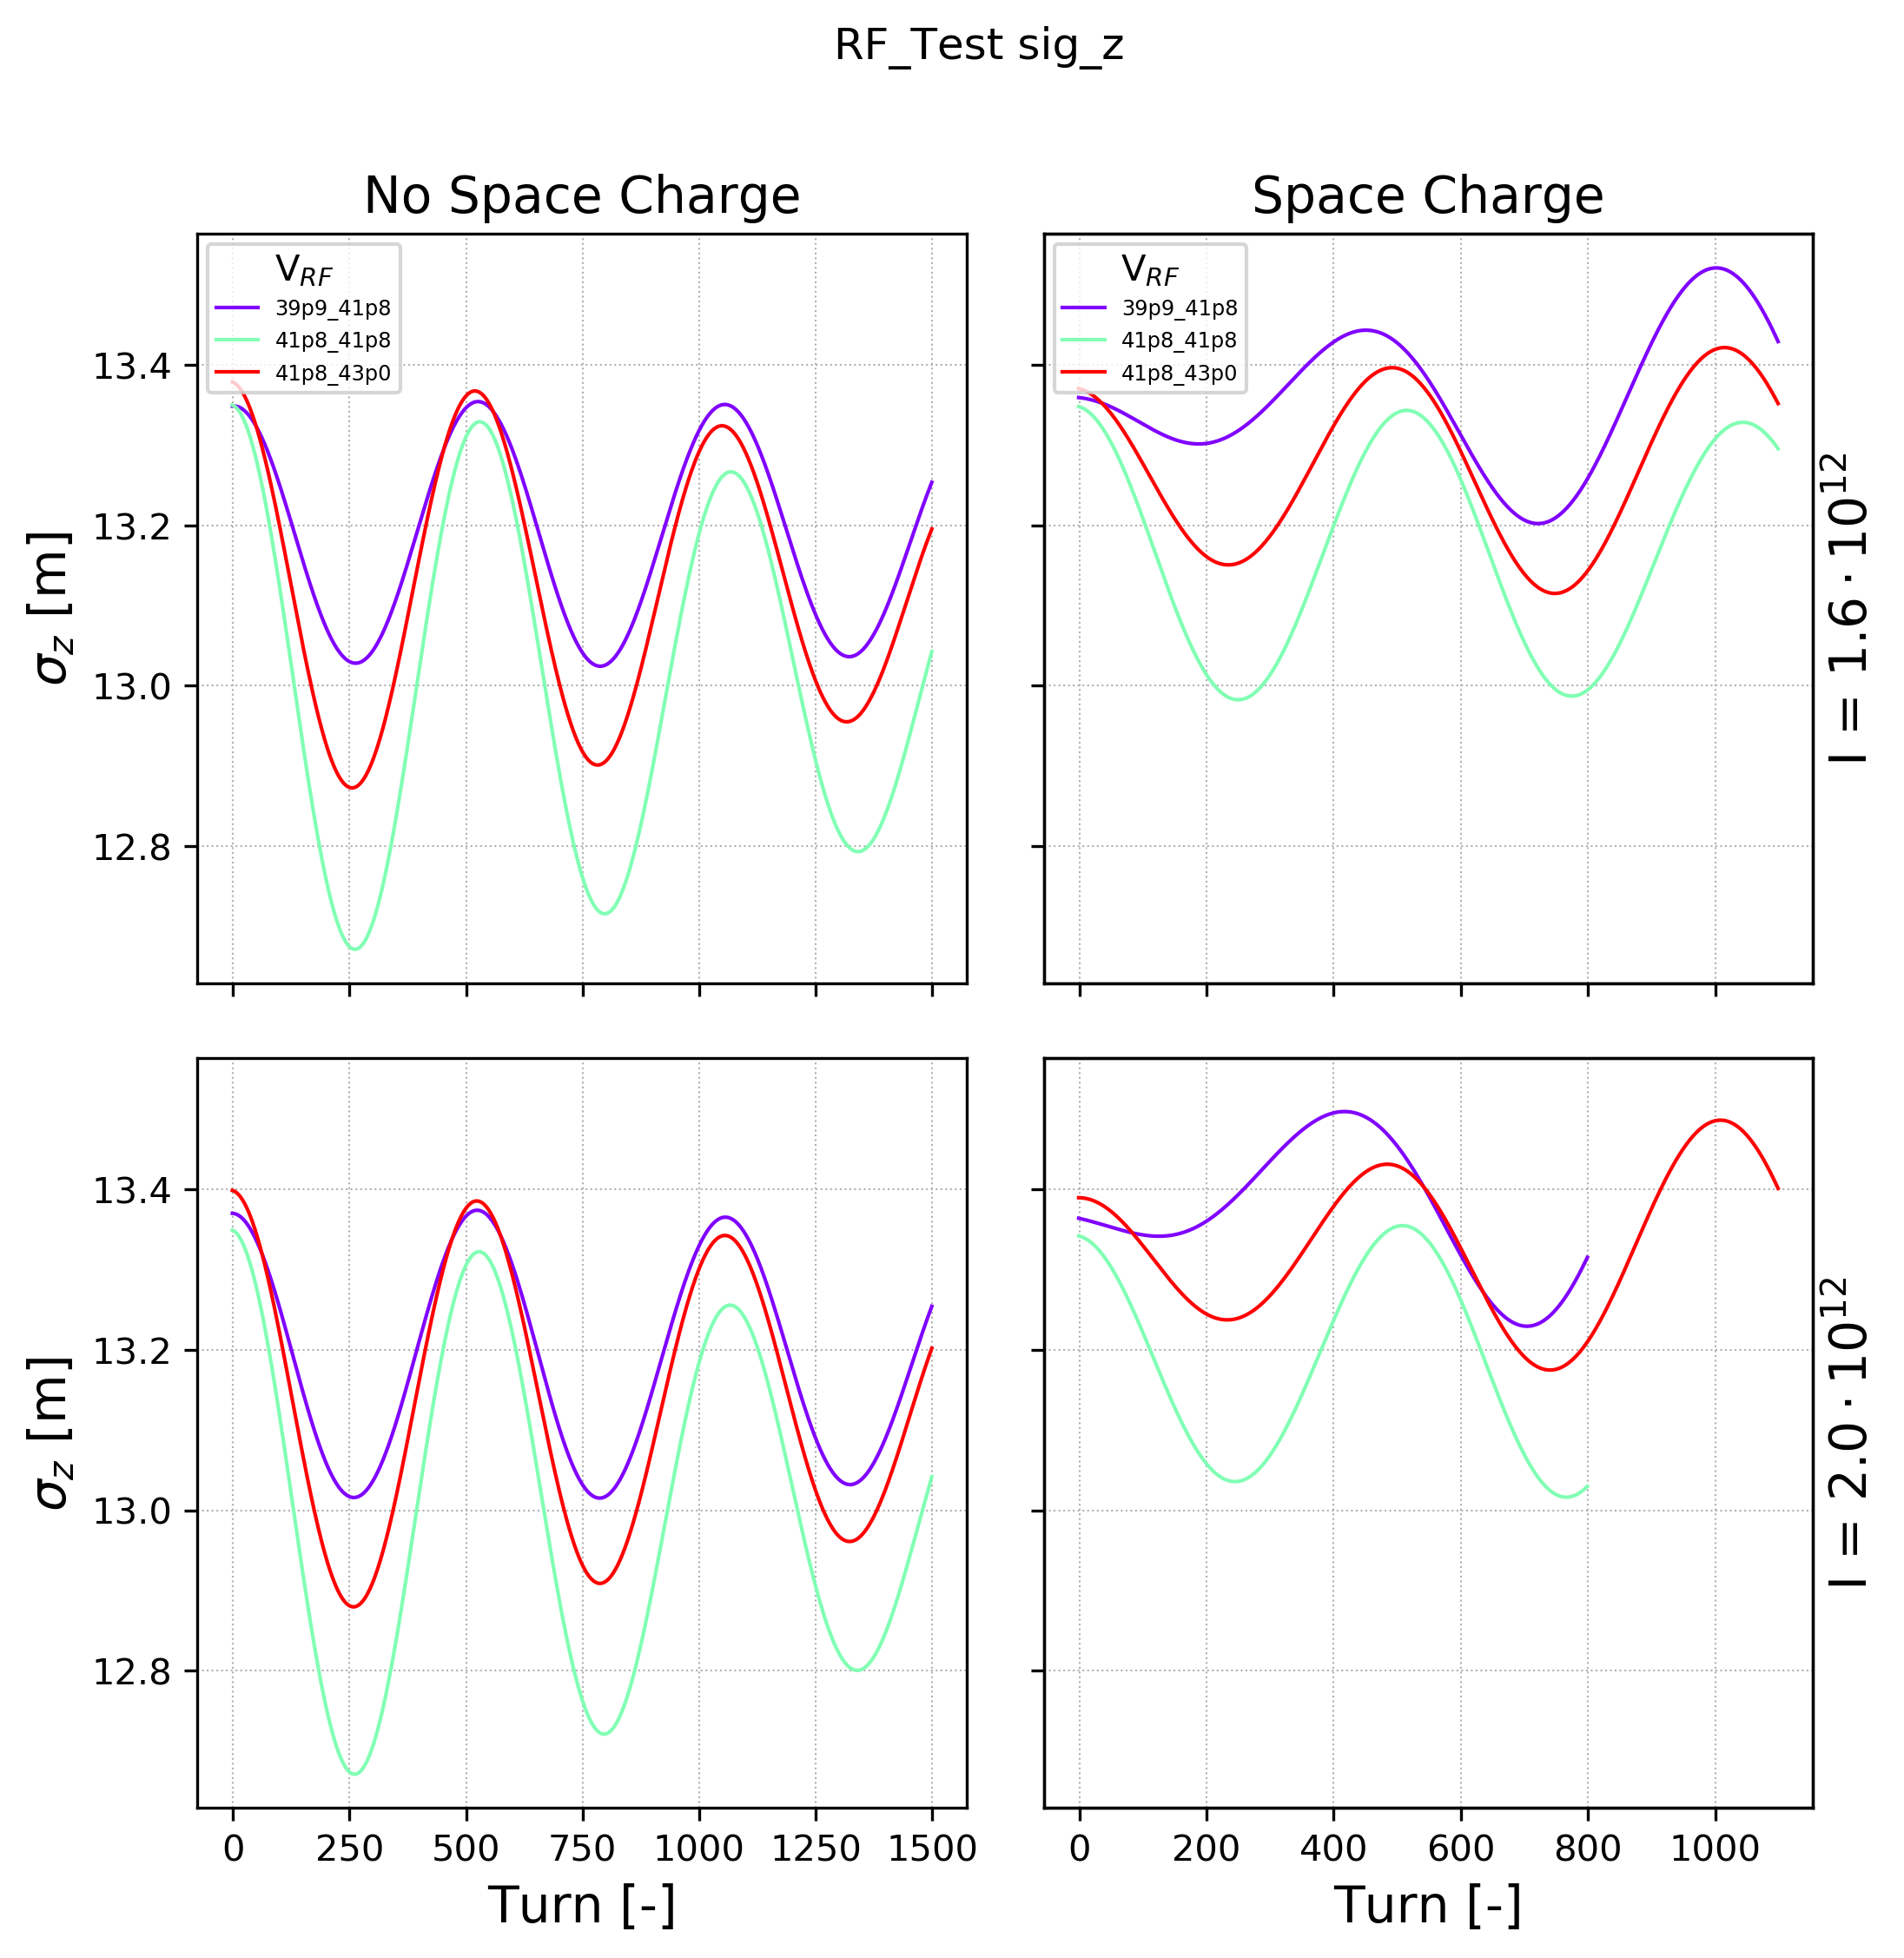

In [21]:
parameter = 'sig_z'
multi1 = 1


fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\sigma_z$ [m]');
ax3.set_ylabel(r'$\sigma_z$ [m]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label);
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label);
ax2.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

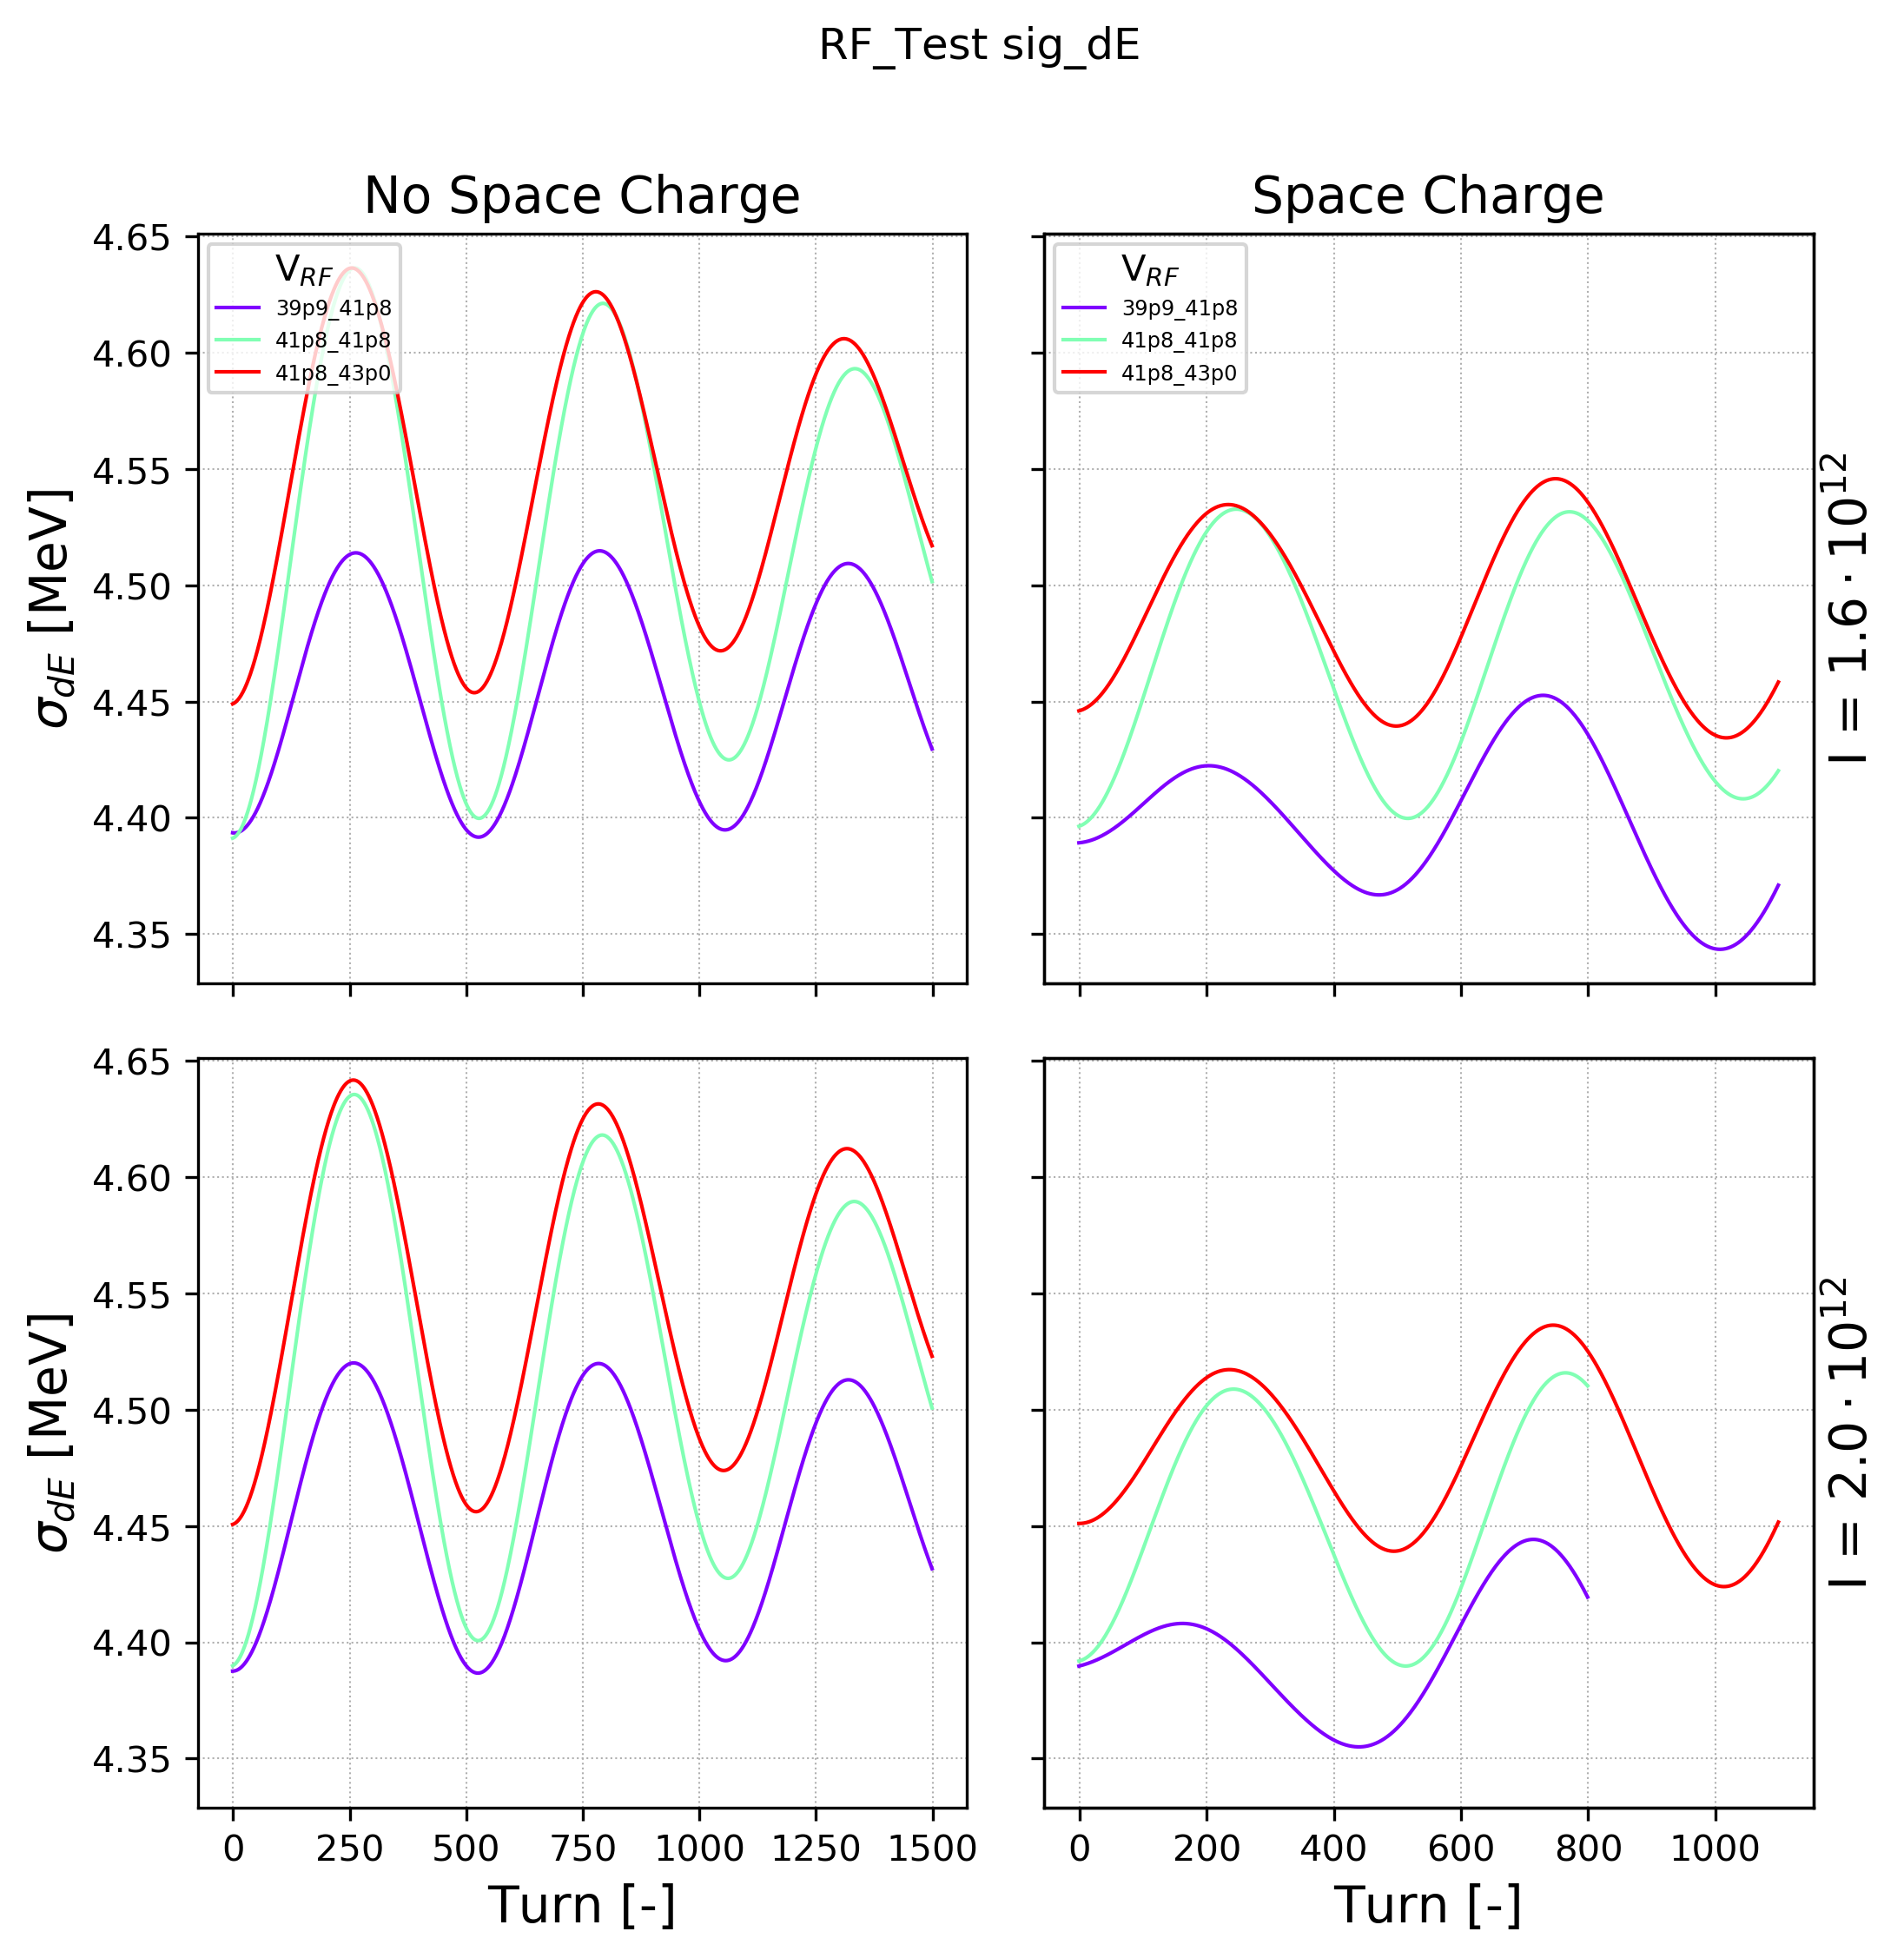

In [22]:
parameter = 'sig_dE'
multi1 = 1E3


fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\sigma_{dE}$ [MeV]');
ax3.set_ylabel(r'$\sigma_{dE}$ [MeV]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label);
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label);
ax2.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

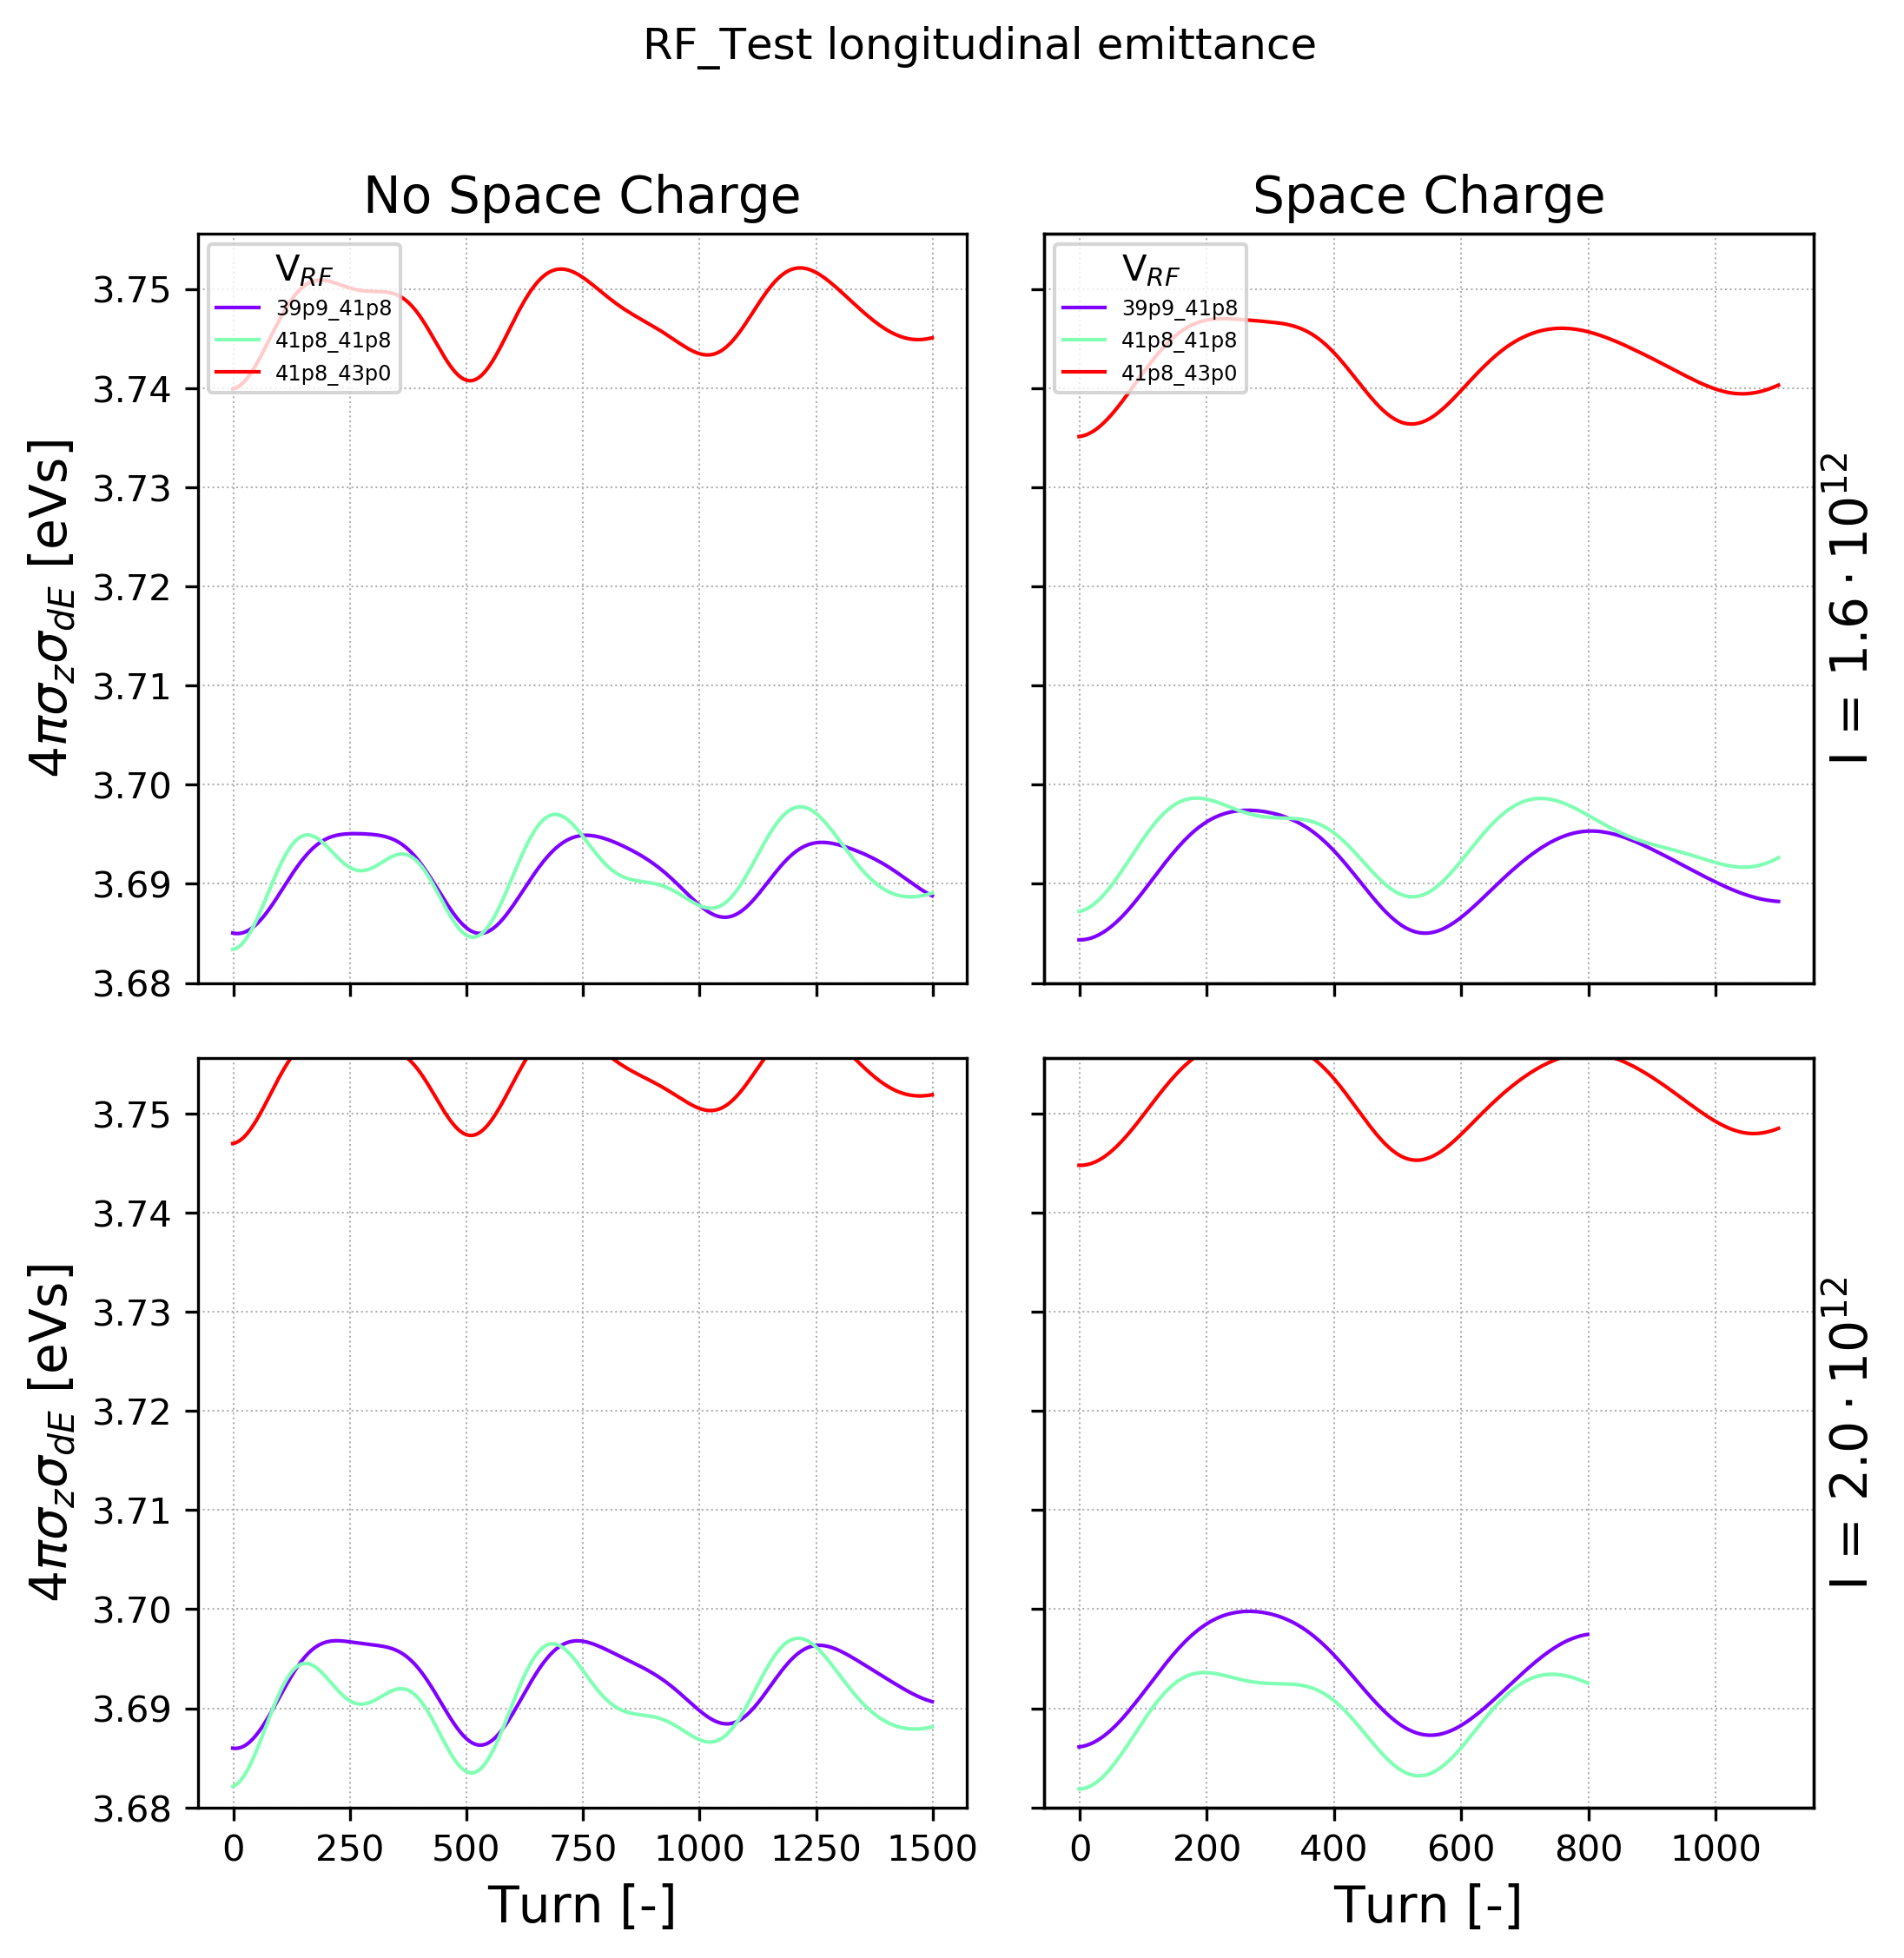

In [23]:
parameter1 = 'sig_z'
multi1 = 1
parameter2 = 'sig_dE'
multi2 = 10

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' longitudinal emittance'
fig.suptitle(tit)

ax1.set_ylabel(r'$4 \pi \sigma_{z} \sigma_{dE}$ [eVs]');
ax3.set_ylabel(r'$4 \pi \sigma_{z} \sigma_{dE}$ [eVs]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], (4* np.pi * dd1[key][parameter1][0]*multi1 * dd1[key][parameter2][0]*multi2)/2, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label);
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], (4* np.pi * dd2[key][parameter1][0]*multi1 * dd2[key][parameter2][0]*multi2)/2, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label);
ax2.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], (4* np.pi * dd3[key][parameter1][0]*multi1 * dd3[key][parameter2][0]*multi2)/2, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], (4* np.pi * dd4[key][parameter1][0]*multi1 * dd4[key][parameter2][0]*multi2)/2, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_manual_eps_z.png'
plt.savefig(savename, dpi = 800);

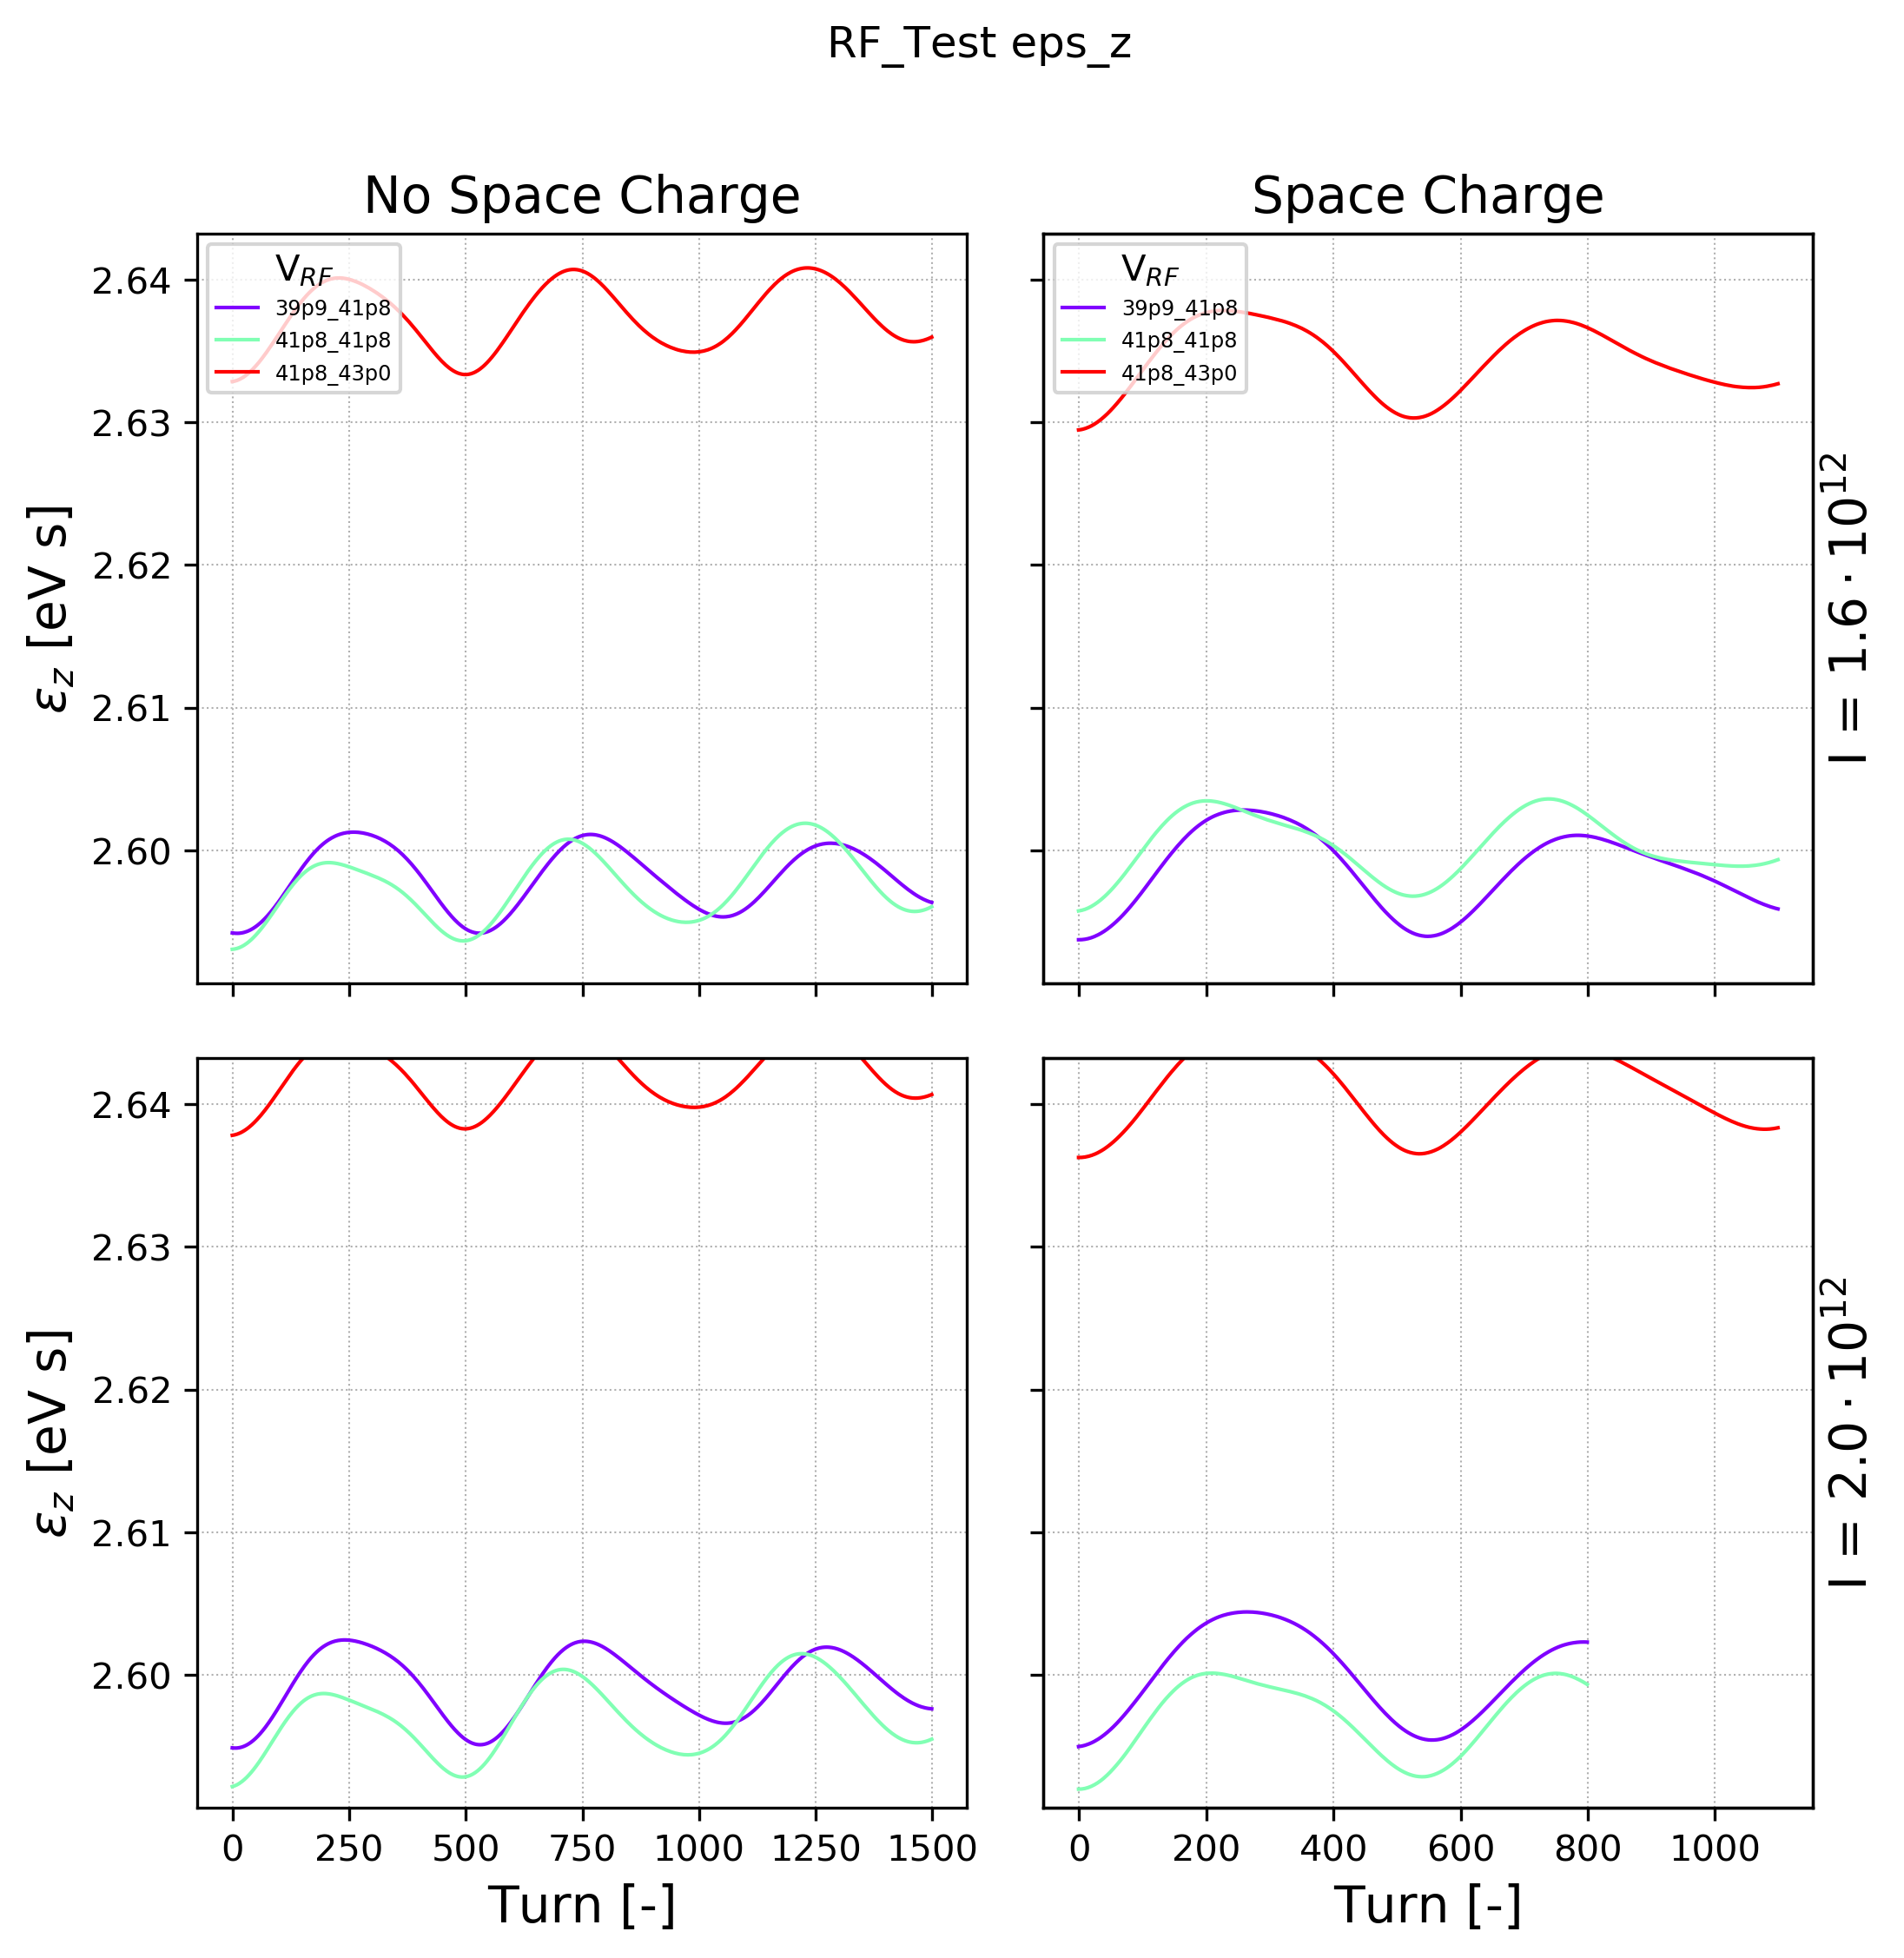

In [24]:
parameter = 'eps_z'
multi1 = 1


fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\epsilon_z$ [eV s]');
ax3.set_ylabel(r'$\epsilon_z$ [eV s]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label);
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label);
ax2.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

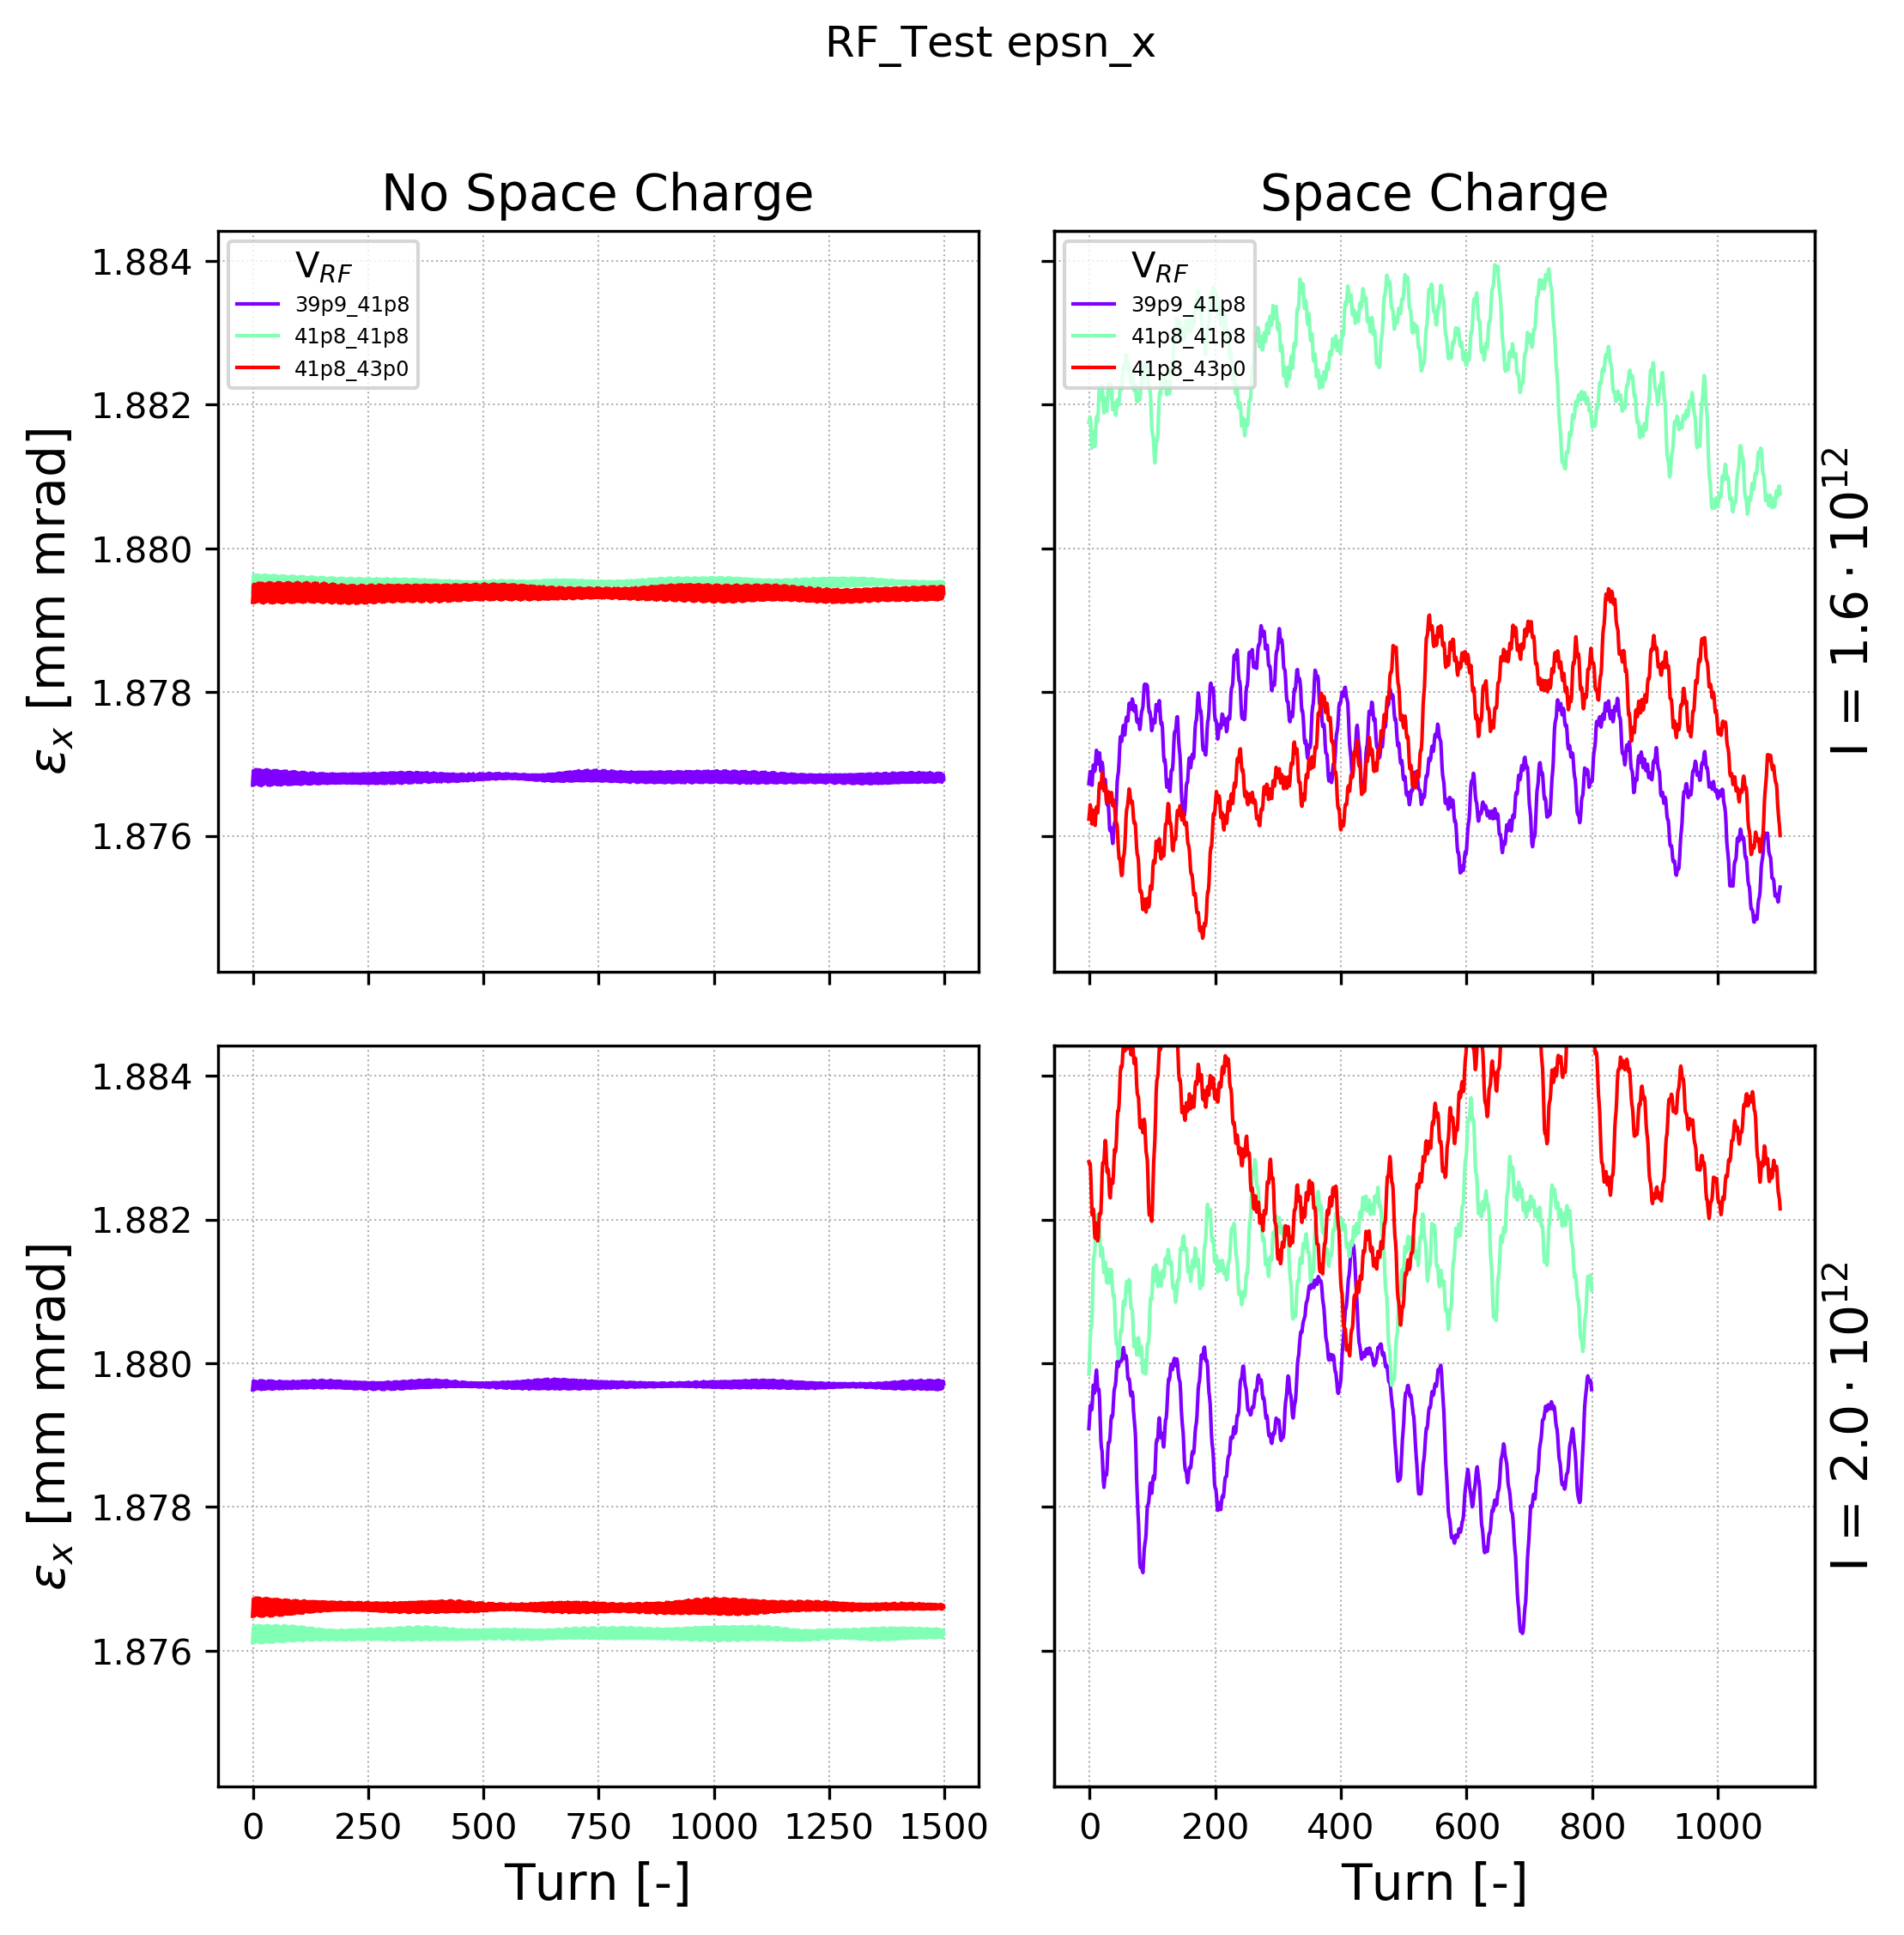

In [25]:
parameter = 'epsn_x'
multi1 = 1E6


fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\epsilon_x$ [mm mrad]');
ax3.set_ylabel(r'$\epsilon_x$ [mm mrad]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label);
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label);
ax2.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

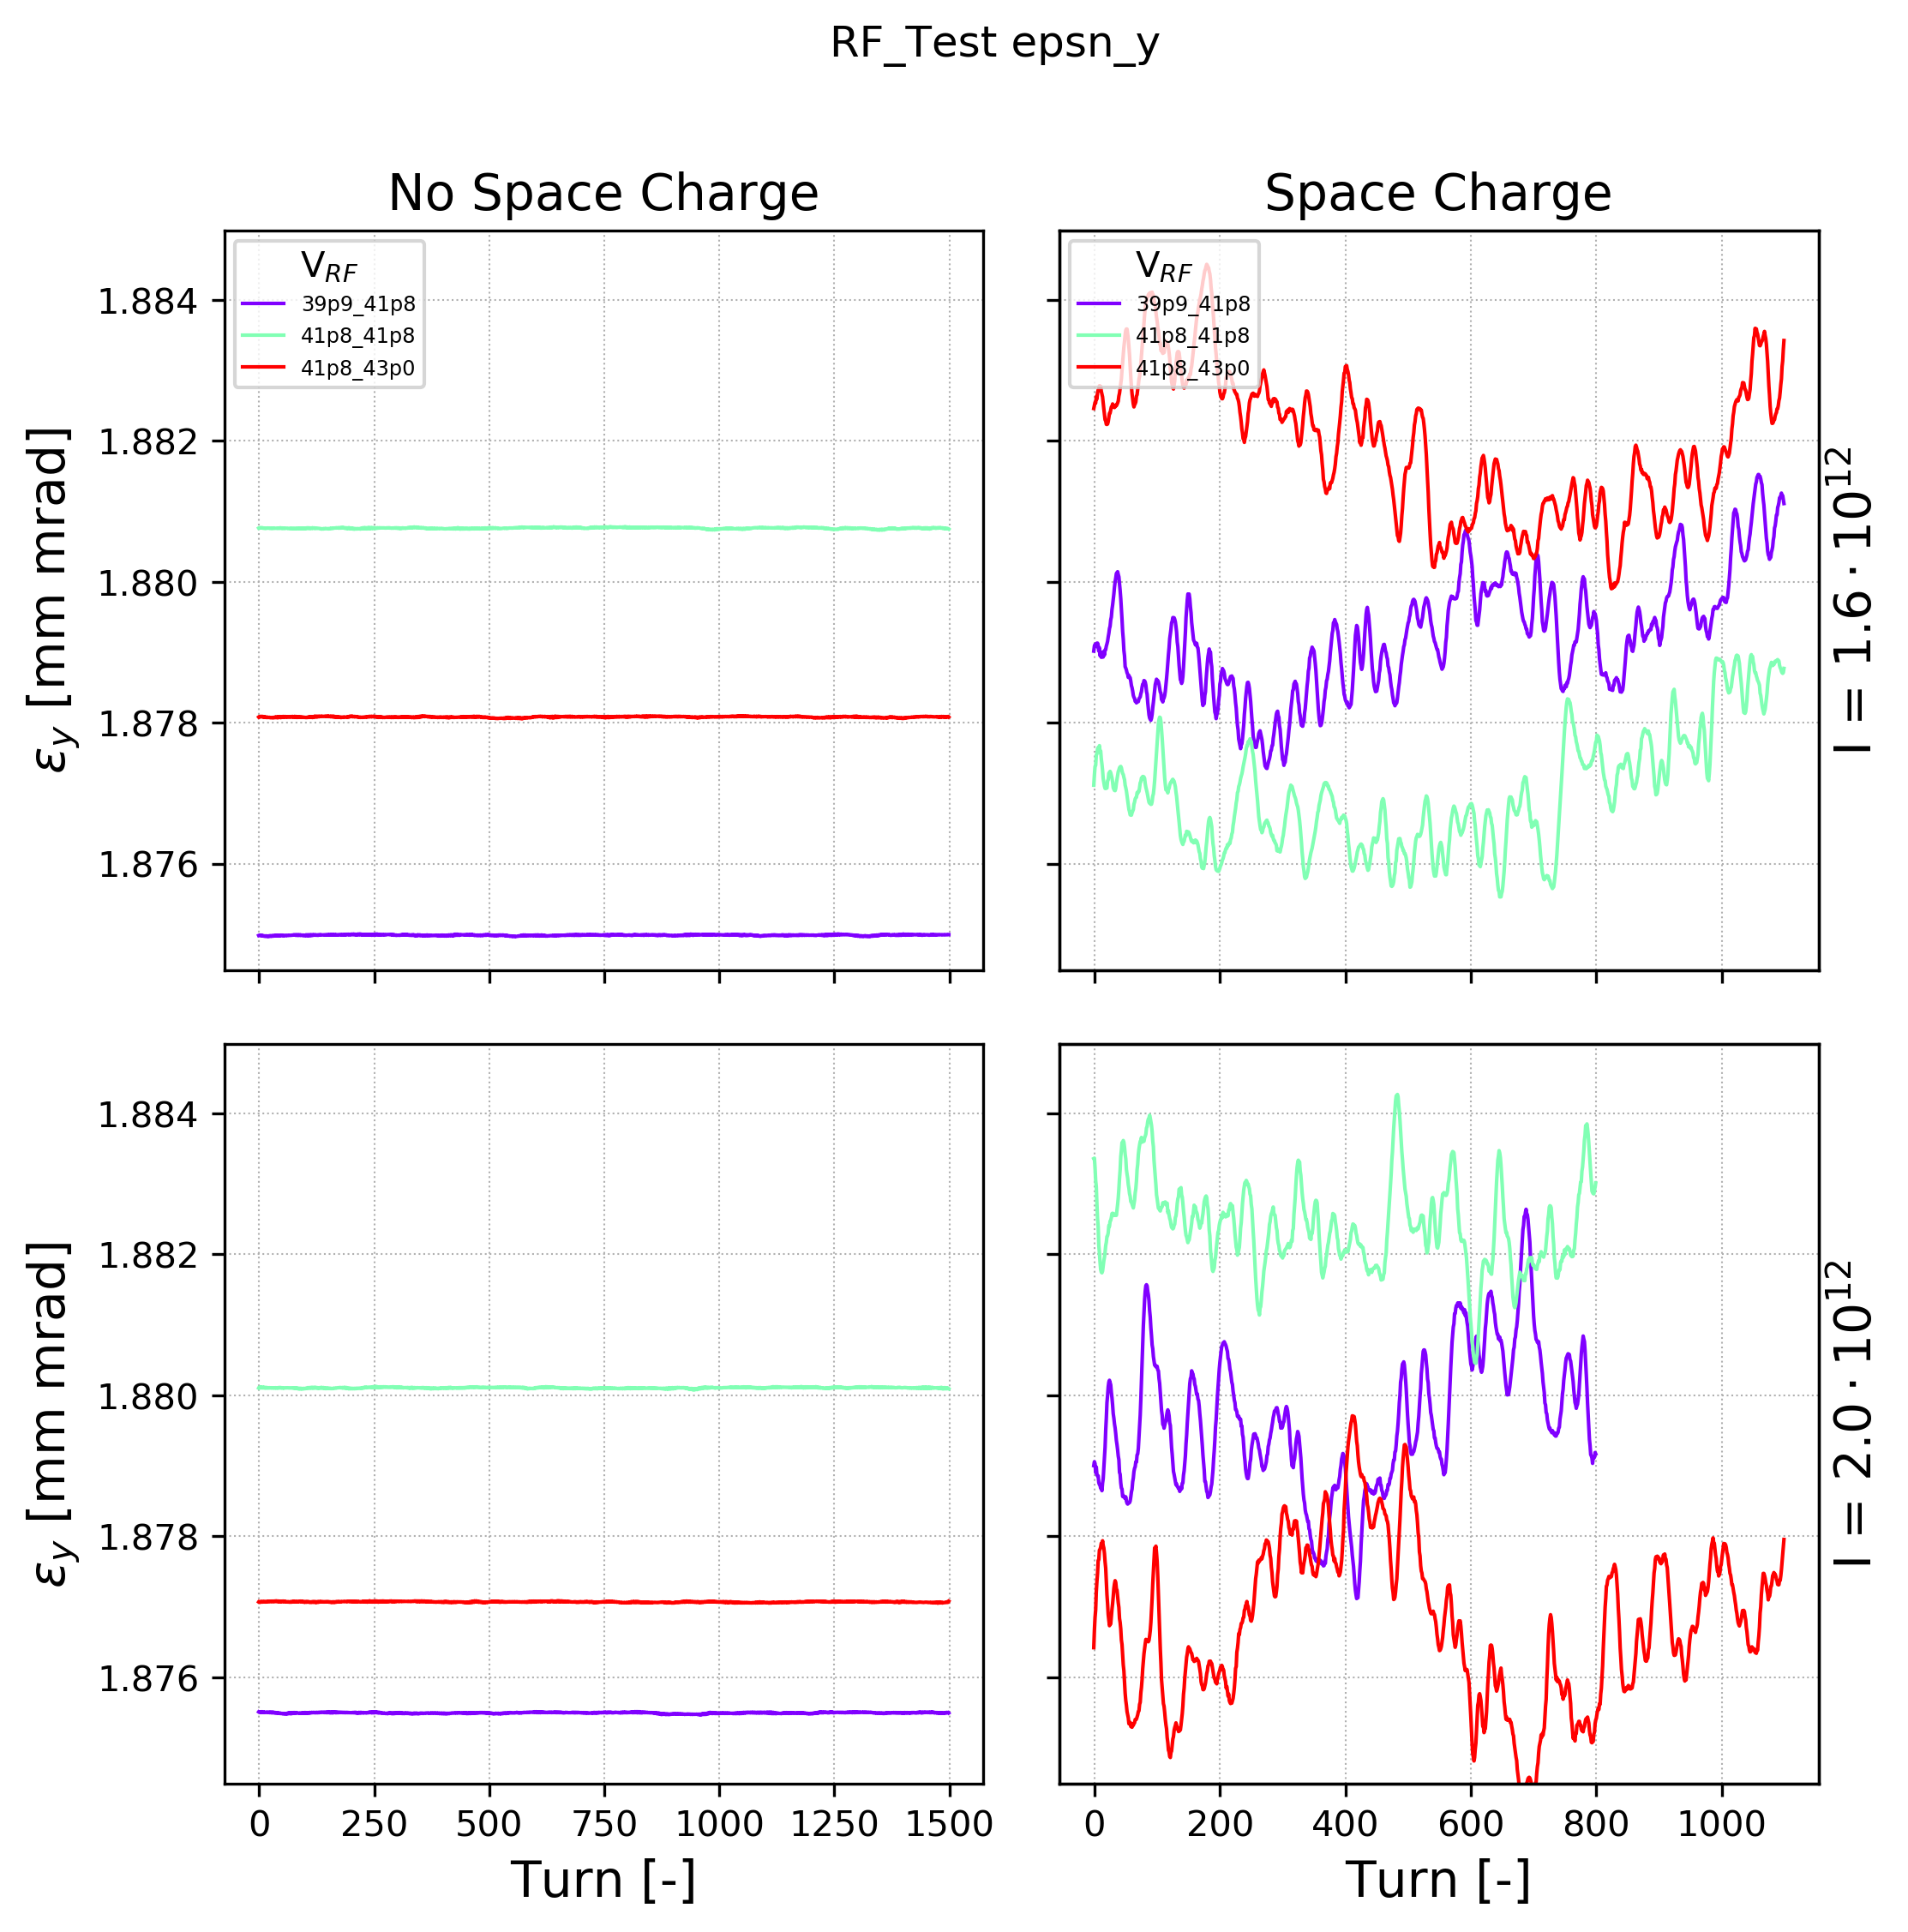

In [26]:
parameter = 'epsn_y'
multi1 = 1E6


fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\epsilon_y$ [mm mrad]');
ax3.set_ylabel(r'$\epsilon_y$ [mm mrad]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label);
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label);
ax2.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

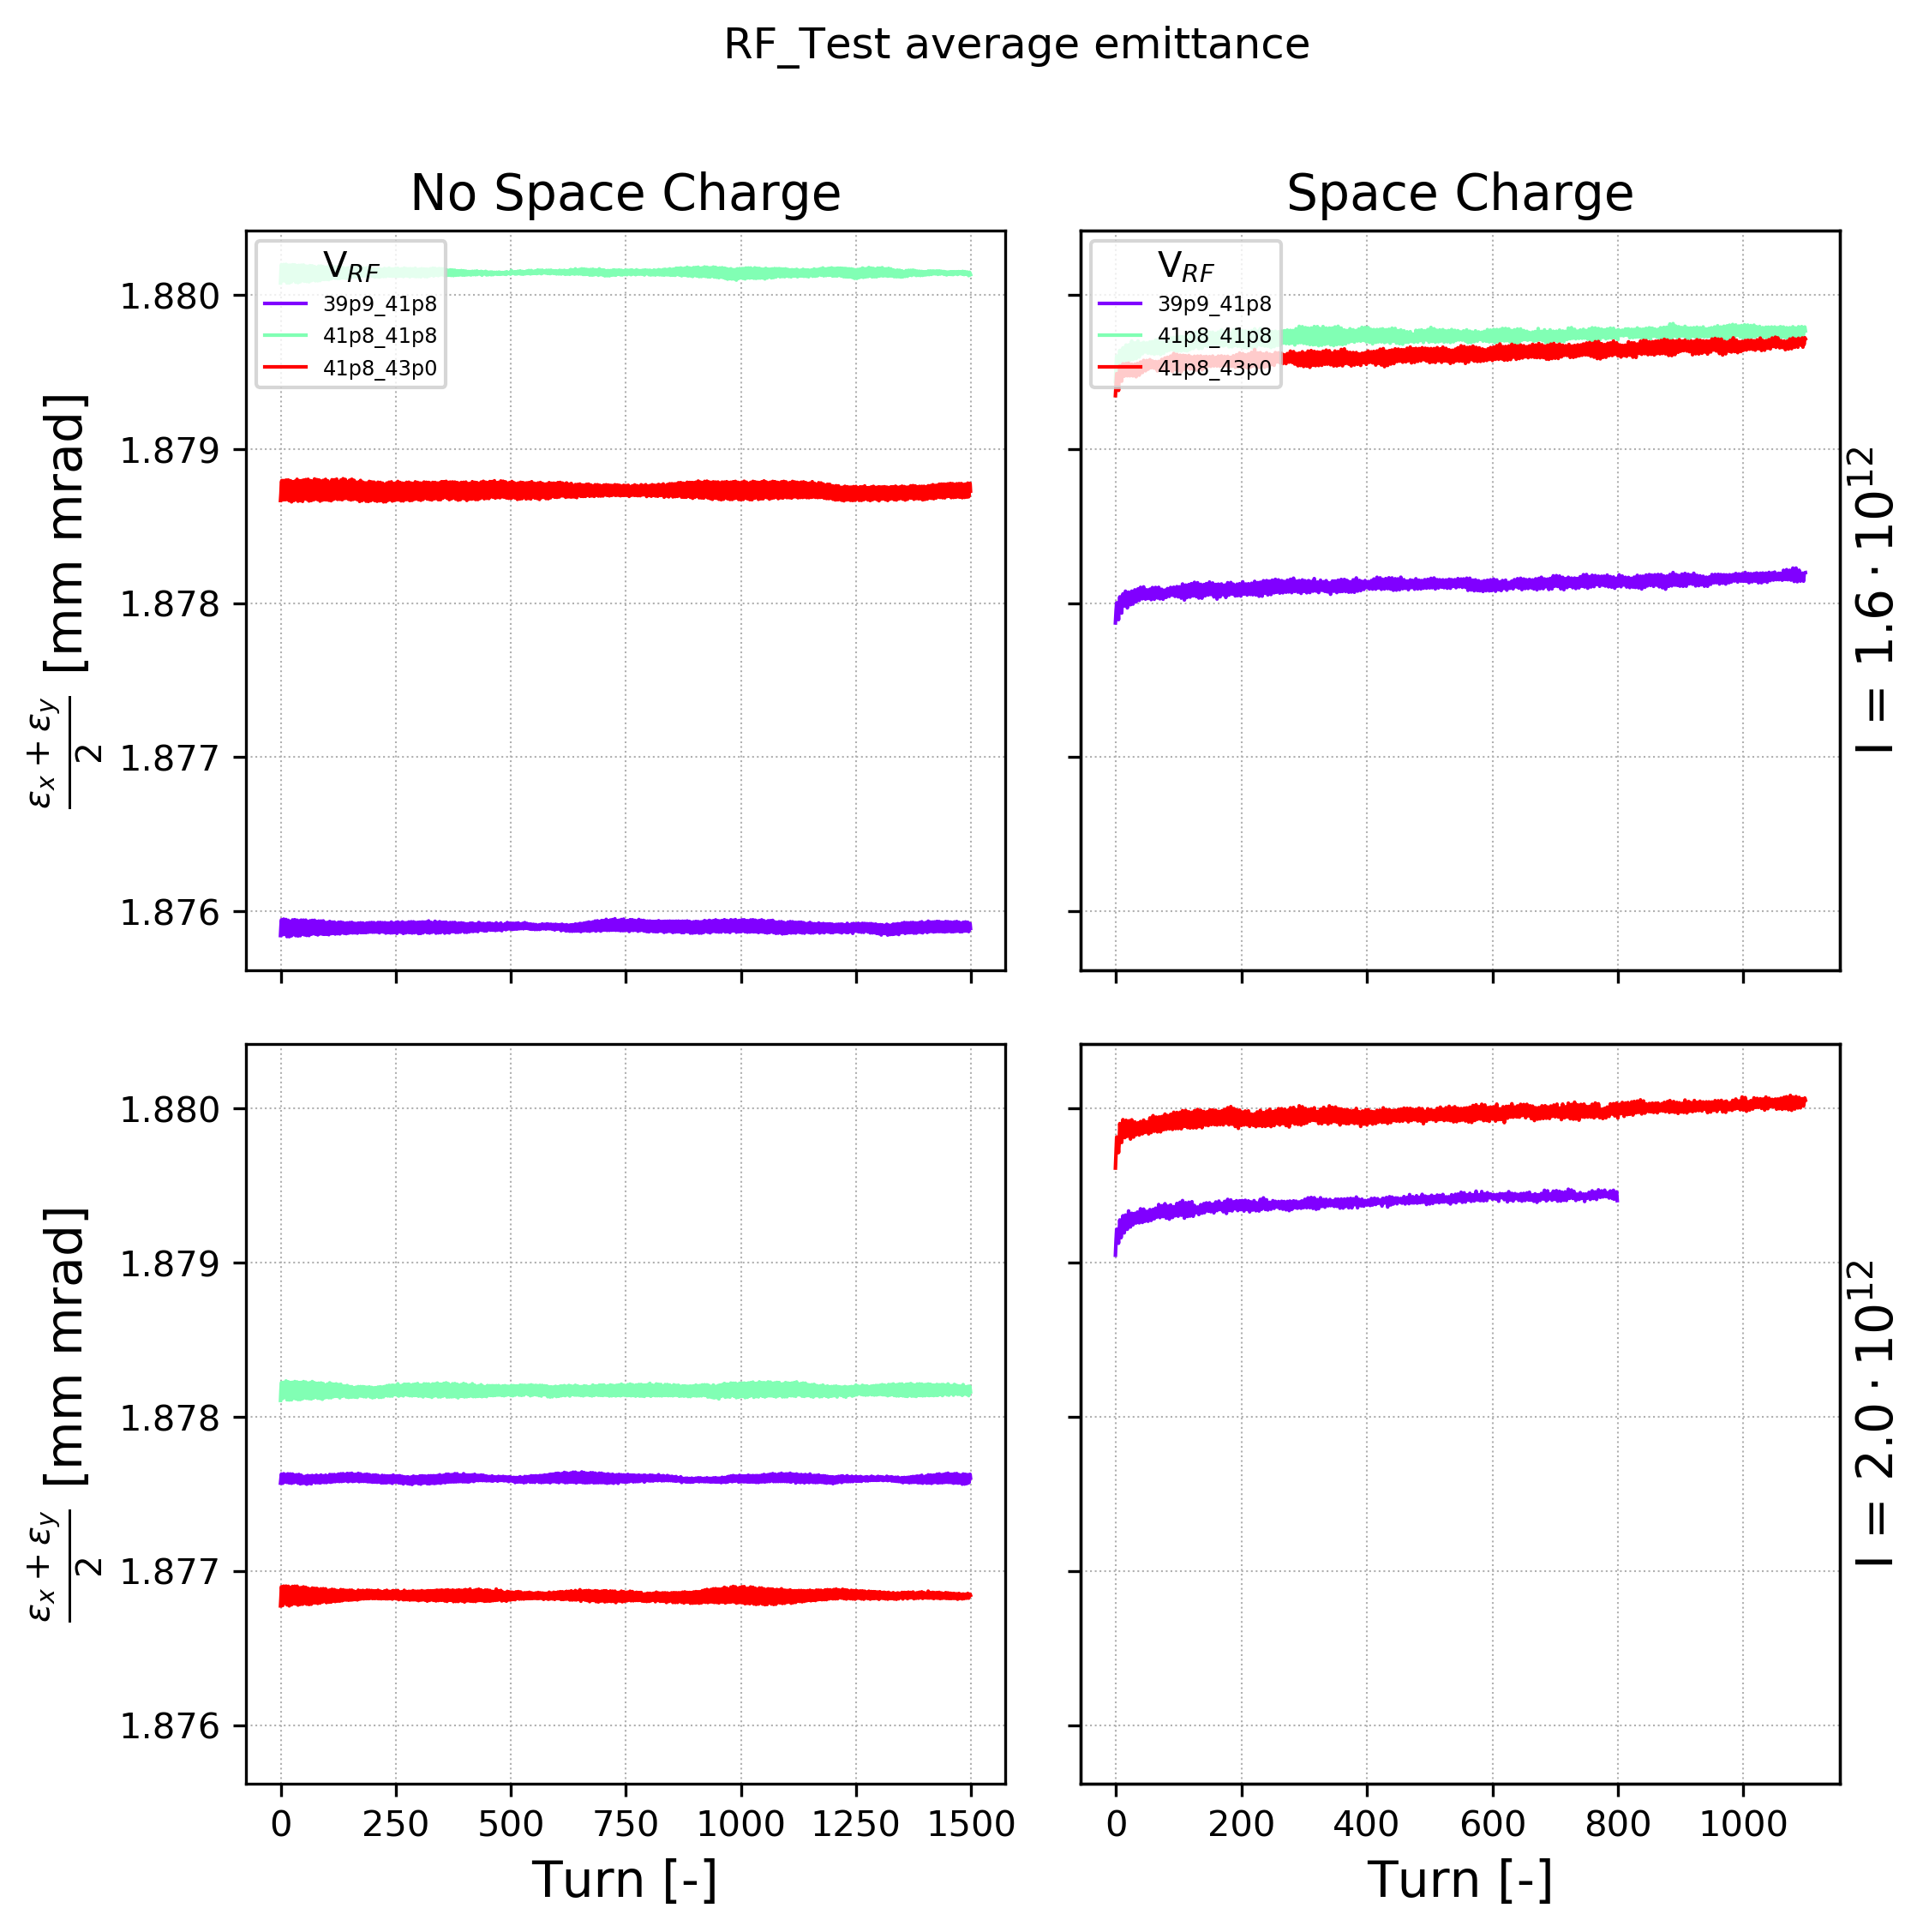

In [27]:
parameter1 = 'epsn_x'
multi1 = 1E6
parameter2 = 'epsn_y'
multi2 = 1E6

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' average emittance'
fig.suptitle(tit)

ax1.set_ylabel(r'$\frac{\epsilon_x + \epsilon_y}{2}$ [mm mrad]');
ax3.set_ylabel(r'$\frac{\epsilon_x + \epsilon_y}{2}$ [mm mrad]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], (dd1[key][parameter1][0]*multi1 + dd1[key][parameter2][0]*multi2)/2, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label);
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], (dd2[key][parameter1][0]*multi1 + dd2[key][parameter2][0]*multi2)/2, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label);
ax2.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], (dd3[key][parameter1][0]*multi1 + dd3[key][parameter2][0]*multi2)/2, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], (dd4[key][parameter1][0]*multi1 + dd4[key][parameter2][0]*multi2)/2, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_average_emittance.png'
plt.savefig(savename, dpi = 800);

## 